<a target="_blank" href="https://colab.research.google.com/github/Dr-Isam-ALJAWARNEH/ds-project-lstm-forecasting/blob/main/Project01_LSTM.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from IPython.display import Image
import folium
from folium import IFrame
from folium.plugins import MarkerCluster
from folium import plugins
from datetime import datetime
import datetime as dt
import json
from scipy import stats
import os

In [ ]:
path="/content/drive/MyDrive/smart_parking/data/"

In [ ]:
NYC_PM = pd.read_csv(path + "NYC_PM.csv")
# NYC_P1 = pd.read_csv("https://raw.githubusercontent.com/IsamAljawarneh/datasets/refs/heads/master/data/NYC_AQ/NYC_PM_Part1.csv")
# NYC_P2 = pd.read_csv("https://raw.githubusercontent.com/IsamAljawarneh/datasets/refs/heads/master/data/NYC_AQ/NYC_PM_Part2.csv")
# NYC_P3 = pd.read_csv("https://raw.githubusercontent.com/IsamAljawarneh/datasets/refs/heads/master/data/NYC_AQ/NYC_PM_Part3.csv")
#BOSTON_PM = pd.read_csv("https://raw.githubusercontent.com/IsamAljawarneh/datasets/refs/heads/master/data/Boston_AQ/Boston_PM_NO2.csv")
#NYC_PM.head()

In [ ]:
BOSTON_PM = pd.read_csv(path + "Boston_PM.csv")

In [ ]:
BOSTON_PM.head()

SensorID        time   latitude  longitude  bin0  bin1  bin10  bin11  \
0  Boston_CS01A  1644587952  42.406059 -71.116470    85     8      0      1   
1  Boston_CS01A  1644587957  42.406059 -71.116470    87     5      0      0   
2  Boston_CS01A  1644587962  42.406059 -71.116478    89    10      0      0   
3  Boston_CS01A  1644587967  42.406059 -71.116486   113    10      0      0   
4  Boston_CS01A  1644587972  42.406063 -71.116501    73     8      0      0   

   bin12  bin13  ...  bin4  bin5  bin6  bin7  bin8  bin9  humidity  \
0      0      0  ...     0     0     0     0     0     0      45.8   
1      0      0  ...     1     0     0     0     0     0      45.7   
2      0      0  ...     1     1     0     0     0     0      45.6   
3      0      0  ...     0     1     0     0     0     0      45.5   
4      0      0  ...     0     1     0     0     0     0      45.5   

   temperature      pm25        no2  
0          8.7  2.215319  14.917748  
1          8.7  2.242558  14.917748  
2          8.7  2.243146  14.917748  
3          8.7  2.242699  14.917748  
4          8.8  1.996889  14.917748  

[5 rows x 32 columns]

In [ ]:
print(min(NYC_PM['pm25']), max(NYC_PM['pm25']))

1.568473024 12.74441924


In [ ]:
print(min(BOSTON_PM['pm25']), max(BOSTON_PM['pm25']))

0.464346333 8.02884143


In [ ]:
NYC_PM.shape

(169999, 31)

In [ ]:
BOSTON_PM.shape

(122768, 32)

In [ ]:
NYC_PM.dtypes

SensorID        object
time             int64
latitude       float64
longitude      float64
bin0             int64
bin1             int64
bin2             int64
bin3             int64
bin4             int64
bin5             int64
bin6             int64
bin7             int64
bin8             int64
bin9             int64
bin10            int64
bin11            int64
bin12            int64
bin13            int64
bin14            int64
bin15            int64
bin16            int64
bin17            int64
bin18            int64
bin19            int64
bin20            int64
bin21            int64
bin22            int64
bin23            int64
temperature    float64
humidity       float64
pm25           float64
dtype: object

In [ ]:
BOSTON_PM.dtypes

SensorID        object
time             int64
latitude       float64
longitude      float64
bin0             int64
bin1             int64
bin10            int64
bin11            int64
bin12            int64
bin13            int64
bin14            int64
bin15            int64
bin16            int64
bin17            int64
bin18            int64
bin19            int64
bin2             int64
bin20            int64
bin21            int64
bin22            int64
bin23            int64
bin3             int64
bin4             int64
bin5             int64
bin6             int64
bin7             int64
bin8             int64
bin9             int64
humidity       float64
temperature    float64
pm25           float64
no2            float64
dtype: object

In [ ]:
NYC_PM.describe()

time       latitude      longitude           bin0  \
count  1.699990e+05  169999.000000  169999.000000  169999.000000   
mean   1.634506e+09      40.826202     -73.892555      78.485926   
std    2.197971e+06       0.017215       0.019362     148.612154   
min    1.631277e+09      40.711689     -73.934052       0.000000   
25%    1.632808e+09      40.813564     -73.911232      16.000000   
50%    1.633554e+09      40.818981     -73.892303      39.000000   
75%    1.636266e+09      40.845383     -73.870804      92.000000   
max    1.639579e+09      40.904430     -73.820808    6233.000000   

                bin1           bin2           bin3           bin4  \
count  169999.000000  169999.000000  169999.000000  169999.000000   
mean        8.056747       1.885382       0.551209       0.806628   
std        22.639578       4.616222       1.461197       1.969984   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         3.000000       1.000000       0.000000       0.000000   
75%         9.000000       2.000000       1.000000       1.000000   
max      2493.000000     305.000000     106.000000     101.000000   

                bin5           bin6  ...          bin17          bin18  \
count  169999.000000  169999.000000  ...  169999.000000  169999.000000   
mean        0.578003       0.367173  ...       0.000247       0.000159   
std         1.535912       1.020670  ...       0.016086       0.012602   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         1.000000       0.000000  ...       0.000000       0.000000   
max        92.000000      59.000000  ...       2.000000       1.000000   

               bin19          bin20          bin21          bin22  \
count  169999.000000  169999.000000  169999.000000  169999.000000   
mean        0.000118       0.000059       0.000065       0.000047   
std         0.010846       0.007669       0.008044       0.006860   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

               bin23    temperature       humidity           pm25  
count  169999.000000  169999.000000  169999.000000  169999.000000  
mean        0.000141      17.432182      56.241018       4.310939  
std         0.012366       6.659859      16.583384       1.794719  
min         0.000000     -37.000000       0.000000       1.568473  
25%         0.000000      12.400000      42.200000       3.162405  
50%         0.000000      18.400000      55.300000       4.251249  
75%         0.000000      22.600000      69.000000       4.786389  
max         2.000000      32.400000     100.000000      12.744419  

[8 rows x 30 columns]

In [ ]:
NYC_PM.isnull().sum()

SensorID       0
time           0
latitude       0
longitude      0
bin0           0
bin1           0
bin2           0
bin3           0
bin4           0
bin5           0
bin6           0
bin7           0
bin8           0
bin9           0
bin10          0
bin11          0
bin12          0
bin13          0
bin14          0
bin15          0
bin16          0
bin17          0
bin18          0
bin19          0
bin20          0
bin21          0
bin22          0
bin23          0
temperature    0
humidity       0
pm25           0
dtype: int64

In [ ]:
BOSTON_PM.isnull().sum()

SensorID       0
time           0
latitude       0
longitude      0
bin0           0
bin1           0
bin10          0
bin11          0
bin12          0
bin13          0
bin14          0
bin15          0
bin16          0
bin17          0
bin18          0
bin19          0
bin2           0
bin20          0
bin21          0
bin22          0
bin23          0
bin3           0
bin4           0
bin5           0
bin6           0
bin7           0
bin8           0
bin9           0
humidity       0
temperature    0
pm25           0
no2            0
dtype: int64

In [ ]:
import pandas as pd
from pandas import read_csv
from datetime import datetime

NYC_PM['time'] = pd.to_datetime(NYC_PM['time'], unit='s')

In [ ]:
BOSTON_PM['time'] = pd.to_datetime(BOSTON_PM['time'], unit='s')

In [ ]:
print(min(NYC_PM['time']) , " -- " , max(NYC_PM['time']))

2021-09-10 12:29:09  --  2021-12-15 14:35:55


In [ ]:
print(min(BOSTON_PM['time']), " -- ", max(BOSTON_PM['time']))

2022-02-11 13:59:12  --  2022-04-05 19:53:21


In [ ]:
time = BOSTON_PM['time'].sort_values()

In [ ]:
time.head(10)

0   2022-02-11 13:59:12
1   2022-02-11 13:59:17
2   2022-02-11 13:59:22
3   2022-02-11 13:59:27
4   2022-02-11 13:59:32
5   2022-02-11 13:59:37
6   2022-02-11 13:59:42
7   2022-02-11 13:59:47
8   2022-02-11 13:59:52
9   2022-02-11 13:59:57
Name: time, dtype: datetime64[ns]

In [ ]:
print(NYC_PM.columns)

Index(['SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm25'],
      dtype='object')


In [ ]:
BOSTON_PM = BOSTON_PM.rename(columns={'pm25': 'pollution'})

In [ ]:
NYC_PM = NYC_PM.rename(columns={'pm25': 'pollution'})

In [ ]:
columns = ['time', 'latitude', 'longitude', 'temperature', 'humidity', 'pollution']
NYC_PM = NYC_PM[columns]

In [ ]:
BOSTON_PM = BOSTON_PM[columns]

In [ ]:
BOSTON_PM.head()

time   latitude  longitude  temperature  humidity  pollution
0 2022-02-11 13:59:12  42.406059 -71.116470          8.7      45.8   2.215319
1 2022-02-11 13:59:17  42.406059 -71.116470          8.7      45.7   2.242558
2 2022-02-11 13:59:22  42.406059 -71.116478          8.7      45.6   2.243146
3 2022-02-11 13:59:27  42.406059 -71.116486          8.7      45.5   2.242699
4 2022-02-11 13:59:32  42.406063 -71.116501          8.8      45.5   1.996889

In [ ]:
NYC_PM.head()

time   latitude  longitude  temperature  humidity  pollution
0 2021-09-10 12:35:04  40.847672 -73.869316         23.7      57.3   4.508813
1 2021-09-10 12:35:08  40.847668 -73.869316         23.7      57.8   5.462420
2 2021-09-10 12:35:13  40.847649 -73.869362         23.7      57.8   5.154881
3 2021-09-10 12:35:18  40.847649 -73.869362         23.6      57.6   4.508813
4 2021-09-10 12:35:23  40.847649 -73.869362         23.6      57.5   5.539503

In [ ]:
NYC_PM['city'] = 'NYC'

In [ ]:
BOSTON_PM['city'] = 'Boston'

In [ ]:
PM_data = NYC_PM

# Geohashing and geospatial join

In [ ]:
!pip install geohash2
!pip install h3
!pip install geopy
!pip install folium
!pip install shapely
!pip install selenium

In [ ]:
PM_data.dtypes

time           datetime64[ns]
latitude              float64
longitude             float64
temperature           float64
humidity              float64
pollution             float64
city                   object
dtype: object

In [ ]:
PM_data.tail(10)

time   latitude  longitude  temperature  humidity  \
169989 2021-09-12 14:31:24  40.823368 -73.890488         24.7      54.6   
169990 2021-09-12 14:31:29  40.823364 -73.890488         24.6      54.7   
169991 2021-09-12 14:31:34  40.823360 -73.890488         24.6      54.7   
169992 2021-09-12 14:31:39  40.823357 -73.890488         24.6      54.7   
169993 2021-09-12 14:31:44  40.823353 -73.890488         24.6      54.7   
169994 2021-09-12 14:31:49  40.823353 -73.890488         24.6      54.8   
169995 2021-09-12 14:31:54  40.823349 -73.890480         24.6      54.8   
169996 2021-09-12 14:31:59  40.823349 -73.890480         24.6      54.8   
169997 2021-09-12 14:32:04  40.823345 -73.890488         24.6      54.6   
169998 2021-09-12 14:32:09  40.823338 -73.890488         24.6      54.6   

        pollution  
169989   9.684003  
169990   6.470661  
169991   6.470661  
169992   7.860174  
169993   3.117859  
169994   5.460360  
169995   5.298209  
169996   6.470661  
169997   6.424142  
169998   6.526187

In [ ]:
PM_data['time'] = PM_data['time'].apply(lambda x: x.timestamp())

In [ ]:
PM_data.head()

time   latitude  longitude  temperature  humidity  pollution
0  1.631277e+09  40.847672 -73.869316         23.7      57.3   4.508813
1  1.631277e+09  40.847668 -73.869316         23.7      57.8   5.462420
2  1.631277e+09  40.847649 -73.869362         23.7      57.8   5.154881
3  1.631277e+09  40.847649 -73.869362         23.6      57.6   4.508813
4  1.631277e+09  40.847649 -73.869362         23.6      57.5   5.539503

In [ ]:
len(PM_data)

169999

In [ ]:
temp_data.dtypes

time           float64
latitude       float64
longitude      float64
temperature    float64
humidity       float64
pollution      float64
geohash         object
dtype: object

In [ ]:
!pip install lime

In [ ]:
PM_data.head()

time   latitude  longitude  temperature  humidity  pollution
0  1.631277e+09  40.847672 -73.869316         23.7      57.3   4.508813
1  1.631277e+09  40.847668 -73.869316         23.7      57.8   5.462420
2  1.631277e+09  40.847649 -73.869362         23.7      57.8   5.154881
3  1.631277e+09  40.847649 -73.869362         23.6      57.6   4.508813
4  1.631277e+09  40.847649 -73.869362         23.6      57.5   5.539503

In [ ]:
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
import numpy as np
import geohash2
from geohash2 import encode
import h3
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import Dropout
from keras.layers import AvgPool1D
from keras.layers import GRU
from keras import regularizers
# import shap
# from lime import lime_tabular
from matplotlib import pyplot as plt

spearman_results = []
pearson_results = []
dataset_length = []
geohash = []
maes = []
mses = []
rmses = []
accuracys = []
r2_scores = []
time_intervals = []

precision = 12

for x in range(7, precision+1, 1):
  temp_data = PM_data.copy()

  temp_data['latitude'] = temp_data['latitude'].astype(float)
  temp_data['longitude'] = temp_data['longitude'].astype(float)

  temp_data['geohash'] = temp_data.apply(calculate_geohash, axis=1 , args=['geohash',x,])

  temp_data['latitude'], temp_data['longitude'] = setCenterGeohash(temp_data, 'geohash')

  temp_data['latitude'] = temp_data['latitude'].astype(float)
  temp_data['longitude'] = temp_data['longitude'].astype(float)

  temp_data = spatial_aggregation(temp_data, 'geohash')
  temp_data['geohash'] = temp_data.index
  temp_data.reset_index(drop=True, inplace=True)

  temp_data['time'] = pd.to_datetime(temp_data['time'])
  temp_data = temp_data.sort_values('time')
  intervals = temp_data['time'].diff().dt.total_seconds().dropna()
  intervals = set(intervals)
  sum = 0
  size = len(intervals)
  for interval in intervals:
    sum += interval
  avg = sum/size
  time_intervals.append(avg)
  geohash.append(x)

  encoder = LabelEncoder()
  temp_data['geohash'] = encoder.fit_transform(temp_data['geohash'])

  poll = temp_data['pollution']
  temp_data = temp_data.drop('pollution', axis=1)
  temp_data['pollution'] = poll

  temp_data.index = temp_data['time']
  temp_data.sort_index()

  scaler = MinMaxScaler(feature_range=(0, 1))
  temp_data = scaler.fit_transform(temp_data)

  temp_data = series_to_supervised(temp_data)

  train_X = temp_data[['var1(t-1)',	'var2(t-1)','var3(t-1)','var4(t-1)','var5(t-1)','var6(t-1)']]
  train_y = temp_data[['var7(t-1)']]
  test_X = temp_data[['var1(t)',	'var2(t)','var3(t)','var4(t)','var5(t)','var6(t)']]
  test_y = temp_data[['var7(t)']]

  train_X_values = train_X.values
  test_X_values = test_X.values
  train_y_values = train_y.values
  test_y_values = test_y.values

  train_X_values = train_X_values.reshape((train_X_values.shape[0], 1, train_X_values.shape[1]))
  test_X_values = test_X_values.reshape((test_X_values.shape[0], 1, test_X_values.shape[1]))

  # design network
  model = Sequential()
  model.add(LSTM(1, input_shape=(train_X_values.shape[0], train_X_values.shape[2])))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mae', optimizer='adam')
  # fit network
  history = model.fit(train_X_values , train_y_values, epochs=50, validation_data=(test_X_values, test_y_values), batch_size=72, verbose=2, shuffle=True)
  # plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.show()

  # Make predictions
  predicted_y = model.predict(test_X_values)

  # Flatten predictions and ground truth to 1D arrays
  predicted_y = predicted_y.flatten()
  test_y_values = test_y_values.flatten()

  # Calculate metrics
  mae = mean_absolute_error(test_y_values, predicted_y)
  mse = mean_squared_error(test_y_values, predicted_y)
  rmse = np.sqrt(mse)
  r2 = r2_score(test_y_values, predicted_y)

  # Assuming a threshold for accuracy (binary classification style)
  accuracy = accuracy_score((test_y_values > 0.5).astype(int), (predicted_y > 0.5).astype(int))

  # Store metrics in arrays
  geohash.append(x)
  maes.append(mae)
  mses.append(mse)
  rmses.append(rmse)
  accuracys.append(accuracy)
  dataset_length.append(len(temp_data))
  r2_scores.append(r2)

  def predict_fn(data):
      data_reshaped = data.reshape((data.shape[0], 1, data.shape[1]))
      return model.predict(data_reshaped)


  # LIME Explainer
  lime_explainer = lime_tabular.LimeTabularExplainer(
      training_data=train_X.values,
      mode='regression',
      feature_names=['time', 'lat', 'long', 'temp', 'hum', 'geohash']
  )

  # Explain an instance
  instance_index = 0
  instance = test_X.values[instance_index].reshape(1, -1)

  lime_explanation = lime_explainer.explain_instance(
      instance.flatten(),
      predict_fn,
      num_features=test_X.shape[1]
  )

  # Save LIME explanation plot
  lime_plot = lime_explanation.as_pyplot_figure()
  lime_plot.savefig(f"lime_explanation_instance_{instance_index}_precision_{x}.png", bbox_inches='tight', dpi=300)
  plt.close()

In [ ]:
csv = pd.DataFrame({'geohash': geohash, '# observations' : dataset_length, 'R^2': r2_scores, 'rmse': rmses, 'maes': maes, 'mses': mses, 'accuracy': accuracys})
csv.to_csv('results.csv')

In [ ]:
test_X_values.shape

(2810, 6)

In [ ]:
geohash

[7, 8, 9, 10, 11, 12]

In [ ]:
time_intervals

[9.275596082583363e-06,
 4.897642779587408e-06,
 4.338749306518724e-06,
 4.8181740350877186e-06,
 4.950925625660918e-06,
 4.950925625660918e-06]

In [ ]:
import seaborn as sns

# df = pd.DataFrame({'Pearson': pearson_results, 'Spearman': spearman_results, 'Geohash': geohash})
# dfl = pd.melt(df, ['Geohash'])

df = pd.DataFrame({'Time Interval' : time_intervals, 'Geohash': geohash})
dfl = pd.melt(df, ['Geohash'])

<Axes: xlabel='Geohash', ylabel='value'>

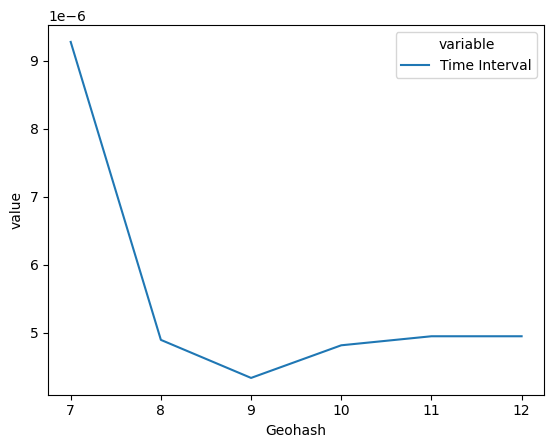

In [ ]:
sns.lineplot(data=dfl, x='Geohash', y='value', hue='variable')

In [ ]:
import pandas as pd
import numpy as np
import geohash2
from geohash2 import encode
import h3


def calculate_geohash(row, geohash_algorithm, precision):
  if geohash_algorithm == 'H3':
    h3_precision = precision + 5
    return h3.latlng_to_cell(row['latitude'], row['longitude'], h3_precision)
  else:
    return encode(row['latitude'], row['longitude'], precision)

# Conference paper independent tests

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from pandas import concat
from keras.models import Sequential

In [ ]:
from pandas import DataFrame
from pandas import read_csv
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]

        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]


    agg = concat(cols, axis=1)
    agg.columns = names
    if dropnan:
          agg.dropna(inplace=True)
    return agg

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

def geospatial_join(dataset, map):
    # Convert dataset to GeoDataFrame
    dataset['geometry'] = dataset.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
    pollution_geo = gpd.GeoDataFrame(dataset, geometry='geometry', crs=map.crs)  # Ensure CRS matches

    # Perform spatial join (switching order so dataset keeps all its columns)
    merged_data = gpd.sjoin(pollution_geo, map, how='inner', predicate='within')

    return merged_data

In [ ]:
import geopandas as gpd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

nyc_map = gpd.read_file(path + "nyc_polygon.geojson")
nyc_map = nyc_map.drop(['borough', '@id'], axis=1)

encoder = LabelEncoder()
nyc_map['neighborhoodCode'] = encoder.fit_transform(nyc_map['neighborhood'])

In [ ]:
temp_data

latitude  longitude  temperature   humidity  pollution
time                                                                        
2021-09-10 12:42:00  40.847713 -73.869324    22.500000  59.800000   5.050434
2021-09-10 12:42:05  40.847713 -73.869316    22.500000  59.800000   5.575798
2021-09-10 12:42:10  40.847717 -73.869331    22.500000  59.700000   5.842772
2021-09-10 12:42:15  40.847721 -73.869347    22.500000  59.900000   5.564330
2021-09-10 12:42:20  40.847683 -73.869392    22.500000  60.300000   5.930638
...                        ...        ...          ...        ...        ...
2021-12-15 14:35:35  40.804802 -73.912076    24.248083  22.377876   3.320708
2021-12-15 14:35:40  40.804791 -73.912087    24.261062  22.358407   3.321490
2021-12-15 14:35:45  40.804781 -73.912097    24.274041  22.338938   3.322273
2021-12-15 14:35:50  40.804770 -73.912107    24.287021  22.319469   3.323055
2021-12-15 14:35:55  40.804760 -73.912117    24.300000  22.300000   3.323838

[1660248 rows x 5 columns]

In [ ]:
temp_data.head()

latitude  longitude  temperature  humidity  pollution                time  \
0  40.847713 -73.869324         22.5      59.8   5.050434 2021-09-10 12:42:00   
1  40.847713 -73.869316         22.5      59.8   5.575798 2021-09-10 12:42:05   
2  40.847717 -73.869331         22.5      59.7   5.842772 2021-09-10 12:42:10   
3  40.847721 -73.869347         22.5      59.9   5.564330 2021-09-10 12:42:15   
4  40.847683 -73.869392         22.5      60.3   5.930638 2021-09-10 12:42:20   

  geohash                    geometry  index_right neighborhood boroughCode  \
0  dr72rh  POINT (-73.86932 40.84771)           38   Bronx Park           2   
1  dr72rh  POINT (-73.86932 40.84771)           38   Bronx Park           2   
2  dr72rh  POINT (-73.86933 40.84772)           38   Bronx Park           2   
3  dr72rh  POINT (-73.86935 40.84772)           38   Bronx Park           2   
4  dr72rh  POINT (-73.86939 40.84768)           38   Bronx Park           2   

   neighborhoodCode  
0                28  
1                28  
2                28  
3                28  
4                28

In [ ]:
PM_data.head()

time   latitude  longitude  temperature  humidity  pollution
0  1.631277e+09  40.847672 -73.869316         23.7      57.3   4.508813
1  1.631277e+09  40.847668 -73.869316         23.7      57.8   5.462420
2  1.631277e+09  40.847649 -73.869362         23.7      57.8   5.154881
3  1.631277e+09  40.847649 -73.869362         23.6      57.6   4.508813
4  1.631277e+09  40.847649 -73.869362         23.6      57.5   5.539503

In [ ]:
PM_data['time'] = PM_data['time'].apply(lambda x: x.timestamp())

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
PM_data = scaler.fit_transform(PM_data)
PM_data = series_to_supervised(PM_data)

In [ ]:
PM_data.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1   0.000043   0.705522   0.571651   0.874640      0.573   0.263095  0.000043   
2   0.000043   0.705501   0.571651   0.874640      0.578   0.348422  0.000044   
3   0.000044   0.705403   0.571244   0.874640      0.578   0.320904  0.000044   
4   0.000044   0.705403   0.571244   0.873199      0.576   0.263095  0.000045   
5   0.000045   0.705403   0.571244   0.873199      0.575   0.355319  0.000046   

    var2(t)   var3(t)   var4(t)  var5(t)   var6(t)  
1  0.705501  0.571651  0.874640    0.578  0.348422  
2  0.705403  0.571244  0.874640    0.578  0.320904  
3  0.705403  0.571244  0.873199    0.576  0.263095  
4  0.705403  0.571244  0.873199    0.575  0.355319  
5  0.705403  0.571244  0.873199    0.575  0.321828

In [ ]:
X = PM_data[['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)']]
y = PM_data[['var6(t)']]

train_X, test_X, train_y, test_y  = train_test_split(X, y, test_size=0.3, shuffle=False)

In [ ]:
train_X_values = train_X.values
test_X_values = test_X.values
train_y_values = train_y.values
test_y_values = test_y.values

train_X_values = train_X_values.reshape((train_X_values.shape[0], 1, train_X_values.shape[1]))
test_X_values = test_X_values.reshape((test_X_values.shape[0], 1, test_X_values.shape[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1653/1653 - 17s - 10ms/step - loss: 0.1033 - val_loss: 0.1132
Epoch 2/50
1653/1653 - 12s - 7ms/step - loss: 0.0846 - val_loss: 0.1022
Epoch 3/50
1653/1653 - 9s - 5ms/step - loss: 0.0738 - val_loss: 0.0873
Epoch 4/50
1653/1653 - 7s - 4ms/step - loss: 0.0629 - val_loss: 0.0735
Epoch 5/50
1653/1653 - 8s - 5ms/step - loss: 0.0532 - val_loss: 0.0594
Epoch 6/50
1653/1653 - 10s - 6ms/step - loss: 0.0491 - val_loss: 0.0558
Epoch 7/50
1653/1653 - 9s - 5ms/step - loss: 0.0481 - val_loss: 0.0549
Epoch 8/50
1653/1653 - 7s - 4ms/step - loss: 0.0478 - val_loss: 0.0542
Epoch 9/50
1653/1653 - 8s - 5ms/step - loss: 0.0476 - val_loss: 0.0539
Epoch 10/50
1653/1653 - 7s - 4ms/step - loss: 0.0474 - val_loss: 0.0533
Epoch 11/50
1653/1653 - 4s - 2ms/step - loss: 0.0474 - val_loss: 0.0526
Epoch 12/50
1653/1653 - 7s - 4ms/step - loss: 0.0473 - val_loss: 0.0520
Epoch 13/50
1653/1653 - 5s - 3ms/step - loss: 0.0473 - val_loss: 0.0517
Epoch 14/50
1653/1653 - 4s - 3ms/step - loss: 0.0472 - val_loss: 0.05

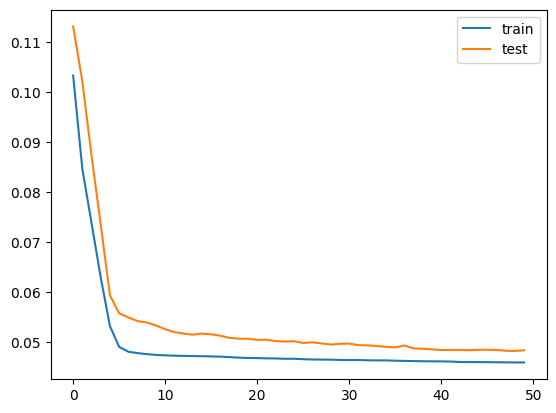

In [ ]:
model = Sequential()
model.add(LSTM(1, input_shape=(train_X_values.shape[1], train_X_values.shape[2])))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X_values , train_y_values, epochs=50, validation_data=(test_X_values, test_y_values), batch_size=72, verbose=2, shuffle=False)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# Make predictions
predicted_y = model.predict(test_X_values)

# Flatten predictions and ground truth to 1D arrays
predicted_y = predicted_y.flatten()
test_y_values = test_y_values.flatten()

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step


In [ ]:
mae = mean_absolute_error(test_y_values, predicted_y)
mse = mean_squared_error(test_y_values, predicted_y)
rmse = np.sqrt(mse)
r2 = r2_score(test_y_values, predicted_y)

In [ ]:
print(mae, mse, rmse, r2)

0.060333996076484424 0.009017767645408797 0.09496192734674669 0.7305310050199305


In [ ]:
from keras.layers import SimpleRNN
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1653/1653 - 14s - 8ms/step - loss: 0.1027 - val_loss: 0.1102
Epoch 2/50
1653/1653 - 14s - 8ms/step - loss: 0.0784 - val_loss: 0.0903
Epoch 3/50
1653/1653 - 4s - 2ms/step - loss: 0.0678 - val_loss: 0.0746
Epoch 4/50
1653/1653 - 6s - 4ms/step - loss: 0.0572 - val_loss: 0.0671
Epoch 5/50
1653/1653 - 9s - 6ms/step - loss: 0.0521 - val_loss: 0.0661
Epoch 6/50
1653/1653 - 5s - 3ms/step - loss: 0.0503 - val_loss: 0.0652
Epoch 7/50
1653/1653 - 4s - 3ms/step - loss: 0.0496 - val_loss: 0.0639
Epoch 8/50
1653/1653 - 4s - 2ms/step - loss: 0.0491 - val_loss: 0.0631
Epoch 9/50
1653/1653 - 6s - 4ms/step - loss: 0.0487 - val_loss: 0.0622
Epoch 10/50
1653/1653 - 8s - 5ms/step - loss: 0.0483 - val_loss: 0.0617
Epoch 11/50
1653/1653 - 8s - 5ms/step - loss: 0.0479 - val_loss: 0.0610
Epoch 12/50
1653/1653 - 4s - 2ms/step - loss: 0.0476 - val_loss: 0.0606
Epoch 13/50
1653/1653 - 4s - 3ms/step - loss: 0.0473 - val_loss: 0.0601
Epoch 14/50
1653/1653 - 6s - 4ms/step - loss: 0.0471 - val_loss: 0.0594
Epoch 15/5

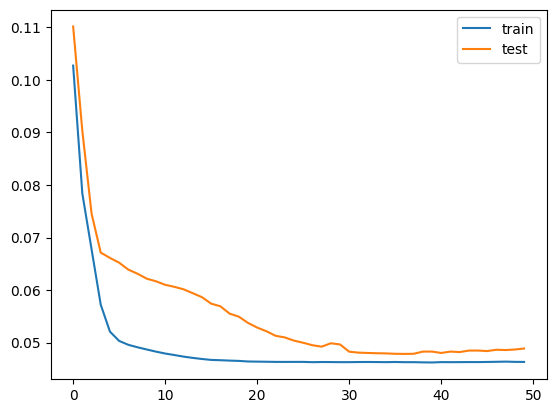

In [ ]:
model = Sequential()
model.add(SimpleRNN(1, input_shape=(train_X_values.shape[1], train_X_values.shape[2])))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X_values , train_y_values, epochs=50, validation_data=(test_X_values, test_y_values), batch_size=72, verbose=2, shuffle=False)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
model = SVR(kernel='rbf', C=100, gamma='auto')
model.fit(train_X_values.reshape((train_X_values.shape[0], train_X_values.shape[2])), train_y_values)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, gamma='auto')

In [ ]:
model = LinearRegression()
model.fit(train_X_values.reshape((train_X_values.shape[0], train_X_values.shape[2])), train_y_values)

LinearRegression()

In [ ]:
train_X_values = train_X_values.reshape(train_X_values.shape[0], train_X_values.shape[2])

In [ ]:
test_X_values = test_X_values.reshape(test_X_values.shape[0], test_X_values.shape[2])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=3)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1653/1653 ━━━━━━━━━━━━━━━━━━━━ 135s 82ms/step - loss: 0.0669 - val_loss: 0.0197
Epoch 2/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 98s 59ms/step - loss: 0.0142 - val_loss: 0.0109
Epoch 3/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 143s 60ms/step - loss: 0.0116 - val_loss: 0.0093
Epoch 4/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 141s 59ms/step - loss: 0.0110 - val_loss: 0.0092
Epoch 5/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 144s 61ms/step - loss: 0.0110 - val_loss: 0.0089
Epoch 6/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 142s 61ms/step - loss: 0.0108 - val_loss: 0.0089
Epoch 7/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 100s 61ms/step - loss: 0.0108 - val_loss: 0.0089
Epoch 8/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 140s 60ms/step - loss: 0.0108 - val_loss: 0.0090
Epoch 9/50
1653/1653 ━━━━━━━━━━━━━━━━━━━━ 141s 59ms/step - loss: 0.0108 - val_loss: 0.0090


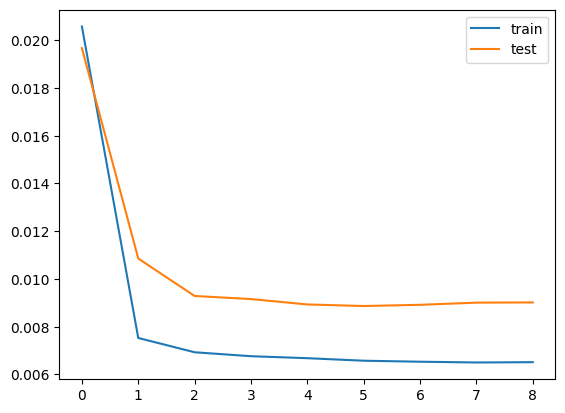

In [ ]:
model=Sequential()
model.add(Dense(32, input_dim=train_X_values.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam',loss='mse', run_eagerly=True)
history = model.fit(train_X_values, train_y_values, epochs=50, validation_data=(test_X_values, test_y_values), batch_size=72, shuffle=False, callbacks=[callback])
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
precision = []
maes = []
mses =[]
rmses = []
r2s = []

for x in range(6, 13, 1):
  temp_data = PM_data.copy()
  temp_data = temp_data.drop_duplicates(subset=['time'], keep='first')
  temp_data = temp_data.sort_values("time")
  temp_data = temp_data.set_index("time")
  temp_data = temp_data.resample("5S").interpolate(method='time')
  temp_data = temp_data.ffill().bfill()

  # Get the last timestamp in your dataset
  last_time = temp_data.index[-1]

  # Generate the next 2 timestamps (5-second intervals)
  next_times = [last_time + pd.Timedelta(seconds=5), last_time + pd.Timedelta(seconds=10)]

  # Create a DataFrame with NaN values for new timestamps
  new_rows = pd.DataFrame(index=next_times, columns=temp_data.columns)
  new_rows[:] = np.nan  # Fill with NaNs so we can interpolate

  # Append to original dataset
  temp_data = pd.concat([temp_data, new_rows])

  # Interpolate to fill NaN values
  temp_data = temp_data.interpolate(method="linear")

  print(len(temp_data))
  print(temp_data.head())
  temp_data['time'] = temp_data.index.values
  temp_data.reset_index(drop=True, inplace=True)

  # Get the timestamp at 70% of the dataset
  train_end_time = temp_data.iloc[int(0.7 * len(temp_data))]["time"]
  print("Training data covers from:", temp_data["time"].min(), "to", train_end_time)

  test_start_time = temp_data.iloc[int(0.7 * len(temp_data))]["time"]

  # Find the end time of the dataset
  test_end_time = temp_data["time"].max()
  print("Testing data covers from:", test_start_time, "to", test_end_time)

  temp_data['geohash'] = temp_data.apply(calculate_geohash, axis=1, args=('geohash', x))
  temp_data = geospatial_join(temp_data, nyc_map)

  temp_data.drop(['geometry', 'index_right', 'neighborhood'], axis=1, inplace=True)
  temp_data['boroughCode'] = temp_data['boroughCode'].astype(int)
  temp_data['geohash'] = encoder.fit_transform(temp_data['geohash'])
  temp_data = temp_data[['time','latitude','longitude','temperature','humidity','geohash','boroughCode','neighborhoodCode','pollution']]
  temp_data['time'] = temp_data['time'].apply(lambda x: x.timestamp())

  scaler = MinMaxScaler(feature_range=(0, 1))
  temp_data = scaler.fit_transform(temp_data)
  temp_data = series_to_supervised(temp_data, n_in=4, n_out=1)

  X = temp_data[['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)','var8(t-1)','var9(t-1)']]
  y = temp_data[['var9(t)']]

  split_index = int(len(X) * 0.8)

  # Ensure training set has enough data to form full sequences
  train_X, train_y = X[:split_index], y[:split_index]
  test_X, test_y = X[split_index-2:], y[split_index-2:]

  # 🔎 Debug check
  print("Training size: ", len(train_X))
  print("Testing size: ", len(test_X))

  train_X_values = train_X.values
  test_X_values = test_X.values
  train_y_values = train_y.values
  test_y_values = test_y.values

  train_X_values = train_X_values.reshape((train_X_values.shape[0], 4, train_X_values.shape[1]))
  test_X_values = test_X_values.reshape((test_X_values.shape[0], 4, test_X_values.shape[1]))

  model = Sequential()
  model.add(LSTM(1, input_shape=(train_X_values.shape[1], train_X_values.shape[2])))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mae', optimizer='adam')
  # fit network
  history = model.fit(train_X_values , train_y_values, epochs=50, validation_data=(test_X_values, test_y_values), batch_size=72, verbose=2, shuffle=False)
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.show()

  # Make predictions
  predicted_y = model.predict(test_X_values)

  # Flatten predictions and ground truth to 1D arrays
  predicted_y = predicted_y.flatten()
  test_y_values = test_y_values.flatten()


  # Calculate metrics
  mae = mean_absolute_error(test_y_values, predicted_y)
  mse = mean_squared_error(test_y_values, predicted_y)
  rmse = np.sqrt(mse)
  r2 = r2_score(test_y_values, predicted_y)

  maes.append(mae)
  mses.append(mse)
  rmses.append(rmse)
  r2s.append(r2)
  precision.append(x)
  print(f"Precision: {x}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")

<ipython-input-69-d78f74626754>:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  temp_data = temp_data.resample("5S").interpolate(method='time')
<ipython-input-69-d78f74626754>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  temp_data = pd.concat([temp_data, new_rows])


1660405
                      latitude  longitude  temperature  humidity  pollution
2021-09-10 12:29:05  40.847713 -73.869324         22.5      59.8   5.050434
2021-09-10 12:29:10  40.847713 -73.869324         22.5      59.8   5.050434
2021-09-10 12:29:15  40.847713 -73.869324         22.5      59.8   5.050434
2021-09-10 12:29:20  40.847713 -73.869324         22.5      59.8   5.050434
2021-09-10 12:29:25  40.847713 -73.869324         22.5      59.8   5.050434
Training data covers from: 2021-09-10 12:29:05 to 2021-11-16 18:46:00
Testing data covers from: 2021-11-16 18:46:00 to 2021-12-15 14:36:05
Training size:  1261745
Testing size:  315439


ValueError: cannot reshape array of size 11355705 into shape (1261745,4,9)

In [ ]:
import pandas as pd
df = pd.DataFrame({"precision": precision, "mae":maes, "mse":mses, "rmse":rmses, "r2":r2s})
df.to_csv("results_conference.csv",index=False)

In [ ]:
temp_data.head()

time   latitude  longitude  temperature  humidity  pollution  \
169499  1.631453e+09  40.805782 -73.889069         23.1      67.6   6.588072   
169500  1.631453e+09  40.805782 -73.889069         23.1      67.7   7.224907   
169501  1.631453e+09  40.805782 -73.889069         23.1      67.1   7.643495   
169502  1.631453e+09  40.805782 -73.889069         23.1      67.1   5.533283   
169503  1.631453e+09  40.805782 -73.889069         23.1      67.2   6.122706   
...              ...        ...        ...          ...       ...        ...   
169994  1.631457e+09  40.823353 -73.890488         24.6      54.8   5.460360   
169995  1.631457e+09  40.823349 -73.890480         24.6      54.8   5.298209   
169996  1.631457e+09  40.823349 -73.890480         24.6      54.8   6.470661   
169997  1.631457e+09  40.823345 -73.890488         24.6      54.6   6.424142   
169998  1.631457e+09  40.823338 -73.890488         24.6      54.6   6.526187   

       geohash                    geometry  index_right neighborhood  \
169499  dr72ns  POINT (-73.88907 40.80578)          140  Hunts Point   
169500  dr72ns  POINT (-73.88907 40.80578)          140  Hunts Point   
169501  dr72ns  POINT (-73.88907 40.80578)          140  Hunts Point   
169502  dr72ns  POINT (-73.88907 40.80578)          140  Hunts Point   
169503  dr72ns  POINT (-73.88907 40.80578)          140  Hunts Point   
...        ...                         ...          ...          ...   
169994  dr72nx  POINT (-73.89049 40.82335)          176     Longwood   
169995  dr72nx  POINT (-73.89048 40.82335)          176     Longwood   
169996  dr72nx  POINT (-73.89048 40.82335)          176     Longwood   
169997  dr72nx  POINT (-73.89049 40.82334)          176     Longwood   
169998  dr72nx  POINT (-73.89049 40.82334)          176     Longwood   

       boroughCode borough                                                @id  \
169499           2   Bronx  http://nyc.pediacities.com/Resource/Neighborho...   
169500           2   Bronx  http://nyc.pediacities.com/Resource/Neighborho...   
169501           2   Bronx  http://nyc.pediacities.com/Resource/Neighborho...   
169502           2   Bronx  http://nyc.pediacities.com/Resource/Neighborho...   
169503           2   Bronx  http://nyc.pediacities.com/Resource/Neighborho...   
...            ...     ...                                                ...   
169994           2   Bronx  http://nyc.pediacities.com/Resource/Neighborho...   
169995           2   Bronx  http://nyc.pediacities.com/Resource/Neighborho...   
169996           2   Bronx  http://nyc.pediacities.com/Resource/Neighborho...   
169997           2   Bronx  http://nyc.pediacities.com/Resource/Neighborho...   
169998           2   Bronx  http://nyc.pediacities.com/Resource/Neighborho...   

        neighborhoodCode  
169499               128  
169500               128  
169501               128  
169502               128  
169503               128  
...                  ...  
169994               149  
169995               149  
169996               149  
169997               149  
169998               149  

[500 rows x 14 columns]

In [ ]:
#h3_dataset = PM_data.copy()
geohash_dataset = PM_data.copy()

#h3_dataset['H3'] = h3_dataset.apply(calculate_geohash, axis=1, args=('H3',))
geohash_dataset['geohash'] = geohash_dataset.apply(calculate_geohash, axis=1, args=('geohash',7,))

In [ ]:
#print(len(h3_dataset['H3'].unique()))
print(len(geohash_dataset['geohash'].unique()))

2811


In [ ]:
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt-get -f install -y
!wget https://chromedriver.storage.googleapis.com/$(curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE)/chromedriver_linux64.zip
!unzip chromedriver_linux64.zip
!mv chromedriver /usr/bin/chromedriver
!chmod +x /usr/bin/chromedriver

--2025-01-14 15:13:10--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 142.250.65.110, 2607:f8b0:4025:815::200e
Connecting to dl.google.com (dl.google.com)|142.250.65.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112846176 (108M) [application/x-debian-package]
Saving to: ‘google-chrome-stable_current_amd64.deb’

google-chrome-stabl 100%[===================>] 107.62M  23.9MB/s    in 4.6s    

2025-01-14 15:13:15 (23.3 MB/s) - ‘google-chrome-stable_current_amd64.deb’ saved [112846176/112846176]

Selecting previously unselected package google-chrome-stable.
(Reading database ... 124097 files and directories currently installed.)
Preparing to unpack google-chrome-stable_current_amd64.deb ...
Unpacking google-chrome-stable (131.0.6778.264-1) ...
dpkg: dependency problems prevent configuration of google-chrome-stable:
 google-chrome-stable depends on libvulkan1; however:
  Package libvulkan

In [ ]:
!apt-get remove -y google-chrome-stable
!wget https://chrome-versions.com/google-chrome-stable-114.0.5735.90-1.deb
!dpkg -i google-chrome-stable-114.0.5735.90-1.deb
!apt-get -f install -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package 'google-chrome-stable' is not installed, so not removed
The following packages were automatically installed and are no longer required:
  libvulkan1 mesa-vulkan-drivers
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 53 not upgraded.
--2025-01-14 15:25:32--  https://chrome-versions.com/google-chrome-stable-114.0.5735.90-1.deb
Resolving chrome-versions.com (chrome-versions.com)... 104.21.40.183, 172.67.156.72, 2606:4700:3033::6815:28b7, ...
Connecting to chrome-versions.com (chrome-versions.com)|104.21.40.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93841272 (89M) [application/octet-stream]
Saving to: ‘google-chrome-stable-114.0.5735.90-1.deb’

google-chrome-stabl 100%[===================>]  89.49M  9.09MB/s    in 11s     

2025-01-14 15:25:43 (8.16 MB/s) - ‘google-chrome-stable-114.0.5735.90-1.deb’ saved [93841272/

In [ ]:
!google-chrome --version
!chromedriver --version

Google Chrome 114.0.5735.90 
ChromeDriver 114.0.5735.90 (386bc09e8f4f2e025eddae123f36f6263096ae49-refs/branch-heads/5735@{#1052})


In [ ]:
sample_geohash_1 = geohash_dataset['geohash'].iloc[0]
sample_geohash_2 = geohash_dataset['geohash'].iloc[5]

In [ ]:
print(sample_geohash_1, sample_geohash_2)

dr72rh4 dr72rh1


In [ ]:
import geohash2
import folium
from shapely.geometry import Polygon
from selenium import webdriver
from PIL import Image
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import os

# Function to get geohash bounds and create a polygon
def geohash_polygon(geohash_code):
    lat, lon, lat_err, lon_err = geohash2.decode_exactly(geohash_code)
    bounds = {
        'n': lat + lat_err,
        's': lat - lat_err,
        'e': lon + lon_err,
        'w': lon - lon_err,
    }
    polygon = Polygon([
        (bounds['w'], bounds['s']),  # Bottom-left
        (bounds['e'], bounds['s']),  # Bottom-right
        (bounds['e'], bounds['n']),  # Top-right
        (bounds['w'], bounds['n']),  # Top-left
        (bounds['w'], bounds['s'])   # Close loop
    ])
    return polygon

# Example geohash
geohash_code_1 = sample_geohash_1
polygon_1 = geohash_polygon(geohash_code_1)
lat_1, lon_1, _, _ = geohash2.decode_exactly(geohash_code_1)

geohash_code_2 = sample_geohash_2
polygon_2 = geohash_polygon(geohash_code_2)
lat_2, lon_2, _, _ = geohash2.decode_exactly(geohash_code_2)

# Create the map
m = folium.Map(location=[lat_1, lon_1], zoom_start=16)
folium.Polygon(
    locations=[(point[1], point[0]) for point in polygon_1.exterior.coords],
    color="red",
    weight=5,
    fill=True,
    fill_color="red",
    fill_opacity=0.1,
).add_to(m)

folium.Polygon(
    locations=[(point[1], point[0]) for point in polygon_2.exterior.coords],
    color="red",
    weight=5,
    fill=True,
    fill_color="red",
    fill_opacity=0.1,
).add_to(m)

# Save the map as HTML
html_file = "geohash_map.html"
m.save(html_file)

# Use Selenium to take a screenshot
# Ensure you have a webdriver (e.g., ChromeDriver) installed and available
# Use ChromeDriverManager to manage the ChromeDriver
# Create a Service object using ChromeDriverManager
#service = Service(ChromeDriverManager().install())

# Configure Chrome options for headless execution
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run Chrome in headless mode
chrome_options.add_argument("--no-sandbox")  # Bypass OS security model
chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
chrome_options.add_argument("--disable-gpu")  # Avoid using GPU acceleration

# Set the path to the chromedriver executable
chrome_driver_path = "/usr/bin/chromedriver"  # Replace with the actual path if different

# Create a Service object using the specified chromedriver path
service = Service(executable_path=chrome_driver_path)

# Pass the Service and Chrome options to the webdriver
driver = webdriver.Chrome(service=service, options=chrome_options)

driver.get(f"file://{os.getcwd()}/{html_file}")  #Get the file path in case colab is saving it in a custom path

# Adjust the browser window size to capture the full map
driver.set_window_size(800, 600)
screenshot_file = "geohash_map.png"
driver.save_screenshot(screenshot_file)
driver.quit()

# Optionally, open the saved PNG and view it
img = Image.open(screenshot_file)
img.show()

In [ ]:
print(len(geohash_dataset))

292767


In [ ]:
#Spatial Aggregation
#print("% of data after spatial aggregation H3:" ,len(h3_dataset['H3'].unique()) / len(PM_data))
print("% of data after spatial aggregation geohash:" ,len(geohash_dataset['geohash'].unique()) / len(PM_data))

% of data after spatial aggregation geohash: 0.4802522142181325


In [ ]:
h3_dataset.head()

time   latitude  longitude  temperature  humidity  pollution  \
0 2021-09-10 12:35:04  40.847672 -73.869316         23.7      57.3   4.508813   
1 2021-09-10 12:35:08  40.847668 -73.869316         23.7      57.8   5.462420   
2 2021-09-10 12:35:13  40.847649 -73.869362         23.7      57.8   5.154881   
3 2021-09-10 12:35:18  40.847649 -73.869362         23.6      57.6   4.508813   
4 2021-09-10 12:35:23  40.847649 -73.869362         23.6      57.5   5.539503   

  city               H3  
0  NYC  8f2a1001320e9a6  
1  NYC  8f2a1001320e9a6  
2  NYC  8f2a1001320e991  
3  NYC  8f2a1001320e991  
4  NYC  8f2a1001320e991

In [ ]:
geohash_dataset.head()

time   latitude  longitude  temperature  humidity  pollution  \
0 2021-09-10 12:35:04  40.847672 -73.869316         23.7      57.3   4.508813   
1 2021-09-10 12:35:08  40.847668 -73.869316         23.7      57.8   5.462420   
2 2021-09-10 12:35:13  40.847649 -73.869362         23.7      57.8   5.154881   
3 2021-09-10 12:35:18  40.847649 -73.869362         23.6      57.6   4.508813   
4 2021-09-10 12:35:23  40.847649 -73.869362         23.6      57.5   5.539503   

  city     geohash  
0  NYC  dr72rh44bj  
1  NYC  dr72rh44bj  
2  NYC  dr72rh1fz1  
3  NYC  dr72rh1fz1  
4  NYC  dr72rh1fz1

In [ ]:
def decode_geohash(geohash, algorithm):
    if algorithm == 'H3':
      return h3.cells_to_geo(geohash)
    else:
      return geohash2.decode(geohash)

In [ ]:
#h3.cells_to_geo(h3_dataset['H3'].unique())

KeyboardInterrupt: 

In [ ]:
def setCenterGeohash(dataset, algorithm):
  if algorithm == 'H3':
    dataset['latitude'], dataset['longitude'] = decode_geohash(dataset[algorithm], algorithm)
  else:
    latitude = []
    longitude = []
    for i in dataset[algorithm].values:
      latitude.append(decode_geohash(i, algorithm)[0])
      longitude.append(decode_geohash(i, algorithm)[1])
    return latitude, longitude

In [ ]:
h3_dataset = setCenterGeohash(h3_dataset, 'H3')

In [ ]:
geohash_dataset['latitude'], geohash_dataset['longitude'] = setCenterGeohash(geohash_dataset, 'geohash')

In [ ]:
h3_dataset.head()

time   latitude  longitude  temperature  humidity  pollution  \
0 2021-09-10 12:35:04  40.847669 -73.869319         23.7      57.3   4.508813   
1 2021-09-10 12:35:08  40.847669 -73.869319         23.7      57.8   5.462420   
2 2021-09-10 12:35:13  40.847645 -73.869362         23.7      57.8   5.154881   
3 2021-09-10 12:35:18  40.847645 -73.869362         23.6      57.6   4.508813   
4 2021-09-10 12:35:23  40.847645 -73.869362         23.6      57.5   5.539503   

  city               H3  
0  NYC  8f2a1001320e9a6  
1  NYC  8f2a1001320e9a6  
2  NYC  8f2a1001320e991  
3  NYC  8f2a1001320e991  
4  NYC  8f2a1001320e991

In [ ]:
geohash_dataset.head()

time  latitude longitude  temperature  humidity  pollution  \
0 2021-09-10 12:35:04  40.84767  -73.8693         23.7      57.3   4.508813   
1 2021-09-10 12:35:08  40.84767  -73.8693         23.7      57.8   5.462420   
2 2021-09-10 12:35:13  40.84765  -73.8694         23.7      57.8   5.154881   
3 2021-09-10 12:35:18  40.84765  -73.8694         23.6      57.6   4.508813   
4 2021-09-10 12:35:23  40.84765  -73.8694         23.6      57.5   5.539503   

  city     geohash  
0  NYC  dr72rh44bj  
1  NYC  dr72rh44bj  
2  NYC  dr72rh1fz1  
3  NYC  dr72rh1fz1  
4  NYC  dr72rh1fz1

In [ ]:
import geopandas as gpd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
nyc_map = gpd.read_file(path + "nyc_polygon.geojson")
boston_map = gpd.read_file(path + "boston.geojson")

In [ ]:
nyc_map.head()

neighborhood boroughCode        borough  \
0         Allerton           2          Bronx   
1  Alley Pond Park           4         Queens   
2    Arden Heights           5  Staten Island   
3        Arlington           5  Staten Island   
4         Arrochar           5  Staten Island   

                                                 @id  \
0  http://nyc.pediacities.com/Resource/Neighborho...   
1  http://nyc.pediacities.com/Resource/Neighborho...   
2  http://nyc.pediacities.com/Resource/Neighborho...   
3  http://nyc.pediacities.com/Resource/Neighborho...   
4  http://nyc.pediacities.com/Resource/Neighborho...   

                                            geometry  neighborhoodCode  
0  POLYGON ((-73.8486 40.87167, -73.84582 40.8702...                 0  
1  POLYGON ((-73.74333 40.73888, -73.74371 40.739...                 1  
2  POLYGON ((-74.16983 40.56108, -74.16982 40.561...                 2  
3  POLYGON ((-74.15975 40.64142, -74.15998 40.641...                 3  
4  POLYGON ((-74.06078 40.59319, -74.06079 40.593...                 4

In [ ]:
boston_map.head()

name                       created_at  \
0        Roslindale 2013-02-19 04:40:34.216000+00:00   
1     Jamaica Plain 2013-02-19 04:40:34.216000+00:00   
2  Leather District 2013-02-19 04:40:34.216000+00:00   
3           Roxbury 2013-02-19 04:40:34.216000+00:00   
4            Fenway 2013-02-19 04:40:34.216000+00:00   

                        updated_at  cartodb_id  \
0 2013-02-19 04:40:34.466000+00:00           1   
1 2013-02-19 04:40:34.466000+00:00           2   
2 2013-02-19 04:40:34.466000+00:00           6   
3 2013-02-19 04:40:34.466000+00:00           9   
4 2013-02-19 04:40:34.466000+00:00          17   

                                            geometry  
0  MULTIPOLYGON (((-71.12593 42.272, -71.12575 42...  
1  MULTIPOLYGON (((-71.09831 42.3263, -71.09858 4...  
2  MULTIPOLYGON (((-71.05838 42.34982, -71.05877 ...  
3  MULTIPOLYGON (((-71.08314 42.34153, -71.08303 ...  
4  MULTIPOLYGON (((-71.11011 42.35207, -71.10986 ...

In [ ]:
nyc_map = nyc_map.drop(['borough', '@id'], axis=1)

In [ ]:
boston_map = boston_map.rename(columns={'name': 'neighborhood'})
boston_map = boston_map.drop(['created_at', 'updated_at', 'cartodb_id'], axis=1)

In [ ]:
nyc_map.head()

neighborhood boroughCode        borough  \
0         Allerton           2          Bronx   
1  Alley Pond Park           4         Queens   
2    Arden Heights           5  Staten Island   
3        Arlington           5  Staten Island   
4         Arrochar           5  Staten Island   

                                                 @id  \
0  http://nyc.pediacities.com/Resource/Neighborho...   
1  http://nyc.pediacities.com/Resource/Neighborho...   
2  http://nyc.pediacities.com/Resource/Neighborho...   
3  http://nyc.pediacities.com/Resource/Neighborho...   
4  http://nyc.pediacities.com/Resource/Neighborho...   

                                            geometry  neighborhoodCode  
0  POLYGON ((-73.8486 40.87167, -73.84582 40.8702...                 0  
1  POLYGON ((-73.74333 40.73888, -73.74371 40.739...                 1  
2  POLYGON ((-74.16983 40.56108, -74.16982 40.561...                 2  
3  POLYGON ((-74.15975 40.64142, -74.15998 40.641...                 3  
4  POLYGON ((-74.06078 40.59319, -74.06079 40.593...                 4

In [ ]:
boston_map.head()

neighborhood                                           geometry
0        Roslindale  MULTIPOLYGON (((-71.12593 42.272, -71.12575 42...
1     Jamaica Plain  MULTIPOLYGON (((-71.09831 42.3263, -71.09858 4...
2  Leather District  MULTIPOLYGON (((-71.05838 42.34982, -71.05877 ...
3           Roxbury  MULTIPOLYGON (((-71.08314 42.34153, -71.08303 ...
4            Fenway  MULTIPOLYGON (((-71.11011 42.35207, -71.10986 ...

In [ ]:
map = pd.concat([nyc_map, boston_map])

In [ ]:
print(len(map) == (len(nyc_map) + len(boston_map)))

True


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

def geospatial_join(dataset, map):
    # Convert dataset to GeoDataFrame
    dataset['geometry'] = dataset.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
    pollution_geo = gpd.GeoDataFrame(dataset, geometry='geometry', crs=map.crs)  # Ensure CRS matches

    # Perform spatial join (switching order so dataset keeps all its columns)
    merged_data = gpd.sjoin(pollution_geo, map, how='inner', predicate='within')

    return merged_data

In [ ]:
#geospatial_join(h3_dataset)
geospatial_join(geohash_dataset)

<ipython-input-28-b6b3de83bfce>:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  merged_data = gpd.sjoin(map, pollution_geo, how='right')


In [ ]:
h3_dataset.head()

time   latitude  longitude  temperature  humidity  pollution  \
0 2021-09-10 12:35:04  40.847669 -73.869319         23.7      57.3   4.508813   
1 2021-09-10 12:35:08  40.847669 -73.869319         23.7      57.8   5.462420   
2 2021-09-10 12:35:13  40.847645 -73.869362         23.7      57.8   5.154881   
3 2021-09-10 12:35:18  40.847645 -73.869362         23.6      57.6   4.508813   
4 2021-09-10 12:35:23  40.847645 -73.869362         23.6      57.5   5.539503   

  city               H3                                       geometry  
0  NYC  8f2a1001320e9a6  POINT (-73.86931942436102 40.847668771473614)  
1  NYC  8f2a1001320e9a6  POINT (-73.86931942436102 40.847668771473614)  
2  NYC  8f2a1001320e991  POINT (-73.86936229627052 40.847644508718076)  
3  NYC  8f2a1001320e991  POINT (-73.86936229627052 40.847644508718076)  
4  NYC  8f2a1001320e991  POINT (-73.86936229627052 40.847644508718076)

In [ ]:
geohash_dataset.head()

time   latitude  longitude  temperature  humidity  pollution  \
0 2021-09-10 12:35:04  40.847672 -73.869316         23.7      57.3   4.508813   
1 2021-09-10 12:35:08  40.847668 -73.869316         23.7      57.8   5.462420   
2 2021-09-10 12:35:13  40.847649 -73.869362         23.7      57.8   5.154881   
3 2021-09-10 12:35:18  40.847649 -73.869362         23.6      57.6   4.508813   
4 2021-09-10 12:35:23  40.847649 -73.869362         23.6      57.5   5.539503   

  city     geohash                      geometry  
0  NYC  dr72rh44bj  POINT (-73.869316 40.847672)  
1  NYC  dr72rh44bj  POINT (-73.869316 40.847668)  
2  NYC  dr72rh1fz1  POINT (-73.869362 40.847649)  
3  NYC  dr72rh1fz1  POINT (-73.869362 40.847649)  
4  NYC  dr72rh1fz1  POINT (-73.869362 40.847649)

In [ ]:
#h3_dataset = h3_dataset.dropna()
geohash_dataset = geohash_dataset.dropna()

In [ ]:
h3_dataset.dtypes

time           datetime64[ns]
latitude              float64
longitude             float64
temperature           float64
humidity              float64
pollution             float64
city                   object
H3                     object
geometry               object
dtype: object

In [ ]:
geohash_dataset.dtypes

time           datetime64[ns]
latitude              float64
longitude             float64
temperature           float64
humidity              float64
pollution             float64
city                   object
geohash                object
geometry               object
dtype: object

In [ ]:
geohash_dataset['latitude'] = geohash_dataset['latitude'].astype(float)
geohash_dataset['longitude'] = geohash_dataset['longitude'].astype(float)

In [ ]:
print(len(geohash_dataset))
#print(len(h3_dataset))

292767


In [ ]:
print("# Unique Geohash references:" ,len(geohash_dataset['geohash'].unique()))
#print("# Unique H3 references:" , len(h3_dataset['H3'].unique()))

# Unique Geohash references: 2811


# Spatial Aggregation

In [ ]:
def spatial_aggregation(dataset, column_name):
  # Group by geohash and compute the mean of numeric columns
  result = dataset.copy()
  result = result.groupby(column_name).mean()

  # Display the result
  return result

In [ ]:
#h3_dataset = h3_dataset.drop(['geometry', 'city'], axis=1)
geohash_dataset = geohash_dataset.drop(['geometry'], axis=1)

#cities = spatial_aggregation(h3_dataset, 'H3')
geohash_dataset = spatial_aggregation(geohash_dataset, 'geohash')

In [ ]:
print(len(geohash_dataset))
#print(len(h3_dataset))

2811


In [ ]:
#h3_dataset['hash_reference'] = h3_dataset.index
geohash_dataset['hash_reference'] = geohash_dataset.index

In [ ]:
#h3_dataset.reset_index(drop=True, inplace=True)
geohash_dataset.reset_index(drop=True, inplace=True)

In [ ]:
h3_dataset.head()

time   latitude  longitude  temperature  humidity  pollution  \
0 2021-09-10 12:35:04  40.847669 -73.869319         23.7      57.3   4.508813   
1 2021-09-10 12:35:08  40.847669 -73.869319         23.7      57.8   5.462420   
2 2021-09-10 12:35:13  40.847645 -73.869362         23.7      57.8   5.154881   
3 2021-09-10 12:35:18  40.847645 -73.869362         23.6      57.6   4.508813   
4 2021-09-10 12:35:23  40.847645 -73.869362         23.6      57.5   5.539503   

  city               H3  
0  NYC  8f2a1001320e9a6  
1  NYC  8f2a1001320e9a6  
2  NYC  8f2a1001320e991  
3  NYC  8f2a1001320e991  
4  NYC  8f2a1001320e991

In [ ]:
geohash_dataset.head()

time   latitude  longitude  temperature  humidity  pollution  \
0 2021-09-10 12:35:04  40.847672 -73.869316         23.7      57.3   4.508813   
1 2021-09-10 12:35:08  40.847668 -73.869316         23.7      57.8   5.462420   
2 2021-09-10 12:35:13  40.847649 -73.869362         23.7      57.8   5.154881   
3 2021-09-10 12:35:18  40.847649 -73.869362         23.6      57.6   4.508813   
4 2021-09-10 12:35:23  40.847649 -73.869362         23.6      57.5   5.539503   

  city     geohash  
0  NYC  dr72rh44bj  
1  NYC  dr72rh44bj  
2  NYC  dr72rh1fz1  
3  NYC  dr72rh1fz1  
4  NYC  dr72rh1fz1

# Stratified Sampling

In [ ]:
# Taking 80% of data from each geohashed value
def get_proportions(dataset, geohash_algorithm, proportion):
  stratified_proportions = dataset[geohash_algorithm].value_counts().values * proportion
  stratified_proportions = stratified_proportions.astype(int)
  stratified_proportions = stratified_proportions[stratified_proportions > 0]
  return stratified_proportions

In [ ]:
#Stratified Sampling
def stratified_sampling(dataset, geohash_algorithm):
  stratified_sampled_dataset = pd.DataFrame(columns=dataset.columns)
  index = 0

  stratified_proportions = get_proportions(dataset, geohash_algorithm, 0.8)

  for geohash in dataset[geohash_algorithm].value_counts().keys()[:len(stratified_proportions)].values:
    sample = dataset[dataset[geohash_algorithm] == geohash].sample(stratified_proportions[index])
    index += 1
    stratified_sampled_dataset = pd.concat([stratified_sampled_dataset, sample])
  return stratified_sampled_dataset

In [ ]:
#h3_dataset = stratified_sampling(h3_dataset, 'H3')
geohash_dataset = stratified_sampling(geohash_dataset, 'hash_reference')

In [ ]:
#print(len(h3_dataset))
print(len(geohash_dataset))

0


In [ ]:
h3_dataset.head()

time   latitude  longitude  temperature  humidity  \
66483 2021-10-10 07:18:34  40.846323 -73.870339         17.7      81.2   
91482 2021-11-06 04:41:38  40.846323 -73.870339          5.8      64.4   
29626 2021-09-30 08:53:34  40.846323 -73.870339         16.3      61.2   
22747 2021-09-28 04:44:58  40.846323 -73.870339         22.6      51.1   
95306 2021-11-07 08:03:55  40.846323 -73.870339          4.6      88.3   

       pollution city               H3  \
66483   4.979337  NYC  8a2a100132e7fff   
91482   2.199988  NYC  8a2a100132e7fff   
29626   2.889689  NYC  8a2a100132e7fff   
22747   4.570747  NYC  8a2a100132e7fff   
95306   3.587739  NYC  8a2a100132e7fff   

                                            geometry  
66483  POINT (-73.87033901864342 40.846322777075095)  
91482  POINT (-73.87033901864342 40.846322777075095)  
29626  POINT (-73.87033901864342 40.846322777075095)  
22747  POINT (-73.87033901864342 40.846322777075095)  
95306  POINT (-73.87033901864342 40.846322777075095)

In [ ]:
geohash_dataset.head()

time  latitude  longitude  temperature  humidity  \
106190 2021-11-11 08:56:01     40.85     -73.87          7.8      61.4   
63140  2021-10-09 05:27:07     40.85     -73.87         19.4      72.6   
97941  2021-11-08 06:31:26     40.85     -73.87          9.8      56.9   
29650  2021-09-30 09:37:47     40.85     -73.87         15.7      62.8   
91776  2021-11-06 06:48:45     40.85     -73.87          4.3      74.6   

        pollution city  geohash              geometry  
106190   2.580947  NYC  dr72r5c  POINT (-73.87 40.85)  
63140    4.214411  NYC  dr72r5c  POINT (-73.87 40.85)  
97941    2.274121  NYC  dr72r5c  POINT (-73.87 40.85)  
29650    2.515773  NYC  dr72r5c  POINT (-73.87 40.85)  
91776    2.356222  NYC  dr72r5c  POINT (-73.87 40.85)

In [ ]:
h3_dataset.set_index('time', inplace=True)
h3_dataset = h3_dataset.sort_index(ascending=False).groupby('H3').apply(lambda x: x)
h3_dataset = h3_dataset.set_index(h3_dataset.index.get_level_values(1).values)

In [ ]:
h3_dataset.head()

latitude  longitude  temperature  humidity  pollution  \
2021-09-25 02:56:46  40.857667 -73.826328         19.7      63.1   3.447160   
2021-09-25 02:57:11  40.852378 -73.826138         19.7      62.6   3.416802   
2021-09-24 23:20:20  40.852378 -73.826138         24.2      40.8   4.317958   
2021-09-24 23:20:05  40.852378 -73.826138         24.2      40.7   5.385786   
2021-09-24 23:20:00  40.852378 -73.826138         24.2      40.7   5.124645   

                    city               H3  \
2021-09-25 02:56:46  NYC  8a2a100024d7fff   
2021-09-25 02:57:11  NYC  8a2a10002697fff   
2021-09-24 23:20:20  NYC  8a2a10002697fff   
2021-09-24 23:20:05  NYC  8a2a10002697fff   
2021-09-24 23:20:00  NYC  8a2a10002697fff   

                                                          geometry  
2021-09-25 02:56:46  POINT (-73.82632787666775 40.857666737069714)  
2021-09-25 02:57:11   POINT (-73.82613840563779 40.85237778107742)  
2021-09-24 23:20:20   POINT (-73.82613840563779 40.85237778107742)  
2021-09-24 23:20:05   POINT (-73.82613840563779 40.85237778107742)  
2021-09-24 23:20:00   POINT (-73.82613840563779 40.85237778107742)

In [ ]:
geohash_dataset.set_index('time', inplace=True)
geohash_dataset = geohash_dataset.sort_index(ascending=False).groupby('geohash').apply(lambda x: x)
geohash_dataset = geohash_dataset.set_index(geohash_dataset.index.get_level_values(1).values)

In [ ]:
geohash_dataset.head()

latitude  longitude  temperature  humidity  pollution  \
2021-09-22 15:39:47     40.74     -73.85         28.4      69.4  11.104581   
2021-09-22 15:39:42     40.74     -73.85         28.4      69.8  10.525255   
2021-09-22 15:39:37     40.74     -73.85         28.4      69.8  11.104581   
2021-09-22 15:39:32     40.74     -73.85         28.4      69.8   7.883850   
2021-09-22 15:39:27     40.74     -73.85         28.4      71.3  11.051157   

                    city  geohash              geometry  
2021-09-22 15:39:47  NYC  dr5rz97  POINT (-73.85 40.74)  
2021-09-22 15:39:42  NYC  dr5rz97  POINT (-73.85 40.74)  
2021-09-22 15:39:37  NYC  dr5rz97  POINT (-73.85 40.74)  
2021-09-22 15:39:32  NYC  dr5rz97  POINT (-73.85 40.74)  
2021-09-22 15:39:27  NYC  dr5rz97  POINT (-73.85 40.74)

# Data Interleaving

In [ ]:
def data_interleave(dataset, geohash_algorithm):
  boston_data = dataset[dataset['city'] == 'Boston'].copy()
  split_length = int(len(boston_data)/2)
  print("Boston split length " + str(split_length))
  boston_data_1 = boston_data[:split_length]
  boston_data_2 = boston_data[split_length:2*split_length]

  boston_data_1 = boston_data_1.sort_index().groupby(geohash_algorithm).apply(lambda x: x)
  boston_data_1 = boston_data_1.set_index(boston_data_1.index.get_level_values(1).values)

  boston_data_2 = boston_data_2.sort_index().groupby(geohash_algorithm).apply(lambda x: x)
  boston_data_2 = boston_data_2.set_index(boston_data_2.index.get_level_values(1).values)

  dataset.drop(dataset[dataset['city'] == 'Boston'].index, inplace=True)

  nyc_data = dataset.copy()

  split_length = int(len(nyc_data)/2)
  print("NYC split length " + str(split_length))

  nyc_data_1 = nyc_data[:split_length]
  nyc_data_2 = nyc_data[split_length:2*split_length]

  nyc_data_1 = nyc_data_1.sort_index().groupby(geohash_algorithm).apply(lambda x: x)
  nyc_data_1 = nyc_data_1.set_index(nyc_data_1.index.get_level_values(1).values)

  nyc_data_2 = nyc_data_2.sort_index().groupby(geohash_algorithm).apply(lambda x: x)
  nyc_data_2 = nyc_data_2.set_index(nyc_data_2.index.get_level_values(1).values)

  dataset = dataset.drop(dataset[dataset['city'] == 'NYC'].index, inplace=True)

  dataset = pd.concat([boston_data_1, nyc_data_1, boston_data_2, nyc_data_2])
  return dataset

In [ ]:
h3_dataset = data_interleave(h3_dataset, 'H3')
geohash_dataset = data_interleave(geohash_dataset, 'geohash')

KeyError: 'city'

In [ ]:
h3_dataset.head()

latitude  longitude  temperature  humidity  pollution  \
2022-02-11 15:02:13  42.350269 -71.018383          8.9      39.7   1.226552   
2022-02-11 15:02:14  42.350269 -71.018383          9.7      41.6   1.423033   
2022-02-11 15:02:18  42.350269 -71.018383          8.8      39.8   1.226552   
2022-02-11 15:02:19  42.350269 -71.018383          9.7      41.7   1.423033   
2022-02-11 15:02:24  42.350269 -71.018383          9.6      42.4   1.423033   

                       city               H3  \
2022-02-11 15:02:13  Boston  872a30292ffffff   
2022-02-11 15:02:14  Boston  872a30292ffffff   
2022-02-11 15:02:18  Boston  872a30292ffffff   
2022-02-11 15:02:19  Boston  872a30292ffffff   
2022-02-11 15:02:24  Boston  872a30292ffffff   

                                                          geometry  
2022-02-11 15:02:13  POINT (-71.01838306900906 42.350268643206114)  
2022-02-11 15:02:14  POINT (-71.01838306900906 42.350268643206114)  
2022-02-11 15:02:18  POINT (-71.01838306900906 42.350268643206114)  
2022-02-11 15:02:19  POINT (-71.01838306900906 42.350268643206114)  
2022-02-11 15:02:24  POINT (-71.01838306900906 42.350268643206114)

In [ ]:
geohash_dataset.head()

time  latitude  longitude  temperature  humidity  \
0 2021-10-29 14:42:46.000  40.71169   -73.9341         13.7      64.0   
1 2021-10-29 13:54:43.000  40.74094   -73.8988         14.0      59.3   
2 2021-09-22 15:19:51.000  40.74533   -73.8450         29.0      68.4   
3 2021-09-22 15:19:46.000  40.74535   -73.8450         29.0      67.8   
4 2021-09-22 15:12:24.500  40.74535   -73.8450         29.0      68.3   

   pollution hash_reference  
0   3.187280     dr5rte6fg8  
1   3.084182     dr5ry2st0y  
2   7.922566     dr5rz97wzb  
3  12.184015     dr5rz97wze  
4  10.489052     dr5rz97wzk

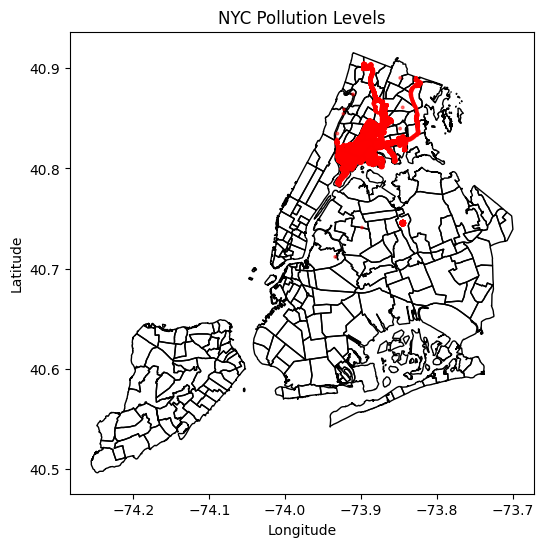

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = nyc_map.plot(ax=ax, facecolor="none", edgecolor="black")
ax.scatter(NYC_PM['longitude'], NYC_PM['latitude'], s=NYC_PM['pollution'], color='red', alpha=0.5)

ax.set_title("NYC Pollution Levels")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()
plt.close()

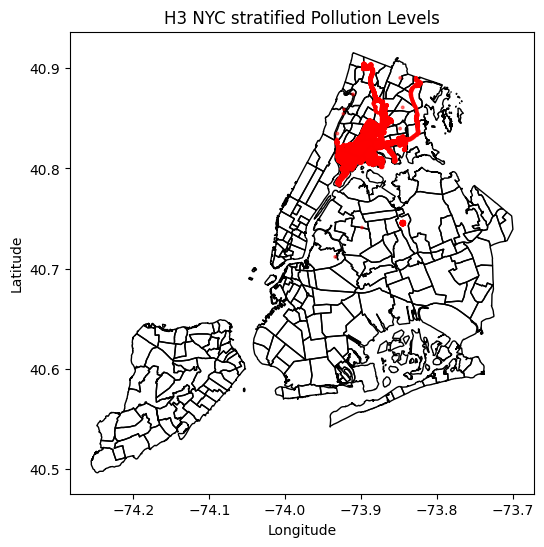

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

nyc_stratified = h3_dataset[
    (h3_dataset['latitude'] >= 40.5) &
    (h3_dataset['latitude'] <= 50) &
    (h3_dataset['longitude'] >= -74.1) &
    (h3_dataset['longitude'] <= -73.7)
]
ax = nyc_map.plot(ax=ax, facecolor="none", edgecolor="black")
ax.scatter(nyc_stratified['longitude'], nyc_stratified['latitude'], s=nyc_stratified['pollution'], color='red', alpha=0.5)

ax.set_title("H3 NYC stratified Pollution Levels")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

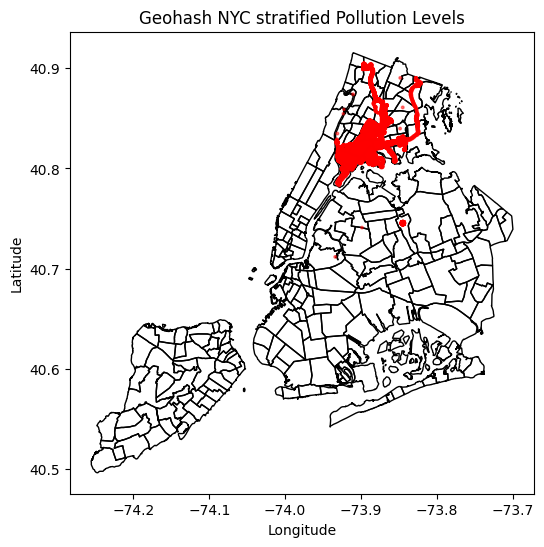

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

nyc_stratified = geohash_dataset[
    (geohash_dataset['latitude'] >= 40.5) &
    (geohash_dataset['latitude'] <= 50) &
    (geohash_dataset['longitude'] >= -74.1) &
    (geohash_dataset['longitude'] <= -73.7)
]
ax = nyc_map.plot(ax=ax, facecolor="none", edgecolor="black")
ax.scatter(nyc_stratified['longitude'], nyc_stratified['latitude'], s=nyc_stratified['pollution'], color='red', alpha=0.5)

ax.set_title("Geohash NYC stratified Pollution Levels")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

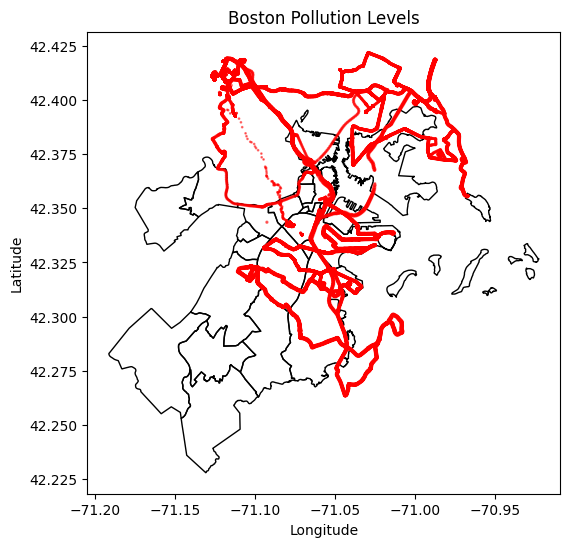

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = boston_map.plot(ax=ax, facecolor="none", edgecolor="black")
ax.scatter(BOSTON_PM['longitude'], BOSTON_PM['latitude'], s=BOSTON_PM['pollution'], color='red', alpha=0.5)

ax.set_title("Boston Pollution Levels")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

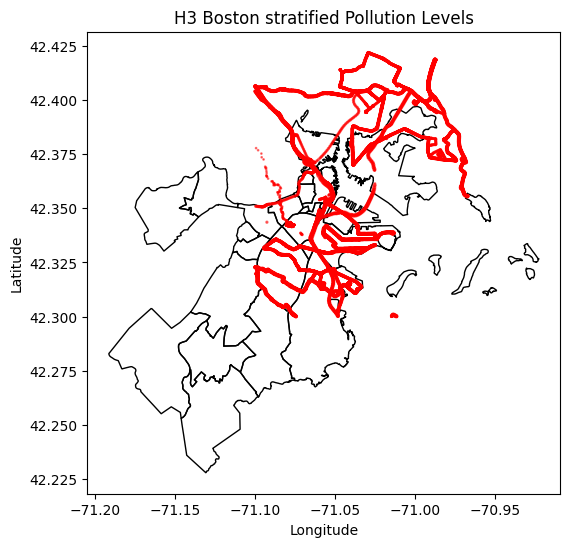

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

boston_stratified = h3_dataset[
    (h3_dataset['latitude'] >= 42.3) &
    (h3_dataset['latitude'] <= 42.5) &
    (h3_dataset['longitude'] >= -71.1) &
    (h3_dataset['longitude'] <= -70.9)
]

ax = boston_map.plot(ax=ax, facecolor="none", edgecolor="black")
ax.scatter(boston_stratified['longitude'], boston_stratified['latitude'], s=boston_stratified['pollution'], color='red', alpha=0.5)

ax.set_title("H3 Boston stratified Pollution Levels")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

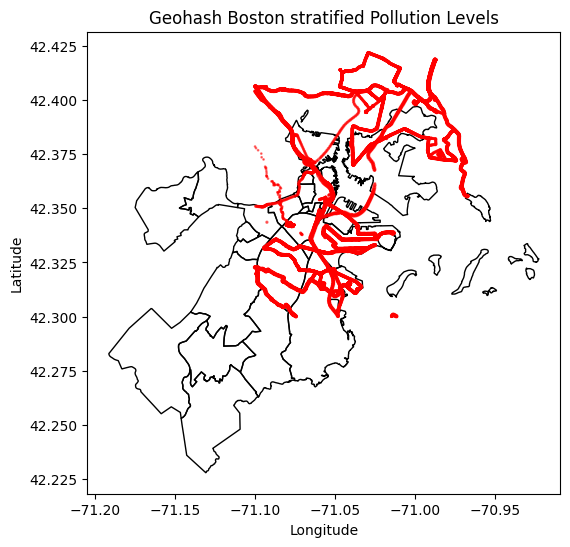

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

boston_stratified = geohash_dataset[
    (geohash_dataset['latitude'] >= 42.3) &
    (geohash_dataset['latitude'] <= 42.5) &
    (geohash_dataset['longitude'] >= -71.1) &
    (geohash_dataset['longitude'] <= -70.9)
]

ax = boston_map.plot(ax=ax, facecolor="none", edgecolor="black")
ax.scatter(boston_stratified['longitude'], boston_stratified['latitude'], s=boston_stratified['pollution'], color='red', alpha=0.5)

ax.set_title("Geohash Boston stratified Pollution Levels")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

In [ ]:
print("Areas containing pollution")
print("H3 Latitude range = [" + str(min(h3_dataset['latitude'])) + " -- "  + str(max(h3_dataset['latitude'])) + "]")
print("H3 Longitude range = [" + str(min(h3_dataset['longitude'])) + " -- "  + str(max(h3_dataset['longitude'])) + "]")

print("Geohash Latitude range = [" + str(min(geohash_dataset['latitude'])) + " -- "  + str(max(geohash_dataset['latitude'])) + "]")
print("Geohash Longitude range = [" + str(min(geohash_dataset['longitude'])) + " -- "  + str(max(geohash_dataset['longitude'])) + "]")

Areas containing pollution
H3 Latitude range = [40.71168581753272 -- 42.42181361871493]
H3 Longitude range = [-73.93405508581216 -- -70.967300017785]
Geohash Latitude range = [40.71169 -- 42.42182]
Geohash Longitude range = [-73.9341 -- -70.9673]


In [ ]:
areas = geohash_dataset['city'].unique()
groups = []
for area in areas:
  groups.append(geohash_dataset[geohash_dataset['city'] == area])
index = 0
for area in areas:
  scatter_plot = plt.scatter(groups[index]['longitude'], groups[index]['latitude'], c=groups[index]['pollution'], cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)
  colorbar = plt.colorbar(scatter_plot, label='pollution')
  plt.title("Pollution levels in " + str(area))
  plt.show()
  index += 1

KeyError: 'city'

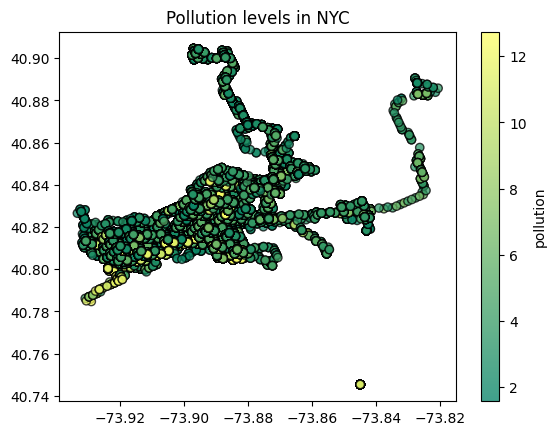

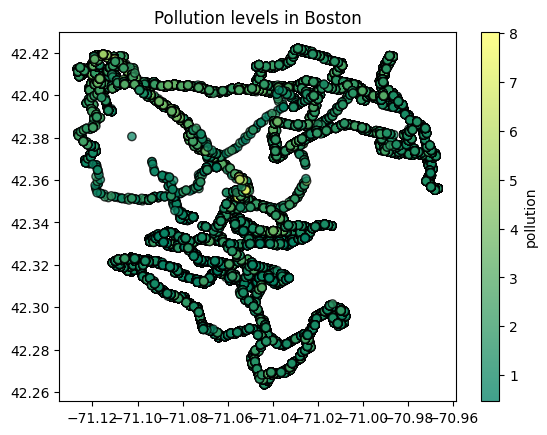

In [ ]:
areas = h3_dataset['city'].unique()
groups = []
for area in areas:
  groups.append(h3_dataset[h3_dataset['city'] == area])
index = 0
for area in areas:
  scatter_plot = plt.scatter(groups[index]['longitude'], groups[index]['latitude'], c=groups[index]['pollution'], cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)
  colorbar = plt.colorbar(scatter_plot, label='pollution')
  plt.title("Pollution levels in " + str(area))
  plt.show()
  index += 1

# Feature selection

```TODO```
- develop a method to select features, is there an association between pollution (pm25) and the location expressed as geohash (or on a coarser level any other administrative polygon such as neighborhood)?!
so, imagine, you have a categorical variable (geohash) and a numerical response (pm25), which method you can choose for feature selection.
  > read the following article:
  [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/). Of a specific interest in this case is the ```Categorical Input, Numerical Output``` combination, in which it is recommended to use the same “Numerical Input, Categorical Output” methods <font color='red'> but in reverse </font>

for all methods below, try neighborhood, city, geohash with different precision to check wether there is an association between any of them and the respone (pollution pm)


In [ ]:
geohash_dataset = PM_data
h3_dataset = PM_data

In [ ]:
# Calculate maximum and minimum pollution values
max_pollution = geohash_dataset['pollution'].max()
min_pollution = geohash_dataset['pollution'].min()

print(f"Maximum pollution value geohash: {max_pollution}")
print(f"Minimum pollution value geohash: {min_pollution}")


# Calculate maximum and minimum pollution values
#max_pollution = h3_dataset['pollution'].max()
#min_pollution = h3_dataset['pollution'].min()

#print(f"Maximum pollution value H3: {max_pollution}")
#print(f"Minimum pollution value H3: {min_pollution}")

Maximum pollution value geohash: 12.74441924
Minimum pollution value geohash: 0.464346333


In [ ]:
NUMERICAL_FEATURES = ['latitude', 'longitude', 'temperature', 'humidity']

In [ ]:
import pandas as pd
from scipy.stats import rankdata
'''
if you specifically want a measure similar to Kendall's correlation coefficient but for a
categorical predictor and a continuous outcome, you might consider calculating the correlation between the ranks of the categorical
variable and the continuous variable
'''

# Rank the pollution values
geohash_dataset['pollution_rank'] = rankdata(geohash_dataset['pollution'])

# Calculate the average rank for each category
avg_rank_per_category = geohash_dataset.groupby('geohash')['pollution_rank'].mean()

# Calculate the correlation between the ranks of geohash and pollution
correlation = avg_rank_per_category.corr(geohash_dataset.groupby('geohash').size(), method='kendall')

print(f"Reverse Kendall's correlation coefficient geohash: {correlation}")

# Rank the pollution values
h3_dataset['pollution_rank'] = rankdata(h3_dataset['pollution'])

# Calculate the average rank for each category
avg_rank_per_category = h3_dataset.groupby('H3')['pollution_rank'].mean()

# Calculate the correlation between the ranks of geohash and pollution
correlation = avg_rank_per_category.corr(h3_dataset.groupby('H3').size(), method='kendall')

print(f"Reverse Kendall's correlation coefficient H3: {correlation}")


KeyError: 'geohash'

In [ ]:
#METHOD 2: Spearman's Rank Correlation Coefficient
import pandas as pd
from scipy.stats import spearmanr

for feature in NUMERICAL_FEATURES:
  h3_correlation, h3_p_value = spearmanr(h3_dataset[feature], h3_dataset['pollution'])
  geohash_correlation, geohash_p_value = spearmanr(geohash_dataset[feature], geohash_dataset['pollution'])
  print(f"Spearman's correlation coefficient H3 between {feature} and pollution: {h3_correlation}")
  print(f"P-value H3: {h3_p_value}")
  print(f"Spearman's correlation coefficient geohash between {feature} and pollution: {geohash_correlation}")
  print(f"P-value geohash: {geohash_p_value}")

Spearman's correlation coefficient H3 between latitude and pollution: -0.6603704844548152
P-value H3: 0.0
Spearman's correlation coefficient geohash between latitude and pollution: -0.6603704844548152
P-value geohash: 0.0
Spearman's correlation coefficient H3 between longitude and pollution: -0.659735279674802
P-value H3: 0.0
Spearman's correlation coefficient geohash between longitude and pollution: -0.659735279674802
P-value geohash: 0.0
Spearman's correlation coefficient H3 between temperature and pollution: 0.540687885605112
P-value H3: 0.0
Spearman's correlation coefficient geohash between temperature and pollution: 0.540687885605112
P-value geohash: 0.0
Spearman's correlation coefficient H3 between humidity and pollution: 0.39743891728466424
P-value H3: 0.0
Spearman's correlation coefficient geohash between humidity and pollution: 0.39743891728466424
P-value geohash: 0.0


In [ ]:
#METHOD 3: ANOVA (Analysis of Variance)
'''
ANOVA can be used to assess whether the means of pollution levels differ significantly across different geohash categories.
ANOVA compares the means of three or more groups to determine if there are statistically significant differences between them
perform ANOVA in Python using the f_oneway function from the scipy.stats module
This code calculates the F-statistic and p-value for the ANOVA test, where:
The F-statistic measures the ratio of the variance between groups to the variance within groups.
The p-value indicates the probability of obtaining the observed results (or more extreme results) if the null hypothesis is true.
If the p-value is less than a chosen significance level (e.g., 0.05), you can reject the null hypothesis and conclude that there are statistically
significant differences in pollution levels across different geohash categories. Otherwise, you fail to reject the null hypothesis, suggesting no significant differences in pollution levels between the groups.

'''

from scipy.stats import f_oneway

# Assuming you already have merged_data DataFrame

# Extract pollution levels for each geohash category
#try neighborhood, city, geohash with different precision

geohash_groups = [h3_dataset[h3_dataset['H3'] == category]['pollution'] for category in h3_dataset['H3'].unique()]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*geohash_groups)

print(f"F-statistic H3: {f_statistic}")
print(f"P-value H3: {p_value}")


geohash_groups = [geohash_dataset[geohash_dataset['geohash'] == category]['pollution'] for category in geohash_dataset['geohash'].unique()]

f_statistic, p_value = f_oneway(*geohash_groups)

print(f"F-statistic geohash: {f_statistic}")
print(f"P-value geohash: {p_value}")


F-statistic H3: 87.1134651994333
P-value H3: 0.0
F-statistic geohash: 89.15416869027437
P-value geohash: 0.0


In [ ]:
# METHOD 4:
from scipy.stats import kruskal
'''
Kruskal-Wallis test
Kruskal-Wallis Test: This is a non-parametric alternative to ANOVA, suitable when the assumptions of ANOVA are not met.
'''

# Extract pollution levels for each geohash category
geohash_groups = [h3_dataset[h3_dataset['H3'] == category]['pollution'] for category in h3_dataset['H3'].unique()]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*geohash_groups)

print(f"Kruskal-Wallis statistic H3: {statistic}")
print(f"P-value H3: {p_value}")

geohash_groups = [geohash_dataset[geohash_dataset['geohash'] == category]['pollution'] for category in geohash_dataset['geohash'].unique()]

statistic, p_value = kruskal(*geohash_groups)

print(f"Kruskal-Wallis statistic geohash: {statistic}")
print(f"P-value geohash: {p_value}")


Kruskal-Wallis statistic H3: 151108.73931093668
P-value H3: 0.0
Kruskal-Wallis statistic geohash: 150103.34948027795
P-value geohash: 0.0


In [ ]:
# METHOD 5: Kendall's Tau Correlation Coefficient
'''
Kendall's Tau Correlation Coefficient: This measures the strength and direction of association between the ranks of 'geohash' and 'pollution',
suitable for ordinal data or when the relationship is not necessarily linear.
Kendall's Tau is a rank-based correlation coefficient that measures the ordinal association between two variables.

This code calculates Kendall's Tau correlation coefficient and the associated p-value. The correlation coefficient ranges from -1 to 1, where:

1 indicates a perfect positive association.
-1 indicates a perfect negative association.
0 indicates no association.
The p-value indicates the significance of the correlation coefficient.
If the p-value is less than a chosen significance level (e.g., 0.05),
you can reject the null hypothesis and conclude that there is a statistically
significant association between 'geohash' and 'pollution'. Otherwise, you fail to reject the null hypothesis, suggesting no significant association.
'''
from scipy.stats import kendalltau

# Calculate Kendall's Tau correlation coefficient
correlation, p_value = kendalltau(h3_dataset['H3'], h3_dataset['pollution'])

print(f"Kendall's correlation coefficient H3: {correlation}")
print(f"P-value H3: {p_value}")

correlation, p_value = kendalltau(geohash_dataset['geohash'], geohash_dataset['pollution'])

print(f"Kendall's correlation coefficient geohash: {correlation}")
print(f"P-value geohash: {p_value}")


Kendall's correlation coefficient H3: -0.42229227708920314
P-value H3: 0.0
Kendall's correlation coefficient geohash: -0.43804195704184906
P-value geohash: 0.0


# End feature selection

In [ ]:
geohash_dataset = geohash_dataset.rename(columns={'geohash': 'hash_reference'})

In [ ]:
geohash_dataset.drop(columns=['geometry'], inplace=True)

KeyError: "['geometry'] not found in axis"

In [ ]:
geohash_dataset.head()

time  latitude  longitude  temperature   humidity  pollution  \
0  1.635519e+09     40.71     -73.93    13.700000  64.000000   3.187280   
1  1.635516e+09     40.74     -73.90    14.000000  59.300000   3.084182   
2  1.632324e+09     40.74     -73.85    28.988809  66.492058  10.620296   
3  1.632321e+09     40.75     -73.85    29.600000  60.250000  10.875361   
4  1.635515e+09     40.78     -73.93    13.600000  65.300000   3.084182   

  hash_reference  
0        dr5rte6  
1        dr5ry2s  
2        dr5rz97  
3        dr5rz9e  
4        dr72j8q

In [ ]:
from sklearn.preprocessing import LabelEncoder

geohash_dataset['hash_reference'] = LabelEncoder().fit_transform(geohash_dataset['hash_reference'])
#geohash_dataset['city'] = LabelEncoder().fit_transform(geohash_dataset['city'])
#h3_dataset['hash_reference'] = LabelEncoder().fit_transform(h3_dataset['hash_reference'])

In [ ]:
geohash_dataset.index = geohash_dataset['time']
#h3_dataset.index = h3_dataset['time']

In [ ]:
geohash_dataset = geohash_dataset.sort_index()
#h3_dataset = h3_dataset.sort_index()

In [ ]:
geohash_dataset.head()

time  latitude  longitude  temperature   humidity  \
time                                                                      
1.631278e+09  1.631278e+09     40.86     -73.87    19.700000  66.200000   
1.631278e+09  1.631278e+09     40.84     -73.87    23.400000  55.900000   
1.631278e+09  1.631278e+09     40.84     -73.87    22.166667  59.066667   
1.631279e+09  1.631279e+09     40.84     -73.88    21.600000  60.587500   
1.631279e+09  1.631279e+09     40.84     -73.88    21.500000  60.850000   

              pollution  hash_reference  
time                                     
1.631278e+09   5.218004            1021  
1.631278e+09   4.018027             950  
1.631278e+09   4.018027             932  
1.631279e+09   4.151175             834  
1.631279e+09   4.058762             833

In [ ]:
h3_dataset.head()

time   latitude  \
time                                                                     
2021-09-10 12:29:14.000000000 2021-09-10 12:29:14.000000000  40.847692   
2021-09-10 12:29:19.000000000 2021-09-10 12:29:19.000000000  40.847707   
2021-09-10 12:30:19.500000000 2021-09-10 12:30:19.500000000  40.847667   
2021-09-10 12:32:44.500000000 2021-09-10 12:32:44.500000000  40.847690   
2021-09-10 12:32:45.533333248 2021-09-10 12:32:45.533333248  40.847682   

                               longitude  temperature   humidity  pollution  \
time                                                                          
2021-09-10 12:29:14.000000000 -73.869302        23.40  53.500000   4.671425   
2021-09-10 12:29:19.000000000 -73.869315        23.30  53.200000   5.406576   
2021-09-10 12:30:19.500000000 -73.869382        24.10  56.716667   4.538420   
2021-09-10 12:32:44.500000000 -73.869401        23.40  59.000000   6.019937   
2021-09-10 12:32:45.533333248 -73.869395        23.52  58.006667   4.982989   

                               hash_reference  
time                                           
2021-09-10 12:29:14.000000000            1675  
2021-09-10 12:29:19.000000000            1683  
2021-09-10 12:30:19.500000000            1702  
2021-09-10 12:32:44.500000000            1708  
2021-09-10 12:32:45.533333248            1709

In [ ]:
#h3_dataset['time'] = h3_dataset['time'].apply(lambda x: x.timestamp())
geohash_dataset['time'] = geohash_dataset['time'].apply(lambda x: x.timestamp())

AttributeError: 'float' object has no attribute 'timestamp'

In [ ]:
import numpy as np

# Convert the DataFrame to a NumPy array
geohash_values_df = geohash_dataset[['time', 'latitude', 'longitude', 'temperature', 'humidity', 'hash_reference' , 'pollution']]
#h3_values_df = h3_dataset[['time', 'latitude', 'longitude', 'temperature', 'humidity', 'hash_reference' , 'pollution']]

In [ ]:
geohash_values_df.head()

time  latitude  longitude  temperature   humidity  \
time                                                                      
1.631278e+09  1.631278e+09     40.86     -73.87    19.700000  66.200000   
1.631278e+09  1.631278e+09     40.84     -73.87    23.400000  55.900000   
1.631278e+09  1.631278e+09     40.84     -73.87    22.166667  59.066667   
1.631279e+09  1.631279e+09     40.84     -73.88    21.600000  60.587500   
1.631279e+09  1.631279e+09     40.84     -73.88    21.500000  60.850000   

              hash_reference  pollution  
time                                     
1.631278e+09            1021   5.218004  
1.631278e+09             950   4.018027  
1.631278e+09             932   4.018027  
1.631279e+09             834   4.151175  
1.631279e+09             833   4.058762

In [ ]:
h3_values_df.head()

time   latitude  longitude  \
time                                                                
2021-09-10 12:29:14.000000000  1.631277e+09  40.847692 -73.869302   
2021-09-10 12:29:19.000000000  1.631277e+09  40.847707 -73.869315   
2021-09-10 12:30:19.500000000  1.631277e+09  40.847667 -73.869382   
2021-09-10 12:32:44.500000000  1.631277e+09  40.847690 -73.869401   
2021-09-10 12:32:45.533333248  1.631277e+09  40.847682 -73.869395   

                               temperature   humidity  hash_reference  \
time                                                                    
2021-09-10 12:29:14.000000000        23.40  53.500000            1675   
2021-09-10 12:29:19.000000000        23.30  53.200000            1683   
2021-09-10 12:30:19.500000000        24.10  56.716667            1702   
2021-09-10 12:32:44.500000000        23.40  59.000000            1708   
2021-09-10 12:32:45.533333248        23.52  58.006667            1709   

                               pollution  
time                                      
2021-09-10 12:29:14.000000000   4.671425  
2021-09-10 12:29:19.000000000   5.406576  
2021-09-10 12:30:19.500000000   4.538420  
2021-09-10 12:32:44.500000000   6.019937  
2021-09-10 12:32:45.533333248   4.982989

In [ ]:
#h3_values_df.to_csv('h3_values.csv', index=False)
geohash_values_df.to_csv('geohash_values.csv', index=False)

In [ ]:
geohash_values = geohash_values_df.to_numpy()
#h3_values = h3_values_df.to_numpy()

In [ ]:
from pandas import read_csv
from matplotlib import pyplot

def plot_features(algorithm):
  values, values_df = (h3_values, h3_values_df) if algorithm == 'H3' else (geohash_values, geohash_values_df)
  # specify columns to plot
  groups=[0,1,2,3,4,5,6]
  #we are using matplotlib
  i = 1
  # plot each column
  pyplot.figure()
  for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(values_df.columns[group], y=0.5, loc='right')
    i += 1
  pyplot.show()

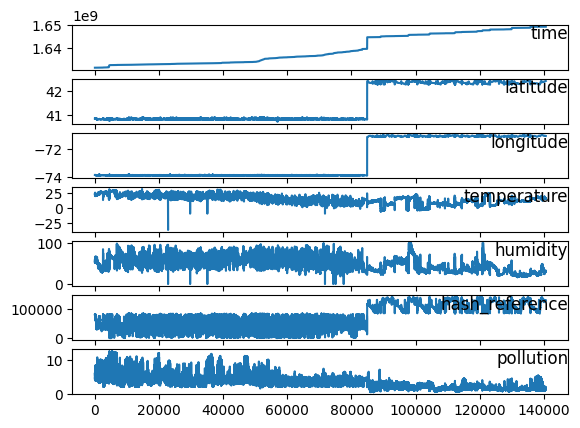

In [ ]:
plot_features('H3')

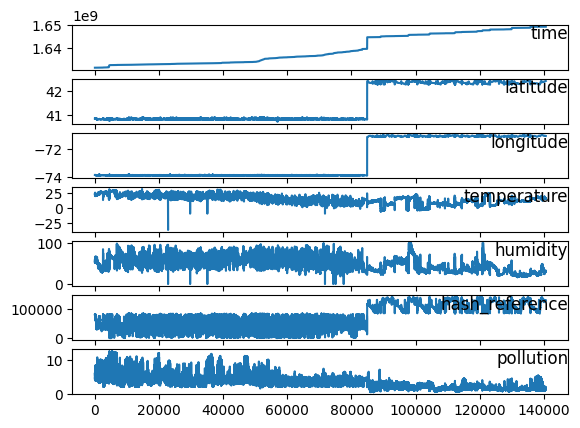

In [ ]:
plot_features('geohash')

<font color = 'blue'> from the correlation matrix, looks like the ```temperature``` is the variable that has the highest correlation with the reponse varaible ```pollution```, at the par with 0.49, other variables are less significant</font>
- having said that, drop some of the predictors (input variables)and test the performance of your algorithms again! does the performance improves in terms of accuracy, and running time!

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(algorithm):

  values_df = h3_values_df if algorithm == 'H3' else geohash_values_df
  # Calculate the correlation matrix
  correlation_matrix = values_df.corr()
  # Set up the matplotlib figure
  plt.figure(figsize=(10, 8))
  # Draw the heatmap
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  # Add title
  plt.title('Correlation Matrix')
  # Show plot
  plt.show()

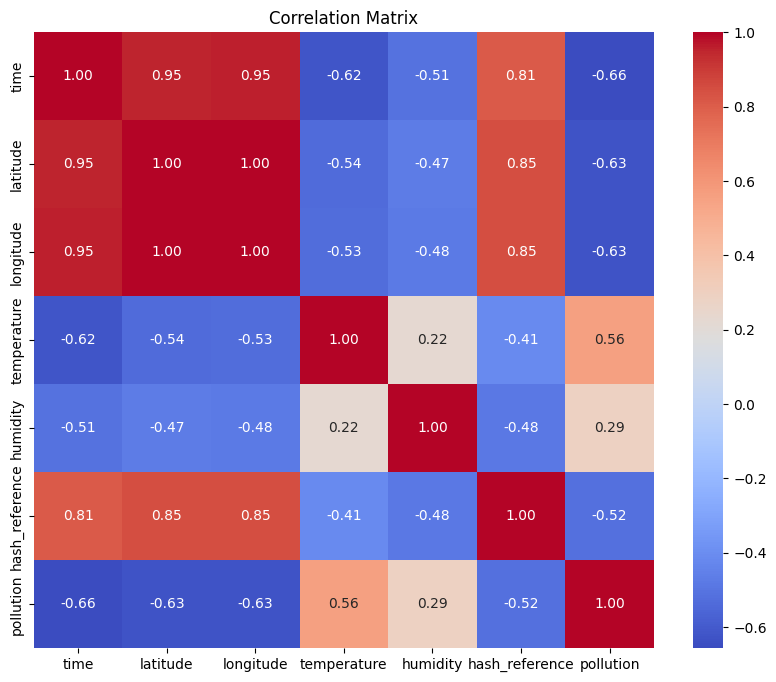

In [ ]:
plot_correlation_matrix('H3')

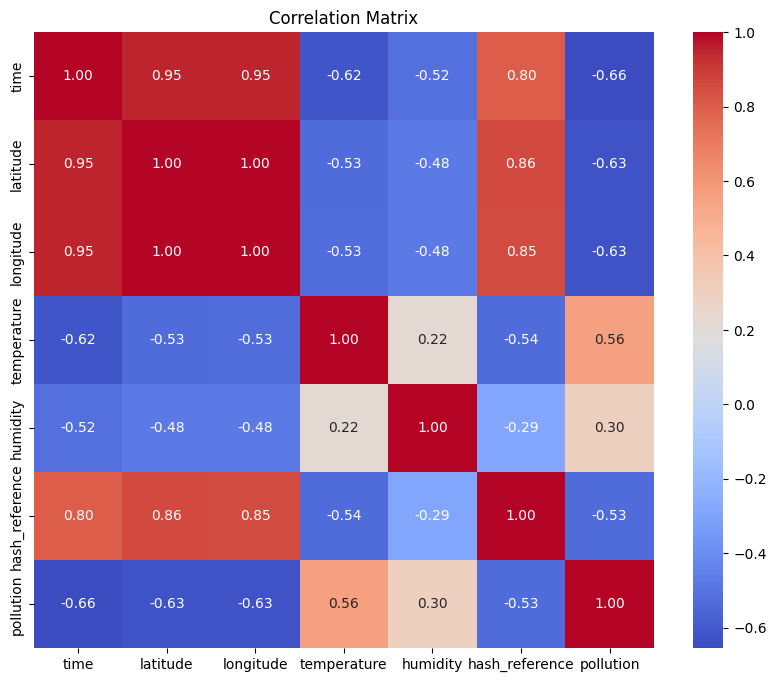

In [ ]:
plot_correlation_matrix('geohash')

# Preparing Data for training

In [ ]:
from pandas import DataFrame
from pandas import read_csv
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]

        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]


    agg = concat(cols, axis=1)
    agg.columns = names
    if dropnan:
          agg.dropna(inplace=True)
    return agg

In [ ]:
print(geohash_values.shape, h3_values.shape)

NameError: name 'h3_values' is not defined

In [ ]:
geohash_values = geohash_values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
geohash_scaled = scaler.fit_transform(geohash_values)
geohash_reframed = series_to_supervised(geohash_scaled, 1, 1)

#h3_values = h3_values.astype('float32')
#h3_scaled = scaler.fit_transform(h3_values)
#h3_reframed = series_to_supervised(h3_scaled, 1, 1)

In [ ]:
geohash_reframed.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.000000   0.087721   0.020269   0.699947   0.582200   0.363345   
2   0.000008   0.076025   0.020269   0.812088   0.454883   0.338078   
3   0.000023   0.076025   0.020269   0.774707   0.494026   0.331673   
4   0.000038   0.076025   0.016893   0.757533   0.512825   0.296797   
5   0.000046   0.076025   0.016893   0.754502   0.516069   0.296441   

   var7(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  \
1   0.390854  0.000008  0.076025  0.020269  0.812088  0.454883  0.338078   
2   0.287902  0.000023  0.076025  0.020269  0.774707  0.494026  0.331673   
3   0.287902  0.000038  0.076025  0.016893  0.757533  0.512825  0.296797   
4   0.299325  0.000046  0.076025  0.016893  0.754502  0.516069  0.296441   
5   0.291397  0.000053  0.076025  0.013514  0.739348  0.538937  0.290036   

    var7(t)  
1  0.287902  
2  0.287902  
3  0.299325  
4  0.291397  
5  0.287962

In [ ]:
h3_reframed.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.000000   0.079529   0.021826   0.886931   0.535000   0.012750   
2   0.000000   0.079538   0.021820   0.885463   0.532000   0.012811   
3   0.000008   0.079515   0.021797   0.897210   0.567167   0.012955   
4   0.000015   0.079529   0.021791   0.886931   0.590000   0.013001   
5   0.000015   0.079525   0.021793   0.888693   0.580067   0.013009   

   var7(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  \
1   0.342764  0.000000  0.079538  0.021820  0.885463  0.532000  0.012811   
2   0.402723  0.000008  0.079515  0.021797  0.897210  0.567167  0.012955   
3   0.331916  0.000015  0.079529  0.021791  0.886931  0.590000  0.013001   
4   0.452749  0.000015  0.079525  0.021793  0.888693  0.580067  0.013009   
5   0.368175  0.000015  0.079538  0.021818  0.859832  0.580864  0.012780   

    var7(t)  
1  0.402723  
2  0.331916  
3  0.452749  
4  0.368175  
5  0.395853

In [ ]:
new_df_reframed.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1        0.0   0.079521   0.021828   0.880752      0.538   0.342594  0.000000   
2        0.0   0.079496   0.021799   0.895334      0.571   0.313506  0.000000   
3        0.0   0.079527   0.021826   0.880752      0.535   0.342594  0.000000   
4        0.0   0.079510   0.021797   0.895334      0.570   0.470574  0.000000   
5        0.0   0.079514   0.021793   0.892903      0.567   0.392069  0.000008   

    var2(t)   var3(t)   var4(t)  var5(t)   var6(t)  
1  0.079496  0.021799  0.895334   0.5710  0.313506  
2  0.079527  0.021826  0.880752   0.5350  0.342594  
3  0.079510  0.021797  0.895334   0.5700  0.470574  
4  0.079514  0.021793  0.892903   0.5670  0.392069  
5  0.079510  0.021793  0.891688   0.5625  0.334868

In [ ]:
new_df_reframed.drop(new_df_reframed.columns[[6,7,8,9,10,11]], axis=1, inplace=True)
print(new_df_reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)
1        0.0   0.079521   0.021828   0.880752      0.538   0.342594
2        0.0   0.079496   0.021799   0.895334      0.571   0.313506
3        0.0   0.079527   0.021826   0.880752      0.535   0.342594
4        0.0   0.079510   0.021797   0.895334      0.570   0.470574
5        0.0   0.079514   0.021793   0.892903      0.567   0.392069


In [ ]:
new_df.head()

time   latitude  longitude  temperature  humidity  \
time                                                                      
1.631277e+09  1.631277e+09  40.847679 -73.869293    23.400000      53.8   
1.631277e+09  1.631277e+09  40.847637 -73.869377    24.400000      57.1   
1.631277e+09  1.631277e+09  40.847691 -73.869301    23.400000      53.5   
1.631277e+09  1.631277e+09  40.847660 -73.869385    24.400000      57.0   
1.631277e+09  1.631277e+09  40.847668 -73.869392    24.233333      56.7   

              pollution  
time                     
1.631277e+09   4.671425  
1.631277e+09   4.314229  
1.631277e+09   4.671425  
1.631277e+09   6.243026  
1.631277e+09   5.278982

In [ ]:
geohash_dataset.head()

time   latitude  longitude  temperature  \
time                                                                   
2021-09-10 12:29:09  1.631277e+09  40.847679 -73.869293         23.4   
2021-09-10 12:29:12  1.631277e+09  40.847637 -73.869377         24.4   
2021-09-10 12:29:14  1.631277e+09  40.847691 -73.869301         23.4   
2021-09-10 12:29:17  1.631277e+09  40.847660 -73.869385         24.4   
2021-09-10 12:29:19  1.631277e+09  40.847710 -73.869316         23.3   

                     humidity  pollution  city  hash_reference  
time                                                            
2021-09-10 12:29:09      53.8   4.671425     1           79718  
2021-09-10 12:29:12      57.1   4.314229     1           79095  
2021-09-10 12:29:14      53.5   4.671425     1           79771  
2021-09-10 12:29:17      57.0   6.243026     1           79112  
2021-09-10 12:29:19      53.2   5.406576     1           79773

In [ ]:
geohash_reframed.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  var7(t-1)
1        0.0   0.079521   0.021828   0.870317      0.538   0.566980   0.342594
2        0.0   0.079496   0.021799   0.884726      0.571   0.562549   0.313506
3        0.0   0.079527   0.021826   0.870317      0.535   0.567357   0.342594
4        0.0   0.079510   0.021797   0.884726      0.570   0.562670   0.470574
5        0.0   0.079538   0.021820   0.868876      0.532   0.567371   0.402459

In [ ]:
geohash_reframed.drop(geohash_reframed.columns[[7,8,9,10,11,12]], axis=1, inplace=True)
print(geohash_reframed.head())

#h3_reframed.drop(h3_reframed.columns[[7,8,9,10,11,12,13]], axis=1, inplace=True)
#print(h3_reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.000000   0.087721   0.020269   0.699947   0.582200   0.363345   
2   0.000008   0.076025   0.020269   0.812088   0.454883   0.338078   
3   0.000023   0.076025   0.020269   0.774707   0.494026   0.331673   
4   0.000038   0.076025   0.016893   0.757533   0.512825   0.296797   
5   0.000046   0.076025   0.016893   0.754502   0.516069   0.296441   

   var7(t-1)   var7(t)  
1   0.390854  0.287902  
2   0.287902  0.287902  
3   0.287902  0.299325  
4   0.299325  0.291397  
5   0.291397  0.287962  


In [ ]:
DAYS = 365
HOURS = 24
YEARS = 0.25

geohash_values = geohash_reframed.values
#h3_values = h3_reframed.values
#print(geohash_values.shape, h3_values.shape)
n_train_hours = int((DAYS * YEARS) * HOURS)
#We are preparing the train data from the first year
#[rows,columns] ==> rows~~[start:end:step] rows of first year, all columns
# but how do you know that the first n_train_hours rows in  your original dataset represents a year, it is sorted
train_geohash = geohash_values[:n_train_hours, :]
#train_h3 = h3_values[:n_train_hours, :]

In [ ]:

#we set the rest of information as a test
test_geohash = geohash_values[n_train_hours:, :]
#test_h3 = h3_values[n_train_hours:, :]

train_X_geohash, train_y_geohash = train_geohash[:, :-1], train_geohash[:, -1]
test_X_geohash, test_y_geohash = test_geohash[:, :-1], test_geohash[:, -1]

#train_X_h3, train_y_h3 = train_h3[:], train_h3[:, -1]
#test_X_h3, test_y_h3 = test_h3[:], test_h3[:, -1]

train_X_geohash = train_X_geohash.reshape((train_X_geohash.shape[0], 1, train_X_geohash.shape[1]))
test_X_geohash = test_X_geohash.reshape((test_X_geohash.shape[0], 1, test_X_geohash.shape[1]))

#train_X_h3 = train_X_h3.reshape((train_X_h3.shape[0], 1, train_X_h3.shape[1]))
#test_X_h3 = test_X_h3.reshape((test_X_h3.shape[0], 1, test_X_h3.shape[1]))

print("Shape of geohash dataset split:")
print(train_X_geohash.shape, train_y_geohash.shape, test_X_geohash.shape, test_y_geohash.shape)

#print("Shape of h3 dataset split:")
#print(train_X_h3.shape, train_y_h3.shape, test_X_h3.shape, test_y_h3.shape)

Shape of geohash dataset split:
(2190, 1, 7) (2190,) (619, 1, 7) (619,)


In [ ]:
print("Train/Test split geohash")
print(test_X_geohash.shape[0] / train_X_geohash.shape[0])
print(1 - (test_X_geohash.shape[0] / train_X_geohash.shape[0]))

#print("Train/Test split H3")
#print(test_X_h3.shape[0] / train_X_h3.shape[0])
#print(1 - (test_X_h3.shape[0] / train_X_h3.shape[0]))

Train/Test split geohash
0.28264840182648404
0.7173515981735159


# Training and testing

In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import Dropout
from keras.layers import AvgPool1D
from keras.layers import GRU
from keras import regularizers

Epoch 1/100
31/31 - 4s - 121ms/step - loss: 0.1738 - val_loss: 0.0834
Epoch 2/100
31/31 - 0s - 14ms/step - loss: 0.1173 - val_loss: 0.0396
Epoch 3/100
31/31 - 0s - 14ms/step - loss: 0.0754 - val_loss: 0.0349
Epoch 4/100
31/31 - 0s - 7ms/step - loss: 0.0635 - val_loss: 0.0372
Epoch 5/100
31/31 - 0s - 9ms/step - loss: 0.0597 - val_loss: 0.0342
Epoch 6/100
31/31 - 0s - 10ms/step - loss: 0.0575 - val_loss: 0.0326
Epoch 7/100
31/31 - 0s - 10ms/step - loss: 0.0561 - val_loss: 0.0315
Epoch 8/100
31/31 - 0s - 6ms/step - loss: 0.0552 - val_loss: 0.0309
Epoch 9/100
31/31 - 0s - 6ms/step - loss: 0.0544 - val_loss: 0.0302
Epoch 10/100
31/31 - 0s - 9ms/step - loss: 0.0539 - val_loss: 0.0299
Epoch 11/100
31/31 - 0s - 9ms/step - loss: 0.0534 - val_loss: 0.0292
Epoch 12/100
31/31 - 0s - 11ms/step - loss: 0.0530 - val_loss: 0.0288
Epoch 13/100
31/31 - 0s - 9ms/step - loss: 0.0526 - val_loss: 0.0289
Epoch 14/100
31/31 - 0s - 9ms/step - loss: 0.0522 - val_loss: 0.0286
Epoch 15/100
31/31 - 0s - 4ms/step -

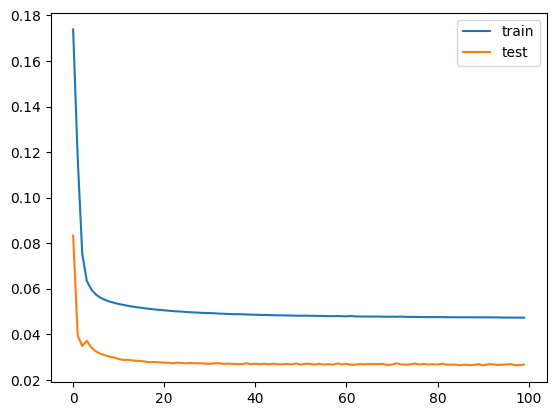

In [ ]:
# design network
model = Sequential()
model.add(LSTM(1, input_shape=(train_X_geohash.shape[1], train_X_geohash.shape[2])))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X_geohash , train_y_geohash, epochs=50, validation_data=(test_X_geohash, test_y_geohash), batch_size=72, verbose=2, shuffle=True)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Predict using the LSTM model
lstm_yhat = model.predict(test_X_geohash)

# Reshape and inverse transform the predictions to original scale
test_X1 = test_X_geohash.reshape((test_X_geohash.shape[0], test_X_geohash.shape[2]))
lstm_inv_yhat = concatenate((test_X1[:, 1:], lstm_yhat), axis=1)
lstm_inv_yhat = scaler.inverse_transform(lstm_inv_yhat)[:, -1]

# Inverse transform the actual values to original scale
test_y1 = test_y_geohash.reshape((len(test_y_geohash), 1))
lstm_inv_y1 = concatenate((test_X1[:, 1:], test_y1), axis=1)
lstm_inv_y1 = scaler.inverse_transform(lstm_inv_y1)[:, -1]

# Calculate evaluation metrics
mae_LSTM_geohash = mean_absolute_error(lstm_inv_y1, lstm_inv_yhat)
mse_LSTM_geohash = mean_squared_error(lstm_inv_y1, lstm_inv_yhat)
rmse_LSTM_geohash = sqrt(mse_LSTM_geohash)
mape_LSTM_geohash = np.mean(np.abs((lstm_inv_y1 - lstm_inv_yhat) / lstm_inv_y1)) * 100
r2_LSTM_geohash = r2_score(lstm_inv_y1, lstm_inv_yhat)

# Initialize counters for direction comparisons
total_correct_predictions_LSTM_geohash = 0
K = np.zeros(len(lstm_inv_yhat))
K1 = np.zeros(len(lstm_inv_y1))

# Calculate direction arrays
for i in range(1, len(lstm_inv_yhat)):
    if lstm_inv_yhat[i] > lstm_inv_yhat[i-1]:
        K[i] = 1
    elif lstm_inv_yhat[i] < lstm_inv_yhat[i-1]:
        K[i] = -1  # Use -1 for decrease
    else:
        K[i] = 0  # Use 0 for no change

    if lstm_inv_y1[i] > lstm_inv_y1[i-1]:
        K1[i] = 1
    elif lstm_inv_y1[i] < lstm_inv_y1[i-1]:
        K1[i] = -1  # Use -1 for decrease
    else:
        K1[i] = 0  # Use 0 for no change

# Count correct predictions
for i in range(1, len(lstm_inv_yhat)):
    if K[i] == K1[i]:
        total_correct_predictions_LSTM_geohash += 1

# Calculate accuracy and error rate
num_total_samples = len(lstm_inv_y1)
accuracy_LSTM_geohash = total_correct_predictions_LSTM_geohash / (num_total_samples - 1)  # Exclude the first element for valid comparison
error_rate_LSTM_geohash = 1 - accuracy_LSTM_geohash

# Print the results
print(f'MAE: {mae_LSTM_geohash :.5f}')
print(f'MSE: {mse_LSTM_geohash :.5f}')
print(f'RMSE: {rmse_LSTM_geohash :.5f}')
print(f'MAPE: {mape_LSTM_geohash :.2f}')
print(f'R²: {r2_LSTM_geohash :.5f}')
print(f'Predict the correct number of days: {total_correct_predictions_LSTM_geohash} out of {len(test_y_geohash)}')
print(f'Accuracy: {accuracy_LSTM_geohash * 100:.2f}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
MAE: 0.02682
MSE: 0.00175
RMSE: 0.04181
MAPE: 57.51
R²: 0.02692
Predict the correct number of days: 266 out of 619
Accuracy: 43.04


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['Geohash dataset', 'H3 dataset']
y = [total_correct_predictions_LSTM_geohash, total_correct_predictions_LSTM_h3]

width = 0.2
colors = ['mediumvioletred','lightskyblue']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('The number of days', fontsize=16)
plt.xticks([1, 2], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Predict the correct number of days LSTM")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

NameError: name 'total_correct_predictions_LSTM_h3' is not defined

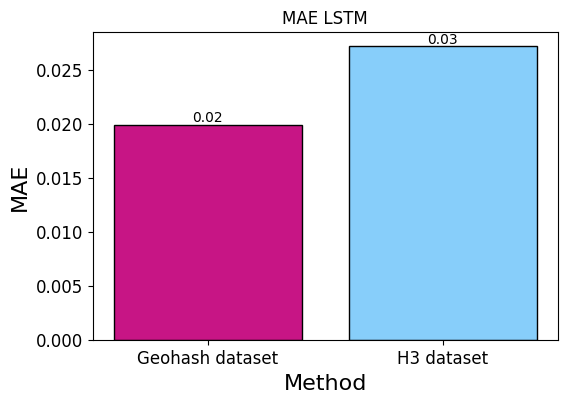

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['Geohash dataset', 'H3 dataset']
y = [mae_LSTM_geohash, mae_LSTM_h3]

width = 0.2
colors = ['mediumvioletred','lightskyblue']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('MAE', fontsize=16)
plt.xticks([1, 2], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("MAE LSTM")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

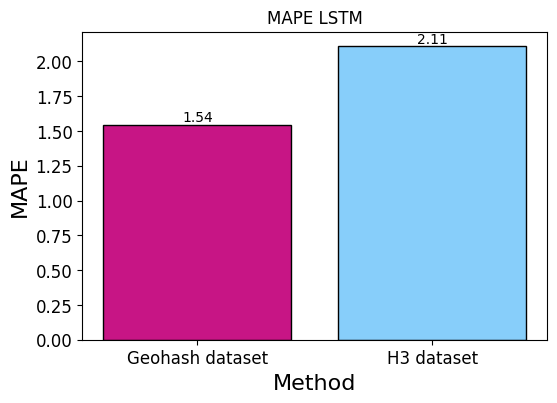

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['Geohash dataset', 'H3 dataset']
y = [mape_LSTM_geohash, mape_LSTM_h3]

width = 0.2
colors = ['mediumvioletred','lightskyblue']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('MAPE', fontsize=16)
plt.xticks([1, 2], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("MAPE LSTM")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

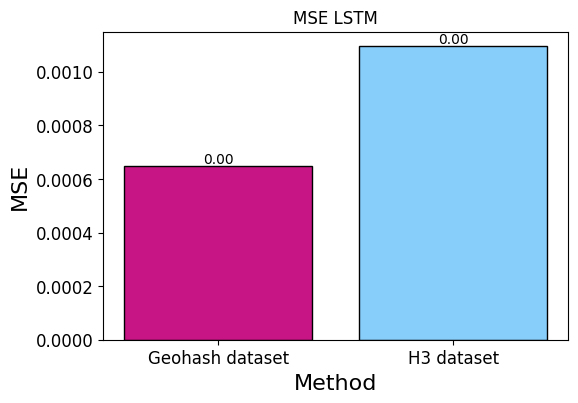

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['Geohash dataset', 'H3 dataset']
y = [mse_LSTM_geohash, mse_LSTM_h3]

width = 0.2
colors = ['mediumvioletred','lightskyblue']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.xticks([1, 2], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("MSE LSTM")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

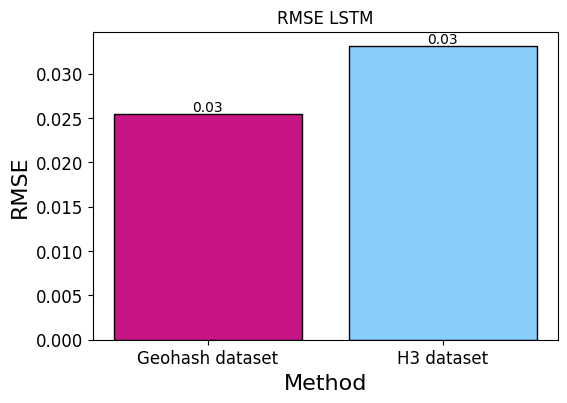

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['Geohash dataset', 'H3 dataset']
y = [rmse_LSTM_geohash, rmse_LSTM_h3]

width = 0.2
colors = ['mediumvioletred','lightskyblue']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('RMSE', fontsize=16)
plt.xticks([1, 2], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("RMSE LSTM")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

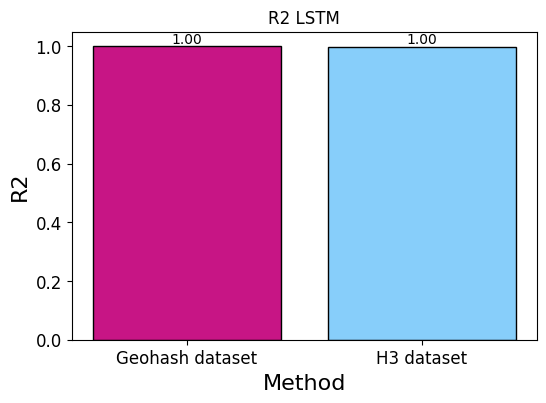

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['Geohash dataset', 'H3 dataset']
y = [r2_LSTM_geohash, r2_LSTM_h3]

width = 0.2
colors = ['mediumvioletred','lightskyblue']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('R2', fontsize=16)
plt.xticks([1, 2], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("R2 LSTM")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

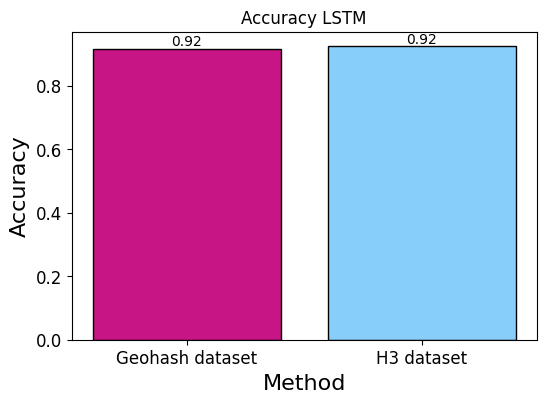

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['Geohash dataset', 'H3 dataset']
y = [accuracy_LSTM_geohash, accuracy_LSTM_h3]

width = 0.2
colors = ['mediumvioletred','lightskyblue']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks([1, 2], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Accuracy LSTM")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt

train_X = train_X_geohash
train_y = train_y_geohash
test_X = test_X_geohash
test_y = test_y_geohash

# Design and train SVR model
svr_model = SVR(kernel='rbf', C=100, gamma='auto')
svr_model.fit(train_X.reshape((train_X.shape[0], train_X.shape[2])), train_y)

# Make predictions
# Make predictions
yhat_svr = svr_model.predict(test_X.reshape((test_X.shape[0], test_X.shape[2])))

# Reshape test_X for inverse scaling
# Reshape test_X for inverse scaling
test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# Invert scaling for forecast
inv_yhat_svr = concatenate((yhat_svr.reshape((len(yhat_svr), 1)), test_X_reshaped[:, 1:]), axis=1)
#inv_yhat_svr = scaler.inverse_transform(inv_yhat_svr)
inv_yhat_svr = inv_yhat_svr[:,0]

# Invert scaling for actual
test_y_reshaped = test_y.reshape((len(test_y), 1))
inv_y_svr = concatenate((test_y_reshaped, test_X_reshaped[:, 1:]), axis=1)
inv_y_svr = inv_y_svr[:,0]

In [ ]:

rmse_svr = sqrt(mean_squared_error(inv_y_svr, inv_yhat_svr))

# Calculate mse
mse_SVR=mean_squared_error(inv_y_svr, inv_yhat_svr)

# Calculate mae
mae_SVR=mean_absolute_error(inv_y_svr, inv_yhat_svr)

# Calculate mape
mape_SVR = np.mean(np.abs((inv_y_svr - inv_yhat_svr) / inv_y_svr)) * 100

# Calculate R2
r2_svr = r2_score(inv_y_svr, inv_yhat_svr)

# Calculate the number of correct predictions
total_correct_predictions_SVR=0
num_correct_increasing_predictions = 0
num_correct_decreasing_predictions = 0

last_val = inv_yhat_svr[0]

for i in range(1, len(inv_yhat_svr)):
    if inv_yhat_svr[i] > last_val:
        if inv_y_svr[i] > last_val:
            num_correct_increasing_predictions += 1
    elif inv_yhat_svr[i] < last_val:
        if inv_y_svr[i] < last_val:
            num_correct_decreasing_predictions += 1
    last_val = inv_yhat_svr[i]

# Calculate Predict the correct number of days
total_correct_predictions_SVR= num_correct_increasing_predictions + num_correct_decreasing_predictions

# Calculate Accuracy
num_total_samples = len(inv_y_svr)
accuracy_SVR = total_correct_predictions_SVR  / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_SVR = 1 - accuracy_SVR

# Print the results
print(f'Test RMSE: {rmse_svr:.3f}')
print(f'Test MSE: {mse_SVR:.5f}')
print(f'Test MAE: {mae_SVR:.5f}')
print(f'MAPE: {mape_SVR:.3f}')
print(f'R²: {r2_svr:.5f}')
print(f'Predict the correct number of days: {total_correct_predictions_SVR} out of {len(test_y)}')
print(f'Accuracy: {accuracy_SVR * 100:.2f}')
print(f'error rate: {error_rate_SVR * 100:.2f}')


Test RMSE: 0.061
Test MSE: 0.00375
Test MAE: 0.05761
Maximum Prediction Error: 0.109
R²: 0.24049
Predict the correct number of days: 31077 out of 65006
Accuracy: 47.81
error rate: 52.19


In [ ]:
values = geohash_values

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
#train_X: we take all the rows for one year and all the column var1,var2,until var 8 except the last column which will
#be our output:pollution
#train_y takes all the rows for one year and only the column -1 which is the last column: pollution
train_X, train_y = train[:, :6], train[:, -1]
test_X, test_y = test[:, :6], test[:, -1]

In [ ]:
train_y.shape

(109500,)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(train_X, train_y)

In [ ]:
yhat = lr.predict(test_X)
# invert scaling for forecast

rmse = sqrt(mean_squared_error(yhat, test_y))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.082


In [ ]:
yhat_lr = yhat
yhat_lr = yhat_lr.reshape((len(yhat_lr), 1))

inv_yhat_lr = concatenate((yhat_lr, test_X), axis=1)
inv_yhat_lr = scaler.inverse_transform(inv_yhat_lr)
inv_yhat_lr = inv_yhat_lr[:,-1]

test_y = test_y.reshape((len(test_y), 1))
inv_y_lr = concatenate((test_y, test_X), axis=1)
inv_y_lr = scaler.inverse_transform(inv_y_lr)
inv_y_lr = inv_y_lr[:,-1]

In [ ]:
# Calculate rmse
rmse_lr = rmse

# Calculate mse
mse_lr = mean_squared_error(inv_y_lr, inv_yhat_lr)

# Calculate mae
mae_lr = mean_absolute_error(inv_y_lr, inv_yhat_lr)

# Calculate mape
mape_lr = np.mean(np.abs((inv_y_lr - inv_yhat_lr) / inv_y_lr)) * 100

# Calculate R2
r2_lr = r2_score(inv_y_svr, inv_yhat_svr)

# Calculate the number of correct predictions
total_correct_predictions_lr=0
num_correct_increasing_predictions = 0
num_correct_decreasing_predictions = 0

last_val = inv_yhat_lr[0]

for i in range(1, len(yhat)):
    if inv_yhat_lr[i] > last_val:
        if inv_y_lr[i] > last_val:
            num_correct_increasing_predictions += 1
    elif inv_yhat_lr[i] < last_val:
        if inv_y_lr[i] < last_val:
            num_correct_decreasing_predictions += 1
    last_val = inv_yhat_lr[i]

# Calculate Predict the correct number of days
total_correct_predictions_lr= num_correct_increasing_predictions + num_correct_decreasing_predictions

# Calculate Accuracy
num_total_samples = len(inv_y_lr)
accuracy_lr = total_correct_predictions_lr  / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_lr = 1 - accuracy_lr

# Print the results
print(f'Test RMSE: {rmse_lr:.3f}')
print(f'Test MSE: {mse_lr:.5f}')
print(f'Test MAE: {mae_lr:.5f}')
print(f'R²: {r2_lr:.5f}')
print(f'MAPE: {mape_lr:.3f}')
print(f'Predict the correct number of days: {total_correct_predictions_lr} out of {len(test_y)}')
print(f'Accuracy: {accuracy_lr * 100:.2f}')
print(f'error rate: {error_rate_lr * 100:.2f}')

Test RMSE: 0.082
Test MSE: 0.00000
Test MAE: 0.00000
R²: 0.24049
Maximum Prediction Error: 0.000
Predict the correct number of days: 30436 out of 65006
Accuracy: 46.82
error rate: 53.18


In [ ]:
from keras.layers import SimpleRNN

In [ ]:
values = geohash_values
n_train_hours = int((365 * 12.5) * 24)

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

train_X, train_y = train[:], train[:, -1]
test_X, test_y = test[:], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print("Shape of train_X:", train_X.shape)

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Shape of train_X: (109500, 1, 7)
(109500, 1, 7) (109500,) (183266, 1, 7) (183266,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1521/1521 - 10s - 7ms/step - loss: 0.0578 - val_loss: 0.4885
Epoch 2/50
1521/1521 - 5s - 3ms/step - loss: 0.0067 - val_loss: 0.4616
Epoch 3/50
1521/1521 - 12s - 8ms/step - loss: 0.0031 - val_loss: 0.3979
Epoch 4/50
1521/1521 - 7s - 5ms/step - loss: 0.0027 - val_loss: 0.3241
Epoch 5/50
1521/1521 - 7s - 5ms/step - loss: 0.0024 - val_loss: 0.2526
Epoch 6/50
1521/1521 - 5s - 3ms/step - loss: 0.0021 - val_loss: 0.1890
Epoch 7/50
1521/1521 - 8s - 6ms/step - loss: 0.0019 - val_loss: 0.1381
Epoch 8/50
1521/1521 - 7s - 5ms/step - loss: 0.0018 - val_loss: 0.0970
Epoch 9/50
1521/1521 - 8s - 5ms/step - loss: 0.0016 - val_loss: 0.0660
Epoch 10/50
1521/1521 - 9s - 6ms/step - loss: 0.0015 - val_loss: 0.0457
Epoch 11/50
1521/1521 - 8s - 5ms/step - loss: 0.0014 - val_loss: 0.0314
Epoch 12/50
1521/1521 - 6s - 4ms/step - loss: 0.0014 - val_loss: 0.0220
Epoch 13/50
1521/1521 - 12s - 8ms/step - loss: 0.0013 - val_loss: 0.0162
Epoch 14/50
1521/1521 - 8s - 5ms/step - loss: 0.0013 - val_loss: 0.011

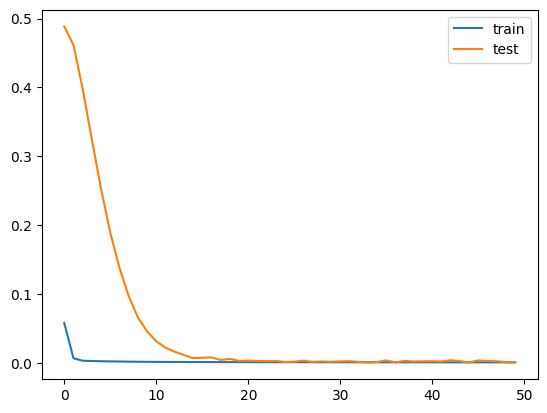

In [ ]:
model = Sequential()
model.add(SimpleRNN(1, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history =model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
rnn_yhat = model.predict(test_X)
test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))
rnn_inv_yhat = concatenate((test_X1[:, 1:], rnn_yhat), axis=1)
rnn_predicted_df = pd.DataFrame(scaler.inverse_transform(rnn_inv_yhat), columns=['time', 'latitude', 'longitude', 'temperature', 'humidity', 'geohash' , 'pollution'])
rnn_inv_yhat = rnn_inv_yhat[:,-1]

test_y1 = test_y.reshape((len(test_y), 1))
rnn_inv_y1 = concatenate((test_X1[:, 1:], test_y1), axis=1)
rnn_actual_df = pd.DataFrame(scaler.inverse_transform(rnn_inv_y1), columns=['time', 'latitude', 'longitude', 'temperature', 'humidity', 'geohash' , 'pollution'])
rnn_inv_y1 = rnn_inv_y1[:,-1]

# Calculate rmse
rmse_rnn = sqrt(mean_squared_error(rnn_inv_y1, rnn_inv_yhat))

# Calculate mse
mse_rnn=mean_squared_error(rnn_inv_y1, rnn_inv_yhat)

# Calculate mae
mae_rnn=mean_absolute_error(rnn_inv_y1, rnn_inv_yhat)

# Calculate Maximum Prediction Error
max_prediction_error_rnn = np.max(np.abs(rnn_inv_y1, rnn_inv_yhat))

# Calculate R2
r2_rnn = r2_score(rnn_inv_y1, rnn_inv_yhat)

# Calculate the number of correct predictions

total_correct_predictions_rnn=0
K=np.zeros(len(rnn_inv_yhat))
K1=np.zeros(len(rnn_inv_yhat))

for i in range(1, len(rnn_inv_yhat)):
    if rnn_inv_yhat[i] > rnn_inv_yhat[i-1]:
        K[i]=1
    if rnn_inv_yhat[i] < rnn_inv_yhat[i-1]:
        K[i]=0
    if rnn_inv_y1[i] > rnn_inv_y1[i-1]:
        K1[i]=1
    if rnn_inv_y1[i] < rnn_inv_y1[i-1]:
        K1[i]=0
for i in range(1, len(rnn_inv_yhat)):
    if K[i]==K1[i]:
        total_correct_predictions_rnn=total_correct_predictions_rnn+1



# Calculate Accuracy
num_total_samples = len(rnn_inv_y1)
accuracy_rnn = total_correct_predictions_rnn / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_rnn = 1 - accuracy_rnn

# Print the results
print(f'Test RMSE: {rmse_rnn:.3f}')
print(f'Test MSE: {mse_rnn:.5f}')
print(f'Test MAE: {mae_rnn:.5f}')
print(f'Maximum Prediction Error: {max_prediction_error_rnn:.3f}')
print(f'R²: {r2_rnn:.5f}')
print(f'Predict the correct number of days: {total_correct_predictions_rnn} out of {len(test_y)}')
print(f'Accuracy: {accuracy_rnn * 100:.2f}')
print(f'error rate: {error_rate_rnn * 100:.2f}')

5728/5728 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step
Test RMSE: 0.001
Test MSE: 0.00000
Test MAE: 0.00056
Maximum Prediction Error: 0.978
R²: 1.00000
Predict the correct number of days: 183265 out of 183266
Accuracy: 100.00
error rate: 0.00


In [ ]:
dataset = geohash_values

In [ ]:
TRAIN_SPLIT=int(len(dataset)*0.7814231354642313)

In [ ]:
TRAIN_SPLIT

228774

In [ ]:
dataset=np.array(dataset)

In [ ]:
def multivariate_data(dataset,target,start_index,end_index,history_size,
                      target_size,step,single_step=False):
    data=[]
    labels=[]

    start_index=start_index+history_size
    if end_index is None:
       end_index=len(dataset)-target_size

    for i in range(start_index, end_index):
       indices=range(i-history_size,i,step)
       data.append(dataset[indices])

       if single_step:
           labels.append(target[i+target_size])
       else:
           labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [ ]:
past_history=16
STEP=1
n_step=3

x_train_multi, y_train_multi=multivariate_data(dataset,dataset[:,6],0,TRAIN_SPLIT,past_history,n_step,STEP,single_step=False)
x_test_multi, y_test_multi=multivariate_data(dataset,dataset[:,6],TRAIN_SPLIT,None,past_history,n_step,STEP,single_step=False)

In [ ]:
scalers={}
for i in range(x_train_multi.shape[1]):
      scalers [i]=MinMaxScaler(feature_range=(0,1))
      x_train_multi[:,i,:]=scalers[i].fit_transform(x_train_multi[:,i,:])
for i in range(x_test_multi.shape[1]):
      x_test_multi[:,i,:]=scalers[i].fit_transform(x_test_multi[:,i,:])

In [ ]:
scaler_y=MinMaxScaler(feature_range=(0,1))
y_train_multi=scaler_y.fit_transform(y_train_multi)
y_test_multi=scaler_y.fit_transform(y_test_multi)

In [ ]:
x_train_multi_2d=x_train_multi.reshape(x_train_multi.shape[0], x_train_multi.shape[1]*x_train_multi.shape[2])
x_test_multi_2d=x_test_multi.reshape(x_test_multi.shape[0], x_test_multi.shape[1]*x_test_multi.shape[2])

In [ ]:
MLP_model=Sequential()
MLP_model.add(Dense(50,activation='relu', input_dim=x_train_multi_2d.shape[1]))
MLP_model.add(Dense(1, activation='relu'))

MLP_model.add(Dense(n_step, activation='selu'))
MLP_model.compile(optimizer='adam',loss='mse', run_eagerly=True)
MLP_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 50)                  │           5,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,707 (22.29 KB)

 Trainable params: 5,707 (22.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_MLP=MLP_model.fit(x_train_multi_2d,y_train_multi,epochs=10,batch_size=72,validation_data=(x_test_multi_2d,y_test_multi))

Epoch 1/10
3178/3178 ━━━━━━━━━━━━━━━━━━━━ 213s 67ms/step - loss: 0.0355 - val_loss: 0.0337
Epoch 2/10
3178/3178 ━━━━━━━━━━━━━━━━━━━━ 204s 49ms/step - loss: 0.0254 - val_loss: 0.0337
Epoch 3/10
3178/3178 ━━━━━━━━━━━━━━━━━━━━ 202s 49ms/step - loss: 0.0254 - val_loss: 0.0338
Epoch 4/10
3178/3178 ━━━━━━━━━━━━━━━━━━━━ 201s 49ms/step - loss: 0.0252 - val_loss: 0.0336
Epoch 5/10
3178/3178 ━━━━━━━━━━━━━━━━━━━━ 200s 48ms/step - loss: 0.0254 - val_loss: 0.0338
Epoch 6/10
3178/3178 ━━━━━━━━━━━━━━━━━━━━ 201s 48ms/step - loss: 0.0253 - val_loss: 0.0340
Epoch 7/10
3178/3178 ━━━━━━━━━━━━━━━━━━━━ 203s 48ms/step - loss: 0.0254 - val_loss: 0.0340
Epoch 8/10
3178/3178 ━━━━━━━━━━━━━━━━━━━━ 199s 47ms/step - loss: 0.0254 - val_loss: 0.0338
Epoch 9/10
3178/3178 ━━━━━━━━━━━━━━━━━━━━ 205s 48ms/step - loss: 0.0252 - val_loss: 0.0337
Epoch 10/10
3178/3178 ━━━━━━━━━━━━━━━━━━━━ 199s 47ms/step - loss: 0.0253 - val_loss: 0.0341


In [ ]:
y_predicted=MLP_model.predict(x_test_multi_2d)

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step


In [ ]:
y_predicted_inv=scaler_y.inverse_transform(y_predicted)

In [ ]:
y_test_multi_inv=scaler_y.inverse_transform(y_test_multi)

In [ ]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error as mse

# Calculate rmse
rmse_MLP = sqrt(mse(y_test_multi_inv, y_predicted_inv))

# Calculate mse
mse_MLP = mse(y_test_multi_inv, y_predicted_inv)

# Calculate mae
mae_MLP = mean_absolute_error(y_test_multi_inv, y_predicted_inv)

# Calculate mape
mape_MLP = np.mean(np.abs((y_test_multi_inv - y_predicted_inv) / y_test_multi_inv)) * 100

# Calculate R2
r2_MLP = r2_score(y_test_multi_inv, y_predicted_inv)

# Calculate the number of correct predictions
predict_MLPp=y_predicted_inv[:,2]
y_test_multii=y_test_multi_inv[:,2]
total_correct_predictions_MLP=0
K=np.zeros(len(predict_MLPp))
K1=np.zeros(len(predict_MLPp))

for i in range(1, len(predict_MLPp)):
    if predict_MLPp[i] > predict_MLPp[i-1]:
        K[i]=1
    if predict_MLPp[i] < predict_MLPp[i-1]:
        K[i]=0
    if y_test_multii[i] > y_test_multii[i-1]:
        K1[i]=1
    if y_test_multii[i] < y_test_multii[i-1]:
        K1[i]=0
for i in range(1, len(predict_MLPp)):
    if K[i]==K1[i]:
        total_correct_predictions_MLP=total_correct_predictions_MLP+1

# Calculate Accuracy
num_total_samples = len(predict_MLPp)
accuracy_MLP = total_correct_predictions_MLP  / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_MLP = 1 - accuracy_MLP

# Print the results
print(f'Test RMSE: {rmse_MLP:.3f}')
print(f'Test MSE: {mse_MLP:.5f}')
print(f'Test MAE: {mae_MLP:.5f}')
print(f'MAPE: {mape_MLP:.3f}')
print(f'R²: {r2_MLP:.5f}')
print(f'Predict the correct number of days: {total_correct_predictions_MLP} out of {len(test_y)}')
print(f'Accuracy: {accuracy_MLP * 100:.2f}')
print(f'error rate: {error_rate_MLP * 100:.2f}')

Test RMSE: 0.185
Test MSE: 0.03406
Test MAE: 0.13686
Maximum Prediction Error: 0.748
R²: -0.02816
Predict the correct number of days: 40190 out of 183266
Accuracy: 62.82
error rate: 37.18


<font color='red'> results: accuracy-based and time-based</font>
use other metrics to calculate the accuracy
- **Evaluation Metrics**: Use appropriate evaluation metrics to quantify the performance of each model. For regression tasks like predicting pollution levels, common metrics include:
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
  - Root Mean Squared Error (RMSE)
  - R-squared (R^2) coefficient of determination
- also, similar to the method used in the paper, consider **"The correct number of days predicted by LSTM-based method as opposed to the other methods"**
  - check the paper titled **"Air quality prediction using CT-LSTM"** in the attached literature!

- you specificlly need to draw performance graphs similar to the following:

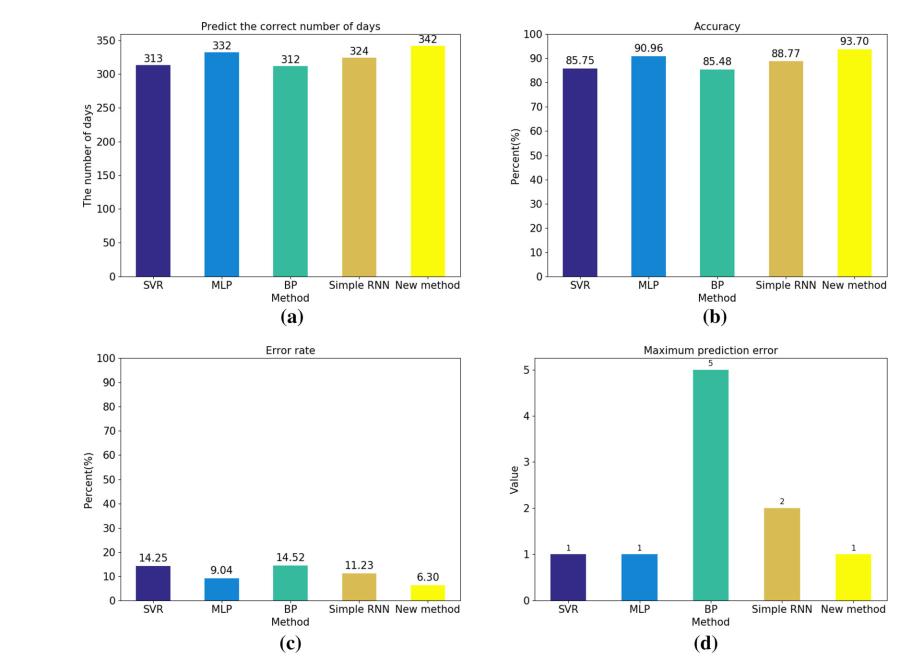

and the following

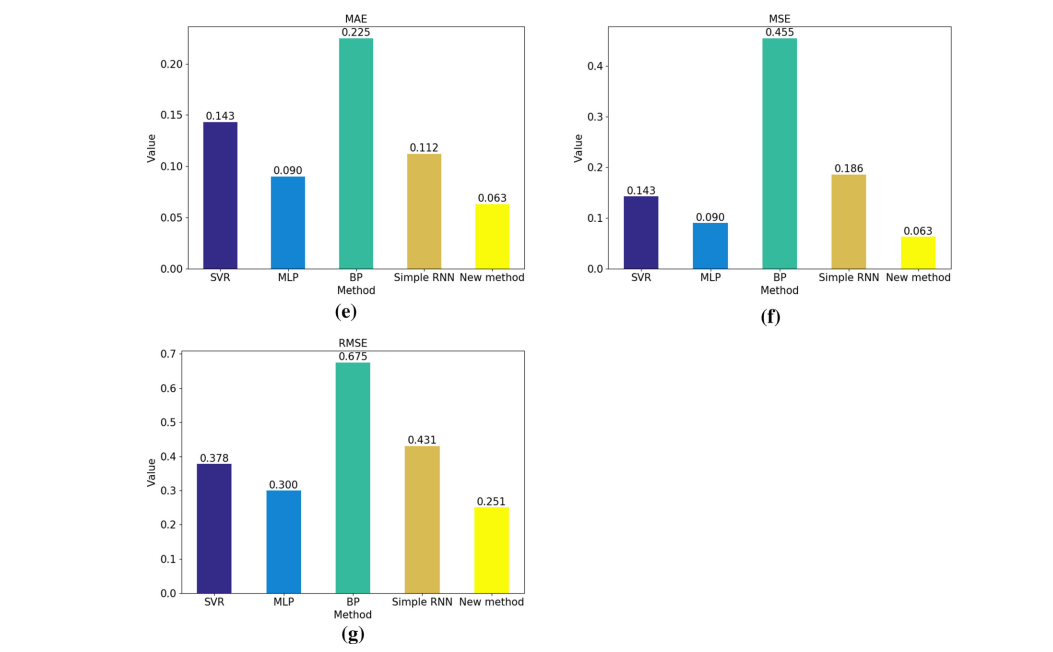

<font color='red'> the following figure is not clear, change x-axis (time) to something more visible and interpretable. For example, hour, day, week, etc.</font>

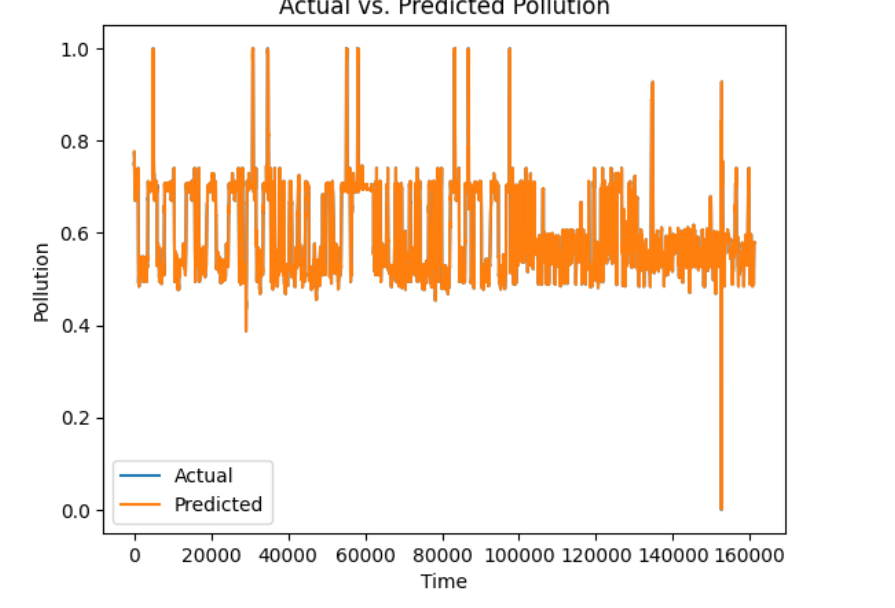

# Results

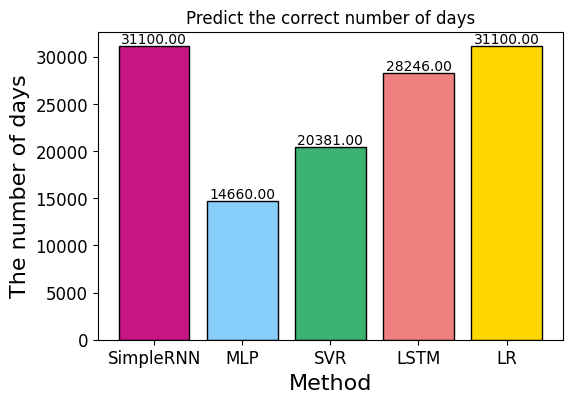

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN','MLP', 'SVR', 'LSTM', 'LR']
y = [total_correct_predictions_rnn, total_correct_predictions_MLP, total_correct_predictions_SVR, total_correct_predictions_LSTM_geohash, total_correct_predictions_lr]

width = 0.2
colors = ['mediumvioletred','lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('The number of days', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Predict the correct number of days")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

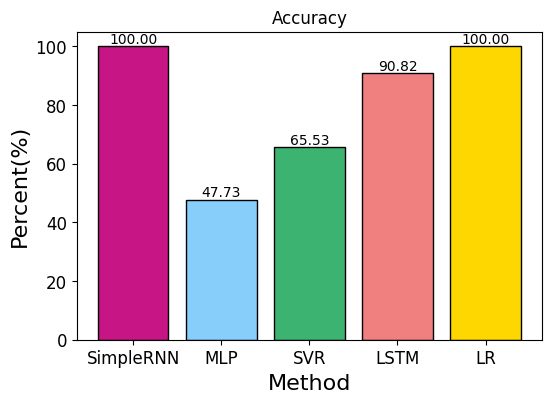

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN','MLP', 'SVR', 'LSTM', 'LR']
y = [accuracy_rnn*100, accuracy_MLP*100, accuracy_SVR*100, accuracy_LSTM_geohash*100, accuracy_lr*100]

width = 0.2
colors = ['mediumvioletred','lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Percent(%)', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Accuracy")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

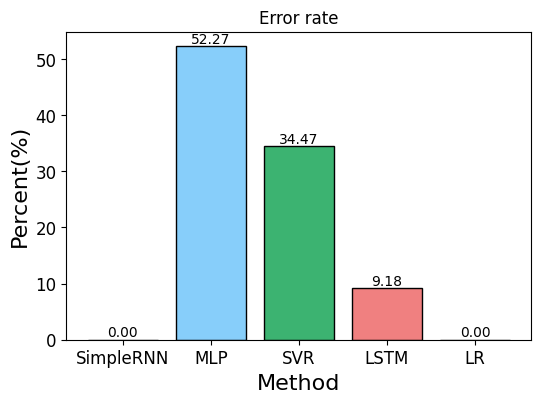

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN','MLP', 'SVR', 'LSTM', 'LR']
y = [error_rate_rnn*100, error_rate_MLP*100, error_rate_SVR*100, error_rate_LSTM_geohash*100, error_rate_lr*100]

width = 0.2
colors = ['mediumvioletred','lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6, 4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Percent(%)', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Error rate")

for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')

plt.show()

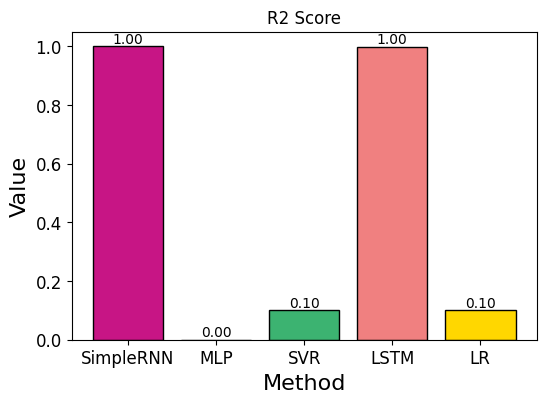

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN', 'MLP', 'SVR', 'LSTM', 'LR']
y = [r2_rnn, max(r2_MLP, 0), r2_svr, r2_LSTM_geohash, r2_lr]

width = 0.2
colors = ['mediumvioletred', 'lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("R2 Score")

for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

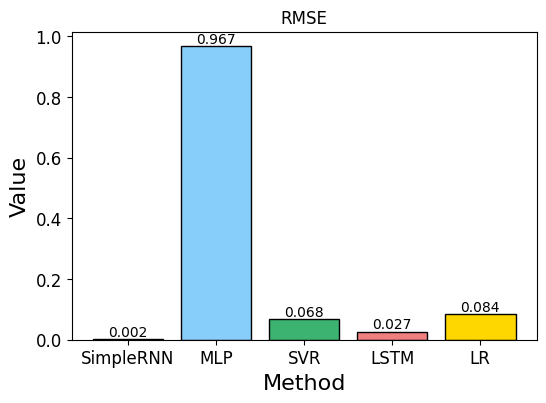

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN','MLP', 'SVR', 'LSTM', 'LR']
y = [rmse_rnn, rmse_MLP, rmse_svr, rmse_LSTM_geohash, rmse_lr]

width = 0.2
colors = ['mediumvioletred', 'lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("RMSE")

for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.3f}', ha='center', va='bottom')


plt.show()

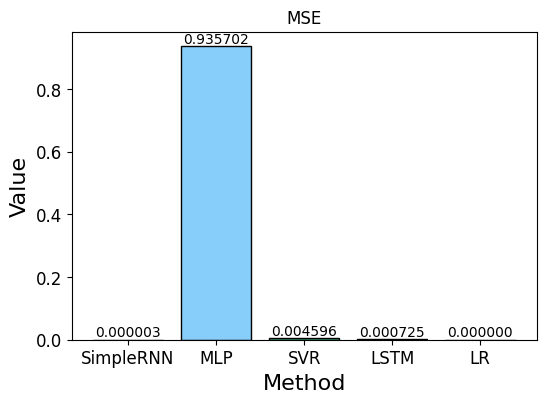

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN', 'MLP', 'SVR', 'LSTM', 'LR']
y = [mse_rnn, mse_MLP, mse_SVR, mse_LSTM_geohash, mse_lr]

width = 0.2
colors = ['mediumvioletred', 'lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("MSE")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.6f}', ha='center', va='bottom')


plt.show()

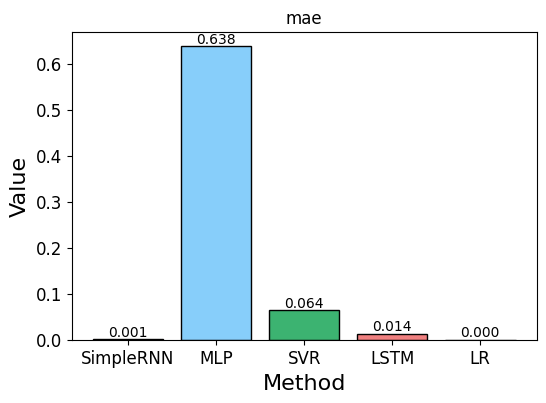

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN', 'MLP', 'SVR', 'LSTM', 'LR']
y = [mae_rnn, mae_MLP, mae_SVR, mae_LSTM_geohash, mae_lr]

width = 0.2
colors = ['mediumvioletred', 'lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("mae")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.3f}', ha='center', va='bottom')

plt.show()

In [ ]:
test_X_inverted = scaler.inverse_transform(test_X1)

In [ ]:
dates = test_X_inverted[:, 0]

In [ ]:
from datetime import datetime

dates = [datetime.fromtimestamp(int(timestamp)) for timestamp in dates]

In [ ]:
dates = dates[::5000]
actual = lstm_inv_y1[::5000]
predicted = lstm_inv_yhat[::5000]

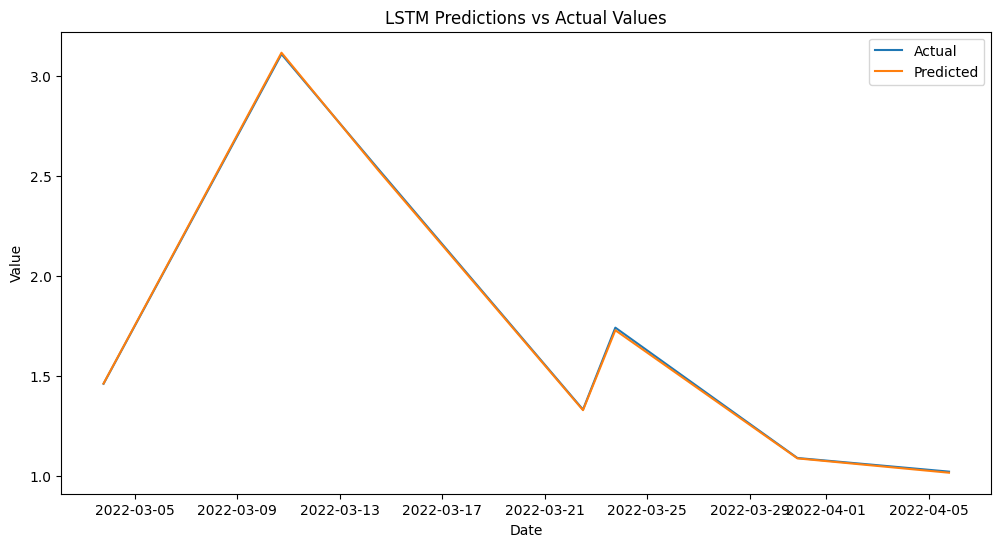

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dates, actual, label='Actual')
plt.plot(dates, predicted, label='Predicted')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('LSTM Predictions vs Actual Values')
plt.legend()
plt.show()

Maximum pollution value: 12.74441924
Minimum pollution value: 0.464346333


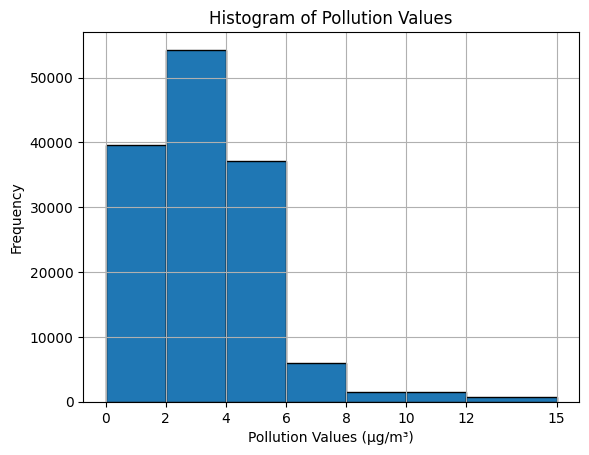

No outliers found.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

merged_data = geohash_dataset

# 1. Determine maximum and minimum values of pollution
max_pollution = merged_data['pollution'].max()
min_pollution = merged_data['pollution'].min()
print(f"Maximum pollution value: {max_pollution}")
print(f"Minimum pollution value: {min_pollution}")

# 2. Create bins and labels
bins = [0, 2, 4, 6, 8, 10, 12, 15]
bin_labels = ['0', '2', '4', '6', '8', '10', '12', '15']

# 3. Plot histogram
plt.hist(merged_data['pollution'], bins=bins, edgecolor='black')
plt.xlabel('Pollution Values (µg/m³)')
plt.ylabel('Frequency')
plt.title('Histogram of Pollution Values')

# 4. Adjust x-axis ticks and labels
plt.xticks(bins, bin_labels)

# 5. Show grid
plt.grid(True)

# 6. Show plot
plt.show()

# 7. Check for outliers
outliers = merged_data[merged_data['pollution'] > 300]
if len(outliers) > 0:
    print(f"Number of outliers: {len(outliers)}")
    # If outliers are small in number, drop them
    # merged_data = merged_data[merged_data['pollution'] <= 300]
else:
    print("No outliers found.")

In [ ]:
merged_data.index = pd.to_datetime(merged_data.index)

In [ ]:
# Explore temporal distribution
start_date = merged_data.index.min()
end_date = merged_data.index.max()
data_duration = end_date - start_date
print("Start Date:", start_date)
print("End Date:", end_date)
print("Data Duration:", data_duration)

Start Date: 2021-09-10 12:29:09
End Date: 2022-04-05 19:53:13.500000
Data Duration: 207 days 07:24:04.500000


<Axes: xlabel='time'>

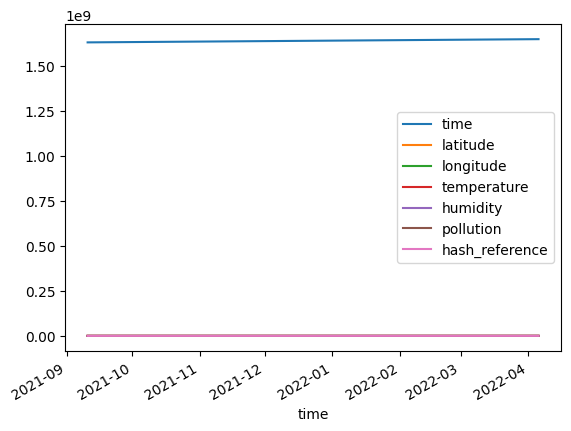

In [ ]:
# Analyze spatial distribution
#Visualize the spatial distribution of pollution levels using maps.
#Identify areas with high and low pollution concentrations.
merged_data.plot(column='pollution', legend=True)

<Axes: title={'center': 'Pollution Levels Over Time'}, xlabel='time'>

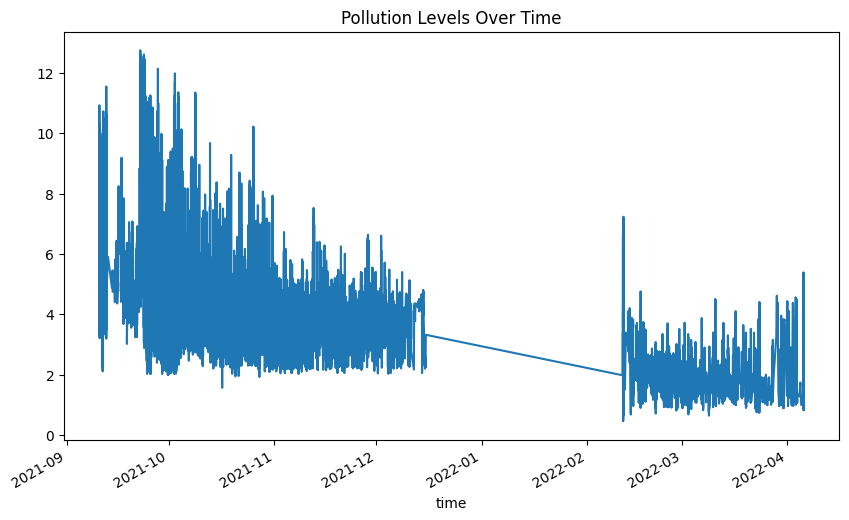

In [ ]:
merged_data['pollution'].plot(figsize=(10, 6), title='Pollution Levels Over Time')

Correlation Matrix:
             pollution  temperature  humidity
pollution     1.000000     0.555951  0.261403
temperature   0.555951     1.000000  0.083870
humidity      0.261403     0.083870  1.000000


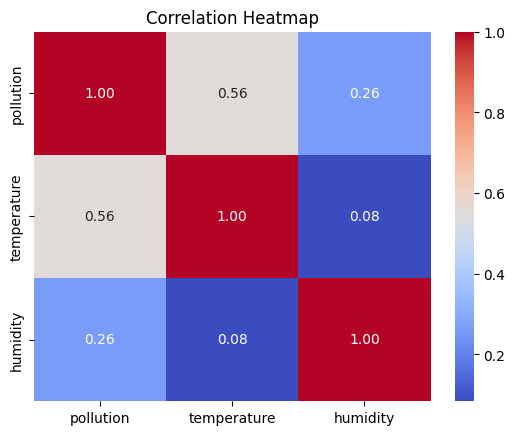

In [ ]:
import seaborn as sns
#This code calculates the correlation matrix between pollution levels, temperature, and humidity, and then visualizes the correlations using a heatmap.
# Explore correlations
corr_matrix = merged_data[['pollution', 'temperature', 'humidity']].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Visualize correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

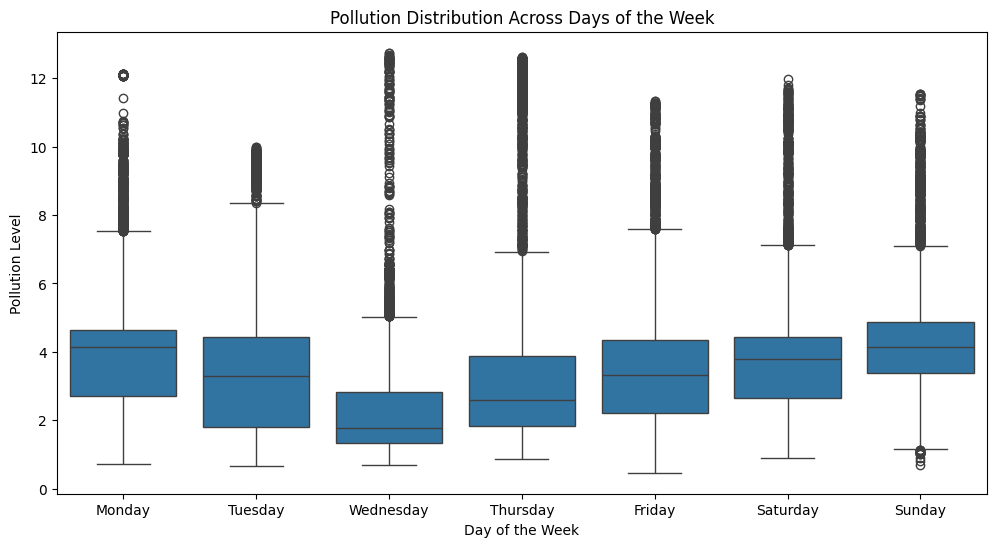

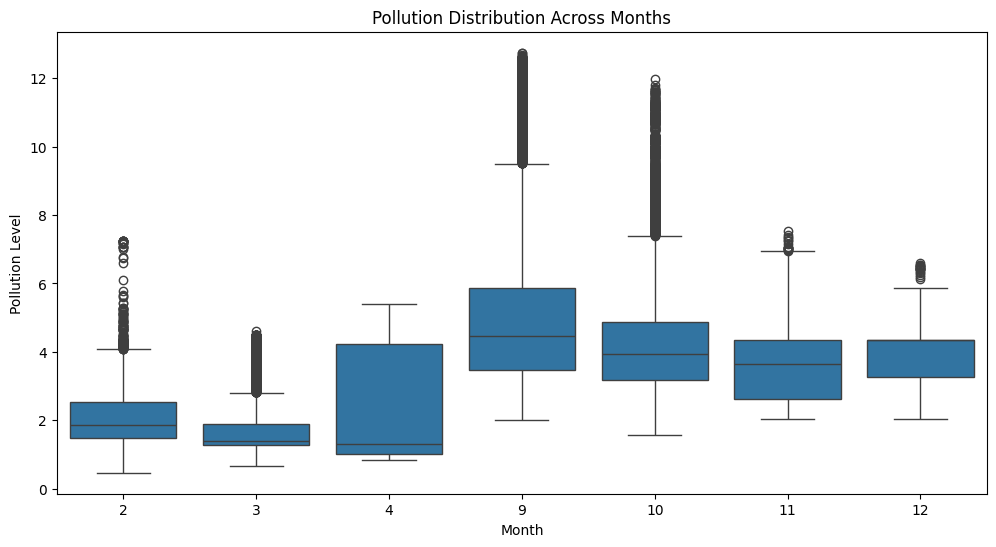

KeyboardInterrupt: 

In [ ]:
# Step 1: Extract temporal information
merged_data['day_of_week'] = merged_data.index.dayofweek  # Extract day of the week (Monday = 0, Sunday = 6)
merged_data['month'] = merged_data.index.month  # Extract month
merged_data['year'] = merged_data.index.year  # Extract year
merged_data['date'] = merged_data.index.values

# Step 2: Analyze distribution of pollution levels across days of the week and months
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='pollution', data=merged_data)
plt.title('Pollution Distribution Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Pollution Level')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='pollution', data=merged_data)
plt.title('Pollution Distribution Across Months')
plt.xlabel('Month')
plt.ylabel('Pollution Level')
plt.show()



# Step 3: Calculate summary statistics
daily_summary = merged_data.groupby('date')['pollution'].describe()
monthly_summary = merged_data.groupby(['year', 'month'])['pollution'].describe()

print("Daily Summary Statistics:")
print(daily_summary)

print("\nMonthly Summary Statistics:")
print(monthly_summary)

In [ ]:
import pandas as pd
import scipy.stats as stats


# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*[group['pollution'] for name, group in merged_data.groupby(GEOHASH_ALGORITHM)])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in pollution levels across different geohash categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in pollution levels across different geohash categories.")

F-statistic: 2750.903334053879
p-value: 0.0
Reject the null hypothesis: There is a significant difference in pollution levels across different geohash categories.


In [ ]:
import pandas as pd
from scipy.stats import rankdata
'''
if you specifically want a measure similar to Kendall's correlation coefficient but for a
categorical predictor and a continuous outcome, you might consider calculating the correlation between the ranks of the categorical
variable and the continuous variable
'''



# Rank the pollution values
merged_data['pollution_rank'] = rankdata(merged_data['pollution'])

# Calculate the average rank for each category
avg_rank_per_category = merged_data.groupby('neighborhood')['pollution_rank'].mean()

# Calculate the correlation between the ranks of geohash and pollution
correlation = avg_rank_per_category.corr(merged_data.groupby('neighborhood').size(), method='kendall')

print(f"Reverse Kendall's correlation coefficient: {correlation}")

Reverse Kendall's correlation coefficient: -0.0026490089461077213


In [ ]:
import pandas as pd
from scipy.stats import rankdata

# Rank the pollution values
merged_data['pollution_rank'] = rankdata(merged_data['pollution'])

# Calculate the average rank for each category
avg_rank_per_category = merged_data.groupby(GEOHASH_ALGORITHM)['pollution_rank'].mean()

# Calculate the correlation between the ranks of geohash and pollution
correlation = avg_rank_per_category.corr(merged_data.groupby(GEOHASH_ALGORITHM).size(), method='kendall')

print(f"Reverse Kendall's correlation coefficient: {correlation}")


Reverse Kendall's correlation coefficient: -0.034445660429614826


In [ ]:
import pandas as pd
from scipy.stats import rankdata

# Rank the pollution values
merged_data['pollution_rank'] = rankdata(merged_data['pollution'])

# Calculate the average rank for each category
avg_rank_per_category = merged_data.groupby('city')['pollution_rank'].mean()

# Calculate the correlation between the ranks of geohash and pollution
correlation = avg_rank_per_category.corr(merged_data.groupby('city').size(), method='kendall')

print(f"Reverse Kendall's correlation coefficient: {correlation}")

Reverse Kendall's correlation coefficient: 1.0


In [ ]:
import pandas as pd
from scipy.stats import rankdata

# Define function to calculate Kendall's correlation coefficient
def kendall_correlation(df, column, precision):
    # Round geohash to the specified precision
    df[GEOHASH_ALGORITHM] = df[GEOHASH_ALGORITHM].str.slice(0, precision)

    # Rank the pollution values
    df['pollution_rank'] = rankdata(df[column])

    # Calculate the average rank for each category
    avg_rank_per_category = df.groupby(column)['pollution_rank'].mean()

    # Calculate the correlation between the ranks of the categorical variable and pollution
    correlation = avg_rank_per_category.corr(df.groupby(column).size(), method='kendall')

    return correlation

# Assuming you already have merged_data DataFrame

# Calculate Kendall's correlation coefficient for different categorical variables with specified precision
precision = 5  # Change this to the desired precision level for geohash
correlation_geohash = kendall_correlation(merged_data, GEOHASH_ALGORITHM, precision)
correlation_neighborhood = kendall_correlation(merged_data, 'neighborhood', precision)
correlation_city = kendall_correlation(merged_data, 'city', precision)

print(f"Reverse Kendall's correlation coefficient for {GEOHASH_ALGORITHM}: {correlation_geohash}")
print(f"Reverse Kendall's correlation coefficient for neighborhood: {correlation_neighborhood}")
print(f"Reverse Kendall's correlation coefficient for City: {correlation_city}")

Reverse Kendall's correlation coefficient for H3: -1.0
Reverse Kendall's correlation coefficient for neighborhood: -0.16688756360478646
Reverse Kendall's correlation coefficient for City: 1.0


In [ ]:
import pandas as pd
from scipy.stats import rankdata

# Define function to calculate Kendall's correlation coefficient
def kendall_correlation(df, column, precision):
    # Round geohash to the specified precision
    df[GEOHASH_ALGORITHM] = df[GEOHASH_ALGORITHM].str.slice(0, precision)

    # Rank the pollution values
    df['pollution_rank'] = rankdata(df[column])

    # Calculate the average rank for each category
    avg_rank_per_category = df.groupby(column)['pollution_rank'].mean()

    # Calculate the correlation between the ranks of the categorical variable and pollution
    correlation = avg_rank_per_category.corr(df.groupby(column).size(), method='kendall')

    return correlation

# Assuming you already have merged_data DataFrame

# Calculate Kendall's correlation coefficient for different categorical variables with specified precision
precision = 6  # Change this to the desired precision level for geohash
correlation_geohash = kendall_correlation(merged_data, GEOHASH_ALGORITHM, precision)
correlation_neighborhood = kendall_correlation(merged_data, 'neighborhood', precision)
correlation_city = kendall_correlation(merged_data, 'city', precision)

print(f"Reverse Kendall's correlation coefficient for {GEOHASH_ALGORITHM}: {correlation_geohash}")
print(f"Reverse Kendall's correlation coefficient for neighborhood: {correlation_neighborhood}")
print(f"Reverse Kendall's correlation coefficient for City: {correlation_city}")

Reverse Kendall's correlation coefficient for H3: -1.0
Reverse Kendall's correlation coefficient for neighborhood: -0.16688756360478646
Reverse Kendall's correlation coefficient for City: 1.0


In [ ]:
import pandas as pd
from scipy.stats import rankdata

# Define function to calculate Kendall's correlation coefficient
def kendall_correlation(df, column, precision):
    # Round geohash to the specified precision
    df[GEOHASH_ALGORITHM] = df[GEOHASH_ALGORITHM].str.slice(0, precision)

    # Rank the pollution values
    df['pollution_rank'] = rankdata(df[column])

    # Calculate the average rank for each category
    avg_rank_per_category = df.groupby(column)['pollution_rank'].mean()

    # Calculate the correlation between the ranks of the categorical variable and pollution
    correlation = avg_rank_per_category.corr(df.groupby(column).size(), method='kendall')

    return correlation

# Assuming you already have merged_data DataFrame

# Calculate Kendall's correlation coefficient for different categorical variables with specified precision
precision = 7  # Change this to the desired precision level for geohash
correlation_geohash = kendall_correlation(merged_data, GEOHASH_ALGORITHM, precision)
correlation_neighborhood = kendall_correlation(merged_data, 'neighborhood', precision)
correlation_city = kendall_correlation(merged_data, 'city', precision)

print(f"Reverse Kendall's correlation coefficient for {GEOHASH_ALGORITHM}: {correlation_geohash}")
print(f"Reverse Kendall's correlation coefficient for neighborhood: {correlation_neighborhood}")
print(f"Reverse Kendall's correlation coefficient for City: {correlation_city}")


Reverse Kendall's correlation coefficient for H3: -1.0
Reverse Kendall's correlation coefficient for neighborhood: -0.16688756360478646
Reverse Kendall's correlation coefficient for City: 1.0


In [ ]:
#METHOD 2: Spearman's Rank Correlation Coefficient

import pandas as pd
from scipy.stats import spearmanr

# Calculate Spearman's rank correlation coefficient between geohash and pollution
geohash_corr, geohash_p_value = spearmanr(merged_data[GEOHASH_ALGORITHM], merged_data['pollution'])

# Calculate Spearman's rank correlation coefficient between neighborhood and pollution
neighborhood_corr, neighborhood_p_value = spearmanr(merged_data['neighborhood'], merged_data['pollution'])

# Calculate Spearman's rank correlation coefficient between city and pollution
city_corr, city_p_value = spearmanr(merged_data['city'], merged_data['pollution'])

print("Spearman's Rank Correlation Coefficients:")
print(f"{GEOHASH_ALGORITHM} vs. Pollution: {geohash_corr}")
print(f"Neighborhood vs. Pollution: {neighborhood_corr}")
print(f"city vs. Pollution: {city_corr}")

print("\nP-values:")
print(f"{GEOHASH_ALGORITHM} vs. Pollution: {geohash_p_value}")
print(f"Neighborhood vs. Pollution: {neighborhood_p_value}")
print(f"city vs. Pollution: {city_p_value}")

Spearman's Rank Correlation Coefficients:
H3 vs. Pollution: -0.6400784605247931
Neighborhood vs. Pollution: -0.0014684660282115536
city vs. Pollution: 0.6400784605247931

P-values:
H3 vs. Pollution: 0.0
Neighborhood vs. Pollution: 0.5435397829451157
city vs. Pollution: 0.0


In [ ]:
import pandas as pd
from scipy.stats import spearmanr
import geohash2

# Define a function to create geohash codes with different precision levels
def create_geohash_precision(latitude, longitude, precision):
    return geohash2.encode(latitude, longitude, precision=precision)

# Define the precision levels to test
precision_levels = [3, 4, 5, 6, 7]

# Initialize dictionaries to store Spearman's rank correlation coefficients and p-values
spearman_results = {}

# Iterate over each precision level and calculate Spearman's rank correlation coefficient
for precision in precision_levels:
    # Create geohash codes with the current precision level
    merged_data[f'geohash_precision_{precision}'] = merged_data.apply(lambda row: create_geohash_precision(row['latitude'], row['longitude'], precision), axis=1)
    # Calculate Spearman's rank correlation coefficient between geohash and pollution
    correlation, p_value = spearmanr(merged_data[f'geohash_precision_{precision}'], merged_data['pollution'])
    # Store results in dictionary
    spearman_results[f'geohash_precision_{precision}'] = (correlation, p_value)

# Print Spearman's rank correlation coefficients and p-values for geohash
print("Spearman's Rank Correlation Coefficients for Geohash:")
for precision, result in spearman_results.items():
    print(f"Precision {precision.split('_')[-1]}: {result[0]}")
    print(f"P-value: {result[1]}")


Spearman's Rank Correlation Coefficients for Geohash:
Precision 3: -0.6418436534242067
P-value: 0.0
Precision 4: -0.6387173117939177
P-value: 0.0
Precision 5: -0.48894856930757385
P-value: 0.0
Precision 6: -0.4809243553352157
P-value: 0.0
Precision 7: -0.4809243553352157
P-value: 0.0


In [ ]:
#METHOD 3: ANOVA (Analysis of Variance)

"""ANOVA can be used to assess whether the means of pollution levels differ significantly across different geohash categories.
ANOVA compares the means of three or more groups to determine if there are statistically significant differences between them
perform ANOVA in Python using the f_oneway function from the scipy.stats module
This code calculates the F-statistic and p-value for the ANOVA test, where:
The F-statistic measures the ratio of the variance between groups to the variance within groups.
The p-value indicates the probability of obtaining the observed results (or more extreme results) if the null hypothesis is true.
If the p-value is less than a chosen significance level (e.g., 0.05), you can reject the null hypothesis and conclude that there are statistically
significant differences in pollution levels across different geohash categories. Otherwise,
you fail to reject the null hypothesis, suggesting no significant differences in pollution levels between the groups.
"""
from scipy.stats import f_oneway


# Extract pollution levels for each neighborhood, city, and geohash category
neighborhood_groups = [merged_data[merged_data['neighborhood'] == category]['pollution'] for category in merged_data['neighborhood'].unique()]
city_groups = [merged_data[merged_data['city'] == category]['pollution'] for category in merged_data['city'].unique()]
geohash_groups = [merged_data[merged_data[GEOHASH_ALGORITHM] == category]['pollution'] for category in merged_data[GEOHASH_ALGORITHM].unique()]

# Perform ANOVA tests
f_statistic_neighborhood, p_value_neighborhood = f_oneway(*neighborhood_groups)
f_statistic_city, p_value_city = f_oneway(*city_groups)
f_statistic_geohash, p_value_geohash = f_oneway(*geohash_groups)

print("ANOVA Test Results:")
print(f"Neighborhood - F-statistic: {f_statistic_neighborhood}, P-value: {p_value_neighborhood}")
print(f"City - F-statistic: {f_statistic_city}, P-value: {p_value_city}")
print(f"Geohash - F-statistic: {f_statistic_geohash}, P-value: {p_value_geohash}")

ANOVA Test Results:
Neighborhood - F-statistic: 3052.443250400082, P-value: 0.0
City - F-statistic: 73080.93943024498, P-value: 0.0
Geohash - F-statistic: 73080.93943024498, P-value: 0.0


In [ ]:
#METHOD 3: ANOVA (Analysis of Variance)

from scipy.stats import f_oneway
import geohash2

# Define a function to create geohash codes with different precision levels
def create_geohash_precision(latitude, longitude, precision):
    return geohash2.encode(latitude, longitude, precision=precision)

# Define the precision levels to test
precision_levels = [3, 4, 5]

# Initialize dictionaries to store ANOVA test results
anova_results = {'neighborhood': {}, 'city': {}, 'geohash': {}}

# Iterate over each feature and precision level and perform ANOVA test
for feature in anova_results.keys():
    if feature == 'geohash':
        for precision in precision_levels:
            # Create geohash codes with the current precision level
            merged_data[f'{feature}_precision_{precision}'] = merged_data.apply(lambda row: create_geohash_precision(row['latitude'], row['longitude'], precision), axis=1)
            # Extract pollution levels for each geohash category
            geohash_groups = [merged_data[merged_data[f'{feature}_precision_{precision}'] == category]['pollution'] for category in merged_data[f'{feature}_precision_{precision}'].unique()]
            # Perform ANOVA test for geohash with current precision
            f_statistic, p_value = f_oneway(*geohash_groups)
            # Store results in dictionary
            anova_results[feature][f'precision_{precision}'] = (f_statistic, p_value)
    else:
        # Extract pollution levels for each category
        groups = [merged_data[merged_data[feature] == category]['pollution'] for category in merged_data[feature].unique()]
        # Perform ANOVA test
        f_statistic, p_value = f_oneway(*groups)
        # Store results in dictionary
        anova_results[feature] = (f_statistic, p_value)

# Print ANOVA test results
print("ANOVA Test Results:")
for feature, result in anova_results.items():
    if feature == 'geohash':
        print(f"For {feature}:")
        for precision, (f_statistic, p_value) in result.items():
            print(f"  Precision Level {precision}: F-statistic = {f_statistic}, P-value = {p_value}")
    else:
        print(f"For {feature}: F-statistic = {result[0]}, P-value = {result[1]}")


ANOVA Test Results:
For neighborhood: F-statistic = 3052.443250400082, P-value = 0.0
For city: F-statistic = 73080.93943024498, P-value = 0.0
For geohash:
  Precision Level precision_3: F-statistic = 39092.12830549685, P-value = 0.0
  Precision Level precision_4: F-statistic = 15662.581022659413, P-value = 0.0
  Precision Level precision_5: F-statistic = 4525.852516711435, P-value = 0.0


In [ ]:
# METHOD 4:

from scipy.stats import kruskal

# Extract pollution levels for each category
neighborhood_groups = [merged_data[merged_data['neighborhood'] == category]['pollution'] for category in merged_data['neighborhood'].unique()]
city_groups = [merged_data[merged_data['city'] == category]['pollution'] for category in merged_data['city'].unique()]
geohash_groups = [merged_data[merged_data[GEOHASH_ALGORITHM] == category]['pollution'] for category in merged_data[GEOHASH_ALGORITHM].unique()]

# Perform Kruskal-Wallis test for neighborhood
statistic_neighborhood, p_value_neighborhood = kruskal(*neighborhood_groups)

# Perform Kruskal-Wallis test for city
statistic_city, p_value_city = kruskal(*city_groups)

# Perform Kruskal-Wallis test for geohash
statistic_geohash, p_value_geohash = kruskal(*geohash_groups)

print("Kruskal-Wallis Test Results:")
print(f"Neighborhood: Statistic = {statistic_neighborhood}, P-value = {p_value_neighborhood}")
print(f"City: Statistic = {statistic_city}, P-value = {p_value_city}")
print(f"Geohash: Statistic = {statistic_geohash}, P-value = {p_value_geohash}")


Kruskal-Wallis Test Results:
Neighborhood: Statistic = 71935.81110219666, P-value = 0.0
City: Statistic = 70111.62584854799, P-value = 0.0
Geohash: Statistic = 70111.62584854799, P-value = 0.0


In [ ]:
# METHOD 4:

from scipy.stats import kruskal
import geohash2

# Define a function to create geohash codes with different precision levels
def create_geohash_precision(latitude, longitude, precision):
    return geohash2.encode(latitude, longitude, precision=precision)

# Define the precision levels to test
precision_levels = [3, 4, 5, 6, 7]

# Initialize dictionaries to store Kruskal-Wallis test results
kruskal_results = {'neighborhood': {}, 'city': {}, 'geohash': {}}

# Iterate over each feature and precision level and perform Kruskal-Wallis test
for feature in kruskal_results.keys():
    if feature == GEOHASH_ALGORITHM:
        for precision in precision_levels:
            # Create geohash codes with the current precision level
            merged_data[f'{feature}_precision_{precision}'] = merged_data.apply(lambda row: create_geohash_precision(row['latitude'], row['longitude'], precision), axis=1)
            # Extract pollution levels for each geohash category
            geohash_groups = [merged_data[merged_data[f'{feature}_precision_{precision}'] == category]['pollution'] for category in merged_data[f'{feature}_precision_{precision}'].unique()]
            # Perform Kruskal-Wallis test for geohash with current precision
            statistic, p_value = kruskal(*geohash_groups)
            # Store results in dictionary
            kruskal_results[feature][f'precision_{precision}'] = (statistic, p_value)
    else:
        # Extract pollution levels for each category
        groups = [merged_data[merged_data[feature] == category]['pollution'] for category in merged_data[feature].unique()]
        # Perform Kruskal-Wallis test
        statistic, p_value = kruskal(*groups)
        # Store results in dictionary
        kruskal_results[feature] = (statistic, p_value)

# Print Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
for feature, result in kruskal_results.items():
    if feature == GEOHASH_ALGORITHM:
        print(f"For {feature}:")
        for precision, (statistic, p_value) in result.items():
            print(f"  Precision Level {precision}: Statistic = {statistic}, P-value = {p_value}")
    else:
        print(f"For {feature}: Statistic = {result[0]}, P-value = {result[1]}")


Kruskal-Wallis Test Results:
For neighborhood: Statistic = 71935.81110219666, P-value = 0.0
For city: Statistic = 70111.62584854799, P-value = 0.0
For geohash: Statistic = 81399.15962267811, P-value = 0.0


In [ ]:
# METHOD 5: Kendall's Tau Correlation Coefficient
"""
Kendall's Tau Correlation Coefficient: This measures the strength and direction of association between the ranks of 'geohash' and 'pollution',
suitable for ordinal data or when the relationship is not necessarily linear.
Kendall's Tau is a rank-based correlation coefficient that measures the ordinal association between two variables.

This code calculates Kendall's Tau correlation coefficient and the associated p-value. The correlation coefficient ranges from -1 to 1, where:

1 indicates a perfect positive association.
-1 indicates a perfect negative association.
0 indicates no association.
The p-value indicates the significance of the correlation coefficient.
If the p-value is less than a chosen significance level (e.g., 0.05),
you can reject the null hypothesis and conclude that there is a statistically
significant association between 'geohash' and 'pollution'. Otherwise, you fail to reject the null hypothesis, suggesting no significant association.
"""


from scipy.stats import kendalltau
import geohash2

# Define a function to create geohash codes with different precision levels
def create_geohash_precision(latitude, longitude, precision):
    return geohash2.encode(latitude, longitude, precision=precision)

# Assuming you already have merged_data DataFrame

# Define a list of features to consider (neighborhood, city, and geohash)
features = ['neighborhood', 'city', GEOHASH_ALGORITHM]

# Define a list of precision levels to test
precision_levels = [3, 4, 5, 6, 7]  # Adjust as needed

# Initialize dictionaries to store correlation coefficients and p-values for each feature and precision level
correlation_results = {feature: {} for feature in features}
p_value_results = {feature: {} for feature in features}

# Iterate over each feature and precision level and compute Kendall's Tau correlation coefficient
for feature in features:
    for precision in precision_levels:
        if feature == GEOHASH_ALGORITHM:
            # Create geohash codes with the current precision level
            merged_data[f'{feature}_precision_{precision}'] = merged_data.apply(lambda row: create_geohash_precision(row['latitude'], row['longitude'], precision), axis=1)

            # Calculate Kendall's Tau correlation coefficient for geohash
            correlation, p_value = kendalltau(merged_data[f'{feature}_precision_{precision}'], merged_data['pollution'])
        else:
            # Assuming you have neighborhood and city data available in the DataFrame
            # Calculate Kendall's Tau correlation coefficient for neighborhood and city
            correlation, p_value = kendalltau(merged_data[feature], merged_data['pollution'])

        # Store results in dictionaries
        correlation_results[feature][precision] = correlation
        p_value_results[feature][precision] = p_value

# Print correlation coefficients and p-values for each feature and precision level
for feature in features:
    print(f"Kendall's Tau Correlation Coefficient Results for {feature}:")
    for precision, correlation in correlation_results[feature].items():
        print(f"For {feature} Precision Level {precision}: Correlation = {correlation}, P-value = {p_value_results[feature][precision]}")


Kendall's Tau Correlation Coefficient Results for neighborhood:
For neighborhood Precision Level 3: Correlation = -0.002099178905321718, P-value = 0.22600264069486697
For neighborhood Precision Level 4: Correlation = -0.002099178905321718, P-value = 0.22600264069486697
For neighborhood Precision Level 5: Correlation = -0.002099178905321718, P-value = 0.22600264069486697
For neighborhood Precision Level 6: Correlation = -0.002099178905321718, P-value = 0.22600264069486697
For neighborhood Precision Level 7: Correlation = -0.002099178905321718, P-value = 0.22600264069486697
Kendall's Tau Correlation Coefficient Results for city:
For city Precision Level 3: Correlation = 0.5229637530804528, P-value = 0.0
For city Precision Level 4: Correlation = 0.5229637530804528, P-value = 0.0
For city Precision Level 5: Correlation = 0.5229637530804528, P-value = 0.0
For city Precision Level 6: Correlation = 0.5229637530804528, P-value = 0.0
For city Precision Level 7: Correlation = 0.5229637530804528,

In [ ]:
#We group the DataFrame by the 'geohash' column and calculate the correlation coefficient between pollution values within each geohash group.
#The result is a correlation coefficient matrix where each row and column represent a unique geohash value, and the values represent the correlation
#coefficient between pollution values associated with those geohashes.

#Calculate correlation coefficient matrix based on geohash values and pollution values
correlation_matrix = merged_data.groupby(GEOHASH_ALGORITHM)['pollution'].corr(merged_data['pollution'])

# Print correlation coefficient matrix
print("Correlation Coefficient Matrix based on Geohash values:")
print(correlation_matrix)

Correlation Coefficient Matrix based on Geohash values:
H3
872a1    0.994632
872a3    0.986397
Name: pollution, dtype: float64


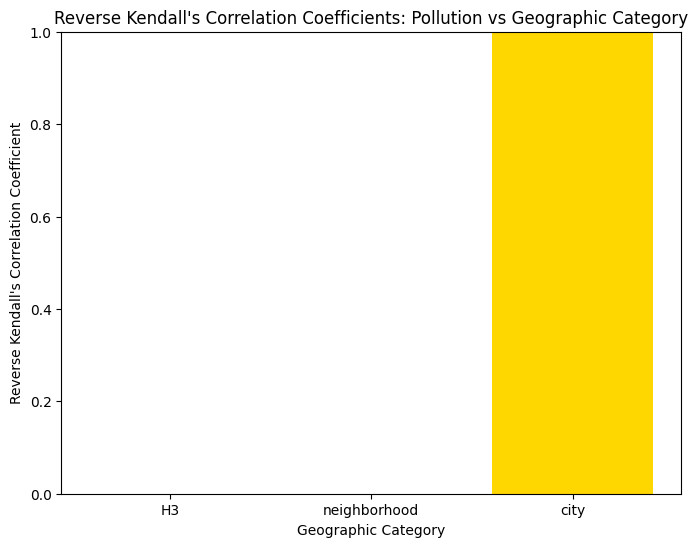

In [ ]:
#Correlation Coefficients between Pollution and geohash (respectively, neighborhood and city)variables obtained from Reverse Kendall
import matplotlib.pyplot as plt

# Names of the correlation methods
categories = [GEOHASH_ALGORITHM, "neighborhood", "city"]

# Corresponding correlation coefficients
correlation_values = [correlation_geohash, correlation_neighborhood , correlation_city]

# Plotting
plt.figure(figsize=(8, 6))
colors = ['lightskyblue', 'mediumseagreen', 'gold']
plt.bar(categories, correlation_values, color=colors)
plt.xlabel('Geographic Category')
plt.ylabel("Reverse Kendall's Correlation Coefficient")
plt.title("Reverse Kendall's Correlation Coefficients: Pollution vs Geographic Category")
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1 for correlation coefficients
plt.show()

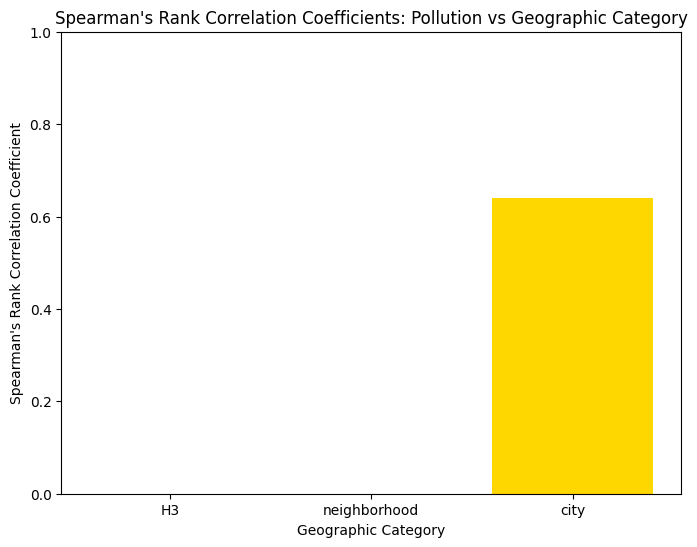

In [ ]:
#Correlation Coefficients between Pollution and geohash (respectively, neighborhood and city)variables obtained from Spearman's Rank
import matplotlib.pyplot as plt

# Names of the correlation methods
categories = [GEOHASH_ALGORITHM, "neighborhood", "city"]

# Corresponding correlation coefficients
correlation_values = [geohash_corr, neighborhood_corr, city_corr]

# Plotting
plt.figure(figsize=(8, 6))
colors = ['lightskyblue', 'mediumseagreen', 'gold']
plt.bar(categories, correlation_values, color=colors)
plt.xlabel('Geographic Category')
plt.ylabel("Spearman's Rank Correlation Coefficient")
plt.title("Spearman's Rank Correlation Coefficients: Pollution vs Geographic Category")
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1 for correlation coefficients
plt.show()

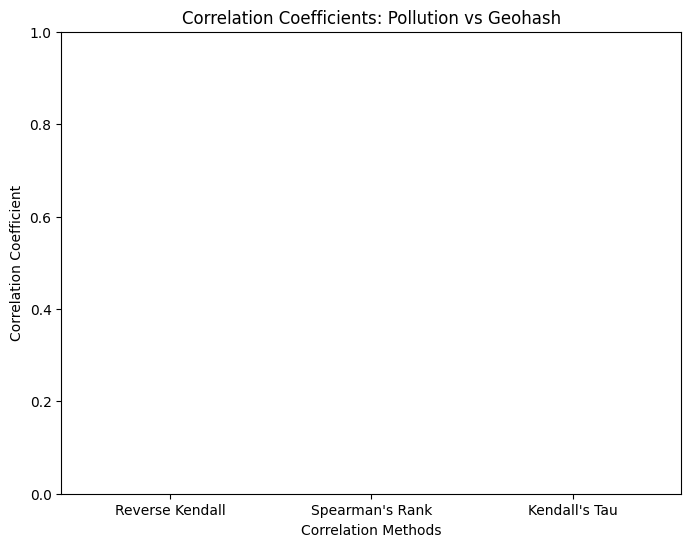

In [ ]:
#Correlation Coefficients between Pollution and geohash variables obtained from different methods
import matplotlib.pyplot as plt

# Names of the correlation methods
methods = ["Reverse Kendall", "Spearman's Rank", "Kendall's Tau"]

# Corresponding correlation coefficients
correlation_values = [correlation_geohash, geohash_corr , correlation_results[GEOHASH_ALGORITHM][7]]

# Plotting
plt.figure(figsize=(8, 6))
colors = ['lightskyblue', 'mediumseagreen', 'gold']
plt.bar(methods, correlation_values, color=colors)
plt.xlabel('Correlation Methods')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients: Pollution vs Geohash')
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1 for correlation coefficients
plt.show()

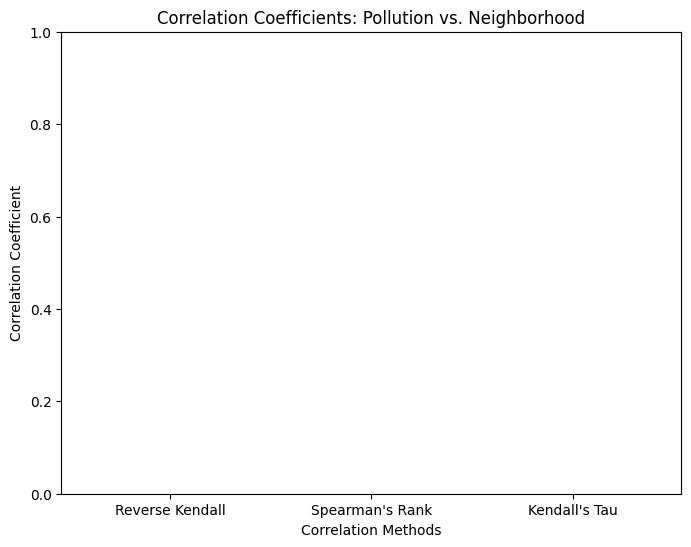

In [ ]:
#Correlation Coefficients between Pollution and Neighborhood variables obtained from different methods
import matplotlib.pyplot as plt

# Names of the correlation methods
methods = ["Reverse Kendall", "Spearman's Rank", "Kendall's Tau"]

# Corresponding correlation coefficients
correlation_values = [correlation_neighborhood, neighborhood_corr , correlation_results['neighborhood'][3]]

# Plotting
plt.figure(figsize=(8, 6))
colors = ['lightskyblue', 'mediumseagreen', 'gold']
plt.bar(methods, correlation_values, color=colors)
plt.xlabel('Correlation Methods')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients: Pollution vs. Neighborhood')
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1 for correlation coefficients
plt.show()

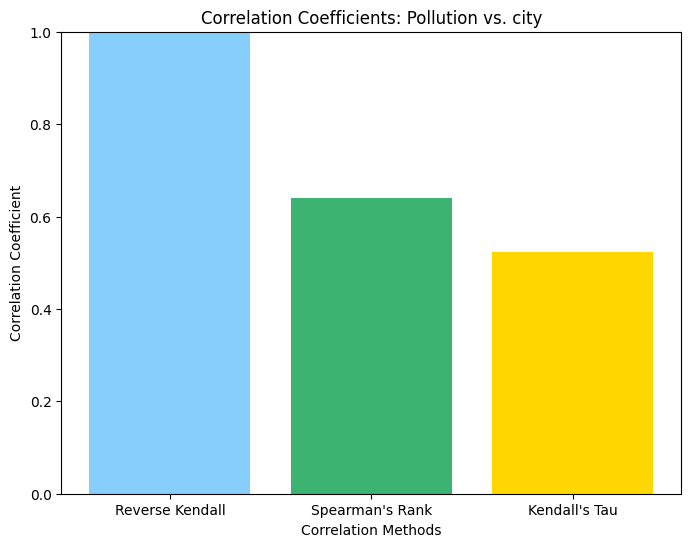

In [ ]:
#Correlation Coefficients between Pollution and city variables obtained from different methods
import matplotlib.pyplot as plt

# Names of the correlation methods
methods = ["Reverse Kendall", "Spearman's Rank", "Kendall's Tau"]

# Corresponding correlation coefficients
correlation_values = [correlation_city, city_corr, correlation_results['city'][3]]

# Plotting
plt.figure(figsize=(8, 6))
colors = ['lightskyblue', 'mediumseagreen', 'gold']
plt.bar(methods, correlation_values, color=colors)
plt.xlabel('Correlation Methods')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients: Pollution vs. city')
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1 for correlation coefficients
plt.show()

# Independent tests

In [1]:
!pip install geohash2

  Preparing metadata (setup.py) ... done
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15543 sha256=e0f0e1c9a1b90d6299f5a8eb6d8671baf01b35a277fb451206f1b4c6d6cb2ec7
  Stored in directory: /root/.cache/pip/wheels/f6/7c/c4/1b3c6fea0ebc53bf730dc86bbee7a713d501455dfb4c1f0623
Successfully built geohash2


In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt
import json
from scipy import stats
import os
import pandas as pd
from pandas import read_csv
from datetime import datetime
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
import numpy as np
import geohash2
from geohash2 import encode
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping
from keras import regularizers
from matplotlib import pyplot as plt

In [3]:
NYC_P1 = pd.read_csv("https://raw.githubusercontent.com/IsamAljawarneh/datasets/refs/heads/master/data/NYC_AQ/NYC_PM_Part1.csv")
NYC_P2 = pd.read_csv("https://raw.githubusercontent.com/IsamAljawarneh/datasets/refs/heads/master/data/NYC_AQ/NYC_PM_Part2.csv")
NYC_P3 = pd.read_csv("https://raw.githubusercontent.com/IsamAljawarneh/datasets/refs/heads/master/data/NYC_AQ/NYC_PM_Part3.csv")

In [ ]:
BOSTON_PM = pd.read_csv("https://raw.githubusercontent.com/IsamAljawarneh/datasets/refs/heads/master/data/Boston_AQ/Boston_PM_NO2.csv")

In [ ]:
PM_data = BOSTON_PM

In [4]:
PM_data = pd.concat([NYC_P1, NYC_P2, NYC_P3])

In [5]:
columns = ['time', 'latitude', 'longitude', 'temperature', 'humidity', 'pm25']
PM_data = PM_data[columns]

In [6]:
def calculate_geohash(row, geohash_algorithm, precision):
  if geohash_algorithm == 'H3':
    h3_precision = precision + 5
    return h3.latlng_to_cell(row['latitude'], row['longitude'], h3_precision)
  else:
    return encode(row['latitude'], row['longitude'], precision)

In [7]:
def decode_geohash(geohash, algorithm):
    if algorithm == 'H3':
      return h3.cells_to_geo(geohash)
    else:
      return geohash2.decode(geohash)

In [8]:
def setCenterGeohash(dataset, algorithm):
  if algorithm == 'H3':
    dataset['latitude'], dataset['longitude'] = decode_geohash(dataset[algorithm], algorithm)
  else:
    latitude = []
    longitude = []
    for i in dataset[algorithm].values:
      latitude.append(decode_geohash(i, algorithm)[0])
      longitude.append(decode_geohash(i, algorithm)[1])
    return latitude, longitude

In [9]:
def spatial_aggregation(dataset, column_name):
  # Display the result
  return dataset.copy().groupby(column_name).mean()

In [23]:
from random import randrange

def stratified_sampling(dataset):
  return dataset.groupby('geohash', group_keys=False).apply(lambda x: x.sample(n=min(3, len(x)), random_state=42))

In [11]:
def get_average_time_intervals(dataset):
  intervals = dataset['time'].diff().dt.total_seconds().dropna()

  intervals = set(intervals)
  sum = 0
  size = len(intervals)
  for interval in intervals:
    sum += interval
  avg = sum/size
  return avg

In [12]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]

        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]


    agg = concat(cols, axis=1)
    agg.columns = names
    if dropnan:
          agg.dropna(inplace=True)
    return agg

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd drive

/content/drive


In [ ]:
%cd MyDrive

/content/drive/MyDrive


In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
import scipy.interpolate

def interpolate_fixed_points(data, num_points=30):
    interpolated_data = []

    for i in range(len(data) - 1):
        row1, row2 = data.iloc[i], data.iloc[i + 1]
        time_values = np.linspace(row1["time"].timestamp(), row2["time"].timestamp(), num_points)

        # Interpolate each feature column
        new_rows = {col: np.linspace(row1[col], row2[col], num_points) for col in data.columns if col != "time"}
        new_rows["time"] = pd.to_datetime(time_values, unit="s")

        # Convert dictionary to DataFrame and append
        interpolated_data.append(pd.DataFrame(new_rows))

    return pd.concat(interpolated_data, ignore_index=True)

In [16]:
def data_transform(data, columns, method, interval="15s", order=None):
    data_copy = data.copy()

    # Ensure 'time' is datetime type
    data_copy["time"] = pd.to_datetime(data_copy["time"])

    # Interpolate fixed points first (if this function generates more data)
    data_copy = interpolate_fixed_points(data_copy)

    # Ensure 'time' is the index for resampling
    data_copy.set_index("time", inplace=True)

    # Resample the data at the specified interval (e.g., 15s)
    data_resampled = data_copy.resample(interval).mean()

    # Apply interpolation (if needed) with order for polynomial/spline methods
    if method in ["spline", "polynomial"] and order is not None:
        data_resampled.interpolate(method=method, order=order, inplace=True)
    else:
        data_resampled.interpolate(method=method, inplace=True)

    # Reset index to restore 'time' as a regular column
    data_resampled.reset_index(inplace=True)

    # Sort by 'time'
    data_resampled = data_resampled.sort_values(by="time")

    # Select only numeric columns for rolling mean
    numeric_columns = [col for col in columns if col in data_resampled.columns and data_resampled[col].dtype.kind in 'iufc']

    # Apply rolling mean smoothing
    data_resampled[numeric_columns] = data_resampled[numeric_columns].rolling(window=3, min_periods=1).mean()

    return data_resampled

In [ ]:
temp = PM_data.copy()

In [ ]:
len(temp)

515917

In [ ]:
temp['geohash'] = temp.apply(calculate_geohash, axis=1, args=['geohash', 11])

In [ ]:
temp['geohash'].nunique()

233699

In [19]:
from sklearn.preprocessing import StandardScaler

def select_samples(group, dataset_mean, dataset_std):
    numerical_cols = group.select_dtypes(include=['number']).columns

    # Standardize numerical columns
    scaler = StandardScaler()
    group[numerical_cols] = scaler.fit_transform(group[numerical_cols])

    mean_values = group[numerical_cols].mean()
    std_values = group[numerical_cols].std()

    # Handle cases where there are fewer than 3 samples in the group
    if len(group) < 3:
        mean_values = dataset_mean[numerical_cols]  # Replace with dataset mean
        std_values = dataset_std[numerical_cols]    # Replace with dataset std

    # Fill NaN values (if any std is still NaN)
    std_values = std_values.fillna(0)

    # Select representative points
    samples = pd.DataFrame([
        mean_values - 3 * std_values,
        mean_values,
        mean_values + 3 * std_values
    ])

    # Inverse transform back to the original scale
    samples[numerical_cols] = scaler.inverse_transform(samples[numerical_cols])

    return samples


In [20]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

def interpolate_group(group, num_samples=30):
    numerical_cols = group.select_dtypes(include=['number']).columns.difference(['geohash'])

    # Create interpolation indices
    x_original = np.linspace(0, 1, num=len(group))  # Original points
    x_new = np.linspace(0, 1, num=num_samples)  # New interpolated points

    # Interpolate each numerical column
    interpolated_data = {col: interp1d(x_original, group[col], kind='linear', fill_value="extrapolate")(x_new) for col in numerical_cols}

    # Convert to DataFrame
    interpolated_df = pd.DataFrame(interpolated_data)

    # Assign geohash back
    interpolated_df['geohash'] = group['geohash'].iloc[0]

    return interpolated_df

In [ ]:
temp = temp.groupby('geohash', group_keys=False).apply(select_samples, temp.select_dtypes(include=['number']).mean(), temp.select_dtypes(include=['number']).std()).reset_index(drop=True)

<ipython-input-28-03e76daaeea7>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp = temp.groupby('geohash', group_keys=False).apply(select_samples, temp.select_dtypes(include=['number']).mean(), temp.select_dtypes(include=['number']).std()).reset_index(drop=True)


In [ ]:
temp_interpolated = temp.groupby('geohash', group_keys=False).apply(interpolate_group).reset_index(drop=True)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/int

In [ ]:
temp_interpolated.dropna(inplace=True)

In [ ]:
len(temp_interpolated)

927930

In [ ]:
columns = ['time', 'latitude','longitude','temperature','humidity','geohash','pm25']
temp_interpolated = temp_interpolated[columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
temp_interpolated = scaler.fit_transform(temp_interpolated)

In [ ]:
temp_interpolated = series_to_supervised(temp_interpolated, 29, 1)

In [ ]:
import numpy as np

num_features = 7
time_steps = 29
# Define features (X) and target (y)
X = temp_interpolated.drop(columns=['var1(t)', 'var2(t)', 'var3(t)', 'var4(t)',
       'var5(t)', 'var6(t)', 'var7(t)'])  # Drop the target column
y = temp_interpolated['var7(t)']  # Select PM2.5 as target

# Time-based split: 80% train, 20% test
split_index = int(len(temp_interpolated) * (0.8))  # 80% split

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [ ]:
X_train_reshaped = X_train.values.reshape((X_train.shape[0], time_steps, num_features))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], time_steps, num_features))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
10310/10310 - 169s - 16ms/step - loss: 0.0392 - val_loss: 0.0519
Epoch 2/50
10310/10310 - 204s - 20ms/step - loss: 0.0135 - val_loss: 0.0468
Epoch 3/50
10310/10310 - 158s - 15ms/step - loss: 0.0106 - val_loss: 0.0382
Epoch 4/50
10310/10310 - 163s - 16ms/step - loss: 0.0101 - val_loss: 0.0320
Epoch 5/50
10310/10310 - 201s - 19ms/step - loss: 0.0098 - val_loss: 0.0259
Epoch 6/50
10310/10310 - 203s - 20ms/step - loss: 0.0097 - val_loss: 0.0208
Epoch 7/50
10310/10310 - 201s - 19ms/step - loss: 0.0095 - val_loss: 0.0177
Epoch 8/50
10310/10310 - 195s - 19ms/step - loss: 0.0094 - val_loss: 0.0161
Epoch 9/50
10310/10310 - 163s - 16ms/step - loss: 0.0094 - val_loss: 0.0141
Epoch 10/50
10310/10310 - 196s - 19ms/step - loss: 0.0092 - val_loss: 0.0139
Epoch 11/50
10310/10310 - 208s - 20ms/step - loss: 0.0091 - val_loss: 0.0124
Epoch 12/50
10310/10310 - 201s - 19ms/step - loss: 0.0090 - val_loss: 0.0120
Epoch 13/50
10310/10310 - 195s - 19ms/step - loss: 0.0090 - val_loss: 0.0122
Epoch 14

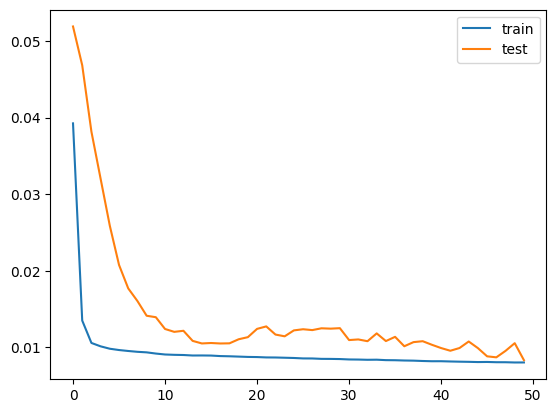

In [ ]:
# design network
model = Sequential()
model.add(LSTM(3, return_sequences=True, input_shape=(X_train_reshaped.shape[0], X_train_reshaped.shape[2])))
model.add(LSTM(1, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(X_train_reshaped , y_train.values, epochs=50, validation_data=(X_test_reshaped, y_test.values), batch_size=72, verbose=2, shuffle=False, callbacks=[early_stopping])
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
predicted_y = model.predict(X_test_reshaped)

# Flatten predictions and ground truth to 1D arrays
predicted_y = predicted_y.flatten()
y_test = y_test.values.flatten()

# Calculate metrics
mae = mean_absolute_error(y_test, predicted_y)
mse = mean_squared_error(y_test, predicted_y)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_y)


print(f"MAE: {mae:.8f}")
print(f"MSE: {mse:.8f}")
print(f"RMSE: {rmse:.8f}")
print(f"R² Score: {r2:.8f}")

5800/5800 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step
MAE: 0.00833426
MSE: 0.00107920
RMSE: 0.03285114
R² Score: 0.79174675


# Geospatial sampling against Stratified sampling - Linear Interpolation - SMA


<ipython-input-26-5c16a92834c9>:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_data = aggregated_data.groupby('geohash', group_keys=False).apply(select_samples, aggregated_data.select_dtypes(include=['number']).mean(), aggregated_data.select_dtypes(include=['number']).std()).reset_index(drop=True)
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-p

5730
5701


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
143/143 - 21s - 144ms/step - loss: 0.1350 - val_loss: 0.0935
Epoch 2/50
143/143 - 7s - 51ms/step - loss: 0.0902 - val_loss: 0.0923
Epoch 3/50
143/143 - 5s - 36ms/step - loss: 0.0785 - val_loss: 0.0963
Epoch 4/50
143/143 - 5s - 33ms/step - loss: 0.0695 - val_loss: 0.0906
Epoch 5/50
143/143 - 6s - 43ms/step - loss: 0.0649 - val_loss: 0.0853
Epoch 6/50
143/143 - 7s - 47ms/step - loss: 0.0624 - val_loss: 0.0823
Epoch 7/50
143/143 - 6s - 42ms/step - loss: 0.0603 - val_loss: 0.0816
Epoch 8/50
143/143 - 3s - 19ms/step - loss: 0.0581 - val_loss: 0.0797
Epoch 9/50
143/143 - 3s - 19ms/step - loss: 0.0563 - val_loss: 0.0761
Epoch 10/50
143/143 - 5s - 38ms/step - loss: 0.0546 - val_loss: 0.0723
Epoch 11/50
143/143 - 5s - 33ms/step - loss: 0.0526 - val_loss: 0.0677
Epoch 12/50
143/143 - 3s - 18ms/step - loss: 0.0508 - val_loss: 0.0634
Epoch 13/50
143/143 - 6s - 45ms/step - loss: 0.0488 - val_loss: 0.0588
Epoch 14/50
143/143 - 4s - 26ms/step - loss: 0.0471 - val_loss: 0.0535
Epoch 15/50
1

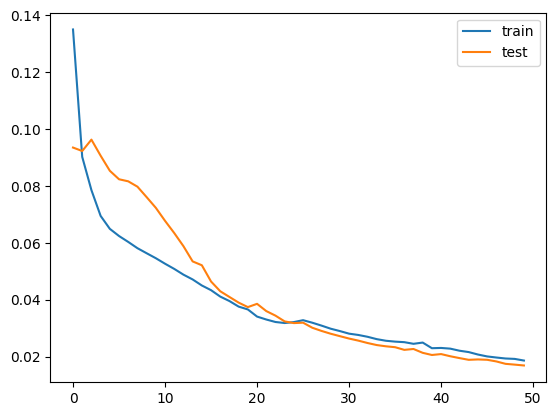

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
(1141,)
(1141,)
Precision 6 , geospatial_sampling results = R2: 0.9228350240092321, mae: 0.016868469100574497, mse: 0.001135670016096769, rmse: 0.0336997035016151
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 - 7s - 45ms/step - loss: 0.2151 - val_loss: 0.0907
Epoch 2/50
154/154 - 5s - 33ms/step - loss: 0.1419 - val_loss: 0.1135
Epoch 3/50
154/154 - 4s - 29ms/step - loss: 0.1395 - val_loss: 0.1164
Epoch 4/50
154/154 - 4s - 24ms/step - loss: 0.1388 - val_loss: 0.1164
Epoch 5/50
154/154 - 4s - 28ms/step - loss: 0.1379 - val_loss: 0.1132
Epoch 6/50
154/154 - 5s - 33ms/step - loss: 0.1351 - val_loss: 0.0910
Epoch 7/50
154/154 - 3s - 20ms/step - loss: 0.1279 - val_loss: 0.0893
Epoch 8/50
154/154 - 3s - 23ms/step - loss: 0.1195 - val_loss: 0.0850
Epoch 9/50
154/154 - 3s - 18ms/step - loss: 0.1183 - val_loss: 0.0791
Epoch 10/50
154/154 - 5s - 34ms/step - loss: 0.1156 - val_loss: 0.0818
Epoch 11/50
154/154 - 4s - 25ms/step - loss: 0.1130 - val_loss: 0.0834
Epoch 12/50
154/154 - 4s - 27ms/step - loss: 0.1110 - val_loss: 0.0841
Epoch 13/50
154/154 - 3s - 19ms/step - loss: 0.1094 - val_loss: 0.0839
Epoch 14/50
154/154 - 6s - 38ms/step - loss: 0.1080 - val_loss: 0.0841
Epoch 15/50
154/154 - 4s -

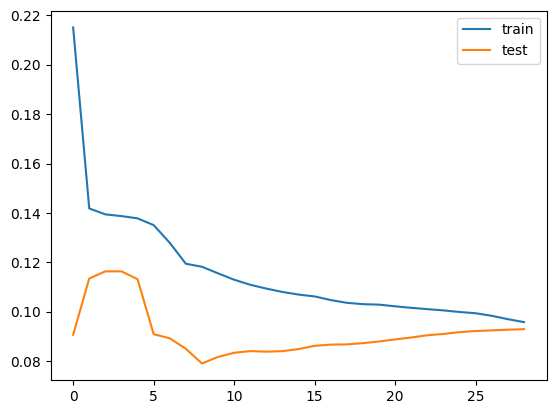

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Precision 6 , stratified_sampling results = R2: 0.018644683630902437, mae: 0.07909480332736726, mse: 0.011352625866226632, rmse: 0.10654870185143803


<ipython-input-26-5c16a92834c9>:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_data = aggregated_data.groupby('geohash', group_keys=False).apply(select_samples, aggregated_data.select_dtypes(include=['number']).mean(), aggregated_data.select_dtypes(include=['number']).std()).reset_index(drop=True)
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-p

47490
47461
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1187/1187 - 28s - 23ms/step - loss: 0.0654 - val_loss: 0.0620
Epoch 2/50
1187/1187 - 39s - 33ms/step - loss: 0.0561 - val_loss: 0.0611
Epoch 3/50
1187/1187 - 43s - 36ms/step - loss: 0.0513 - val_loss: 0.0452
Epoch 4/50
1187/1187 - 41s - 35ms/step - loss: 0.0380 - val_loss: 0.0367
Epoch 5/50
1187/1187 - 40s - 33ms/step - loss: 0.0275 - val_loss: 0.0307
Epoch 6/50
1187/1187 - 41s - 35ms/step - loss: 0.0197 - val_loss: 0.0206
Epoch 7/50
1187/1187 - 41s - 34ms/step - loss: 0.0163 - val_loss: 0.0165
Epoch 8/50
1187/1187 - 24s - 20ms/step - loss: 0.0135 - val_loss: 0.0137
Epoch 9/50
1187/1187 - 40s - 34ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 10/50
1187/1187 - 41s - 34ms/step - loss: 0.0103 - val_loss: 0.0124
Epoch 11/50
1187/1187 - 24s - 20ms/step - loss: 0.0093 - val_loss: 0.0119
Epoch 12/50
1187/1187 - 41s - 34ms/step - loss: 0.0087 - val_loss: 0.0099
Epoch 13/50
1187/1187 - 39s - 33ms/step - loss: 0.0080 - val_loss: 0.0099
Epoch 14/50
1187/1187 - 42s - 35ms/step - loss: 0.0076 - v

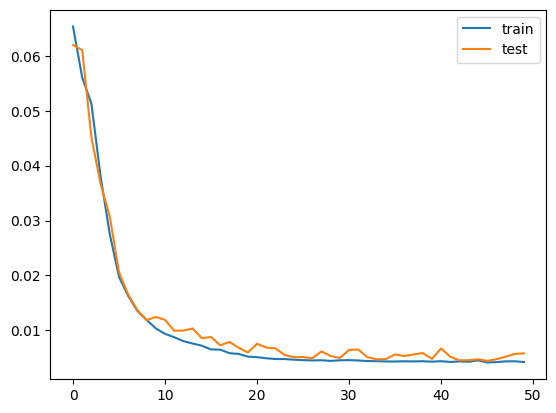

297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
(9493,)
(9493,)
Precision 7 , geospatial_sampling results = R2: 0.9713816878483635, mae: 0.004424081721525504, mse: 0.00019291839628479798, rmse: 0.013889506696956447
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1297/1297 - 30s - 23ms/step - loss: 0.1383 - val_loss: 0.0581
Epoch 2/50
1297/1297 - 40s - 31ms/step - loss: 0.1107 - val_loss: 0.0558
Epoch 3/50
1297/1297 - 26s - 20ms/step - loss: 0.1032 - val_loss: 0.0547
Epoch 4/50
1297/1297 - 42s - 32ms/step - loss: 0.1000 - val_loss: 0.0532
Epoch 5/50
1297/1297 - 26s - 20ms/step - loss: 0.0982 - val_loss: 0.0521
Epoch 6/50
1297/1297 - 40s - 31ms/step - loss: 0.0969 - val_loss: 0.0507
Epoch 7/50
1297/1297 - 42s - 32ms/step - loss: 0.0962 - val_loss: 0.0502
Epoch 8/50
1297/1297 - 26s - 20ms/step - loss: 0.0956 - val_loss: 0.0498
Epoch 9/50
1297/1297 - 25s - 20ms/step - loss: 0.0952 - val_loss: 0.0494
Epoch 10/50
1297/1297 - 25s - 20ms/step - loss: 0.0948 - val_loss: 0.0491
Epoch 11/50
1297/1297 - 42s - 32ms/step - loss: 0.0946 - val_loss: 0.0488
Epoch 12/50
1297/1297 - 40s - 31ms/step - loss: 0.0942 - val_loss: 0.0487
Epoch 13/50
1297/1297 - 40s - 31ms/step - loss: 0.0939 - val_loss: 0.0485
Epoch 14/50
1297/1297 - 25s - 19ms/step - loss: 0.0937 - v

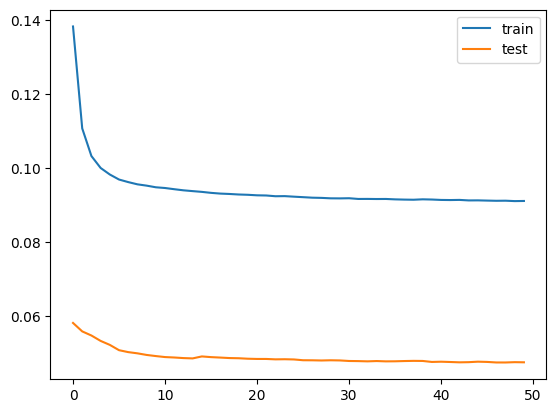

325/325 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Precision 7 , stratified_sampling results = R2: 0.18798835557034488, mae: 0.0473598171140119, mse: 0.005173347098819543, rmse: 0.07192598347481627


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/int

274560
274531


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6864/6864 - 140s - 20ms/step - loss: 0.0411 - val_loss: 0.0252
Epoch 2/50
6864/6864 - 142s - 21ms/step - loss: 0.0137 - val_loss: 0.0100
Epoch 3/50
6864/6864 - 141s - 21ms/step - loss: 0.0071 - val_loss: 0.0115
Epoch 4/50
6864/6864 - 142s - 21ms/step - loss: 0.0044 - val_loss: 0.0118
Epoch 5/50
6864/6864 - 143s - 21ms/step - loss: 0.0040 - val_loss: 0.0103
Epoch 6/50
6864/6864 - 136s - 20ms/step - loss: 0.0039 - val_loss: 0.0088
Epoch 7/50
6864/6864 - 142s - 21ms/step - loss: 0.0038 - val_loss: 0.0087
Epoch 8/50
6864/6864 - 137s - 20ms/step - loss: 0.0037 - val_loss: 0.0097
Epoch 9/50
6864/6864 - 141s - 21ms/step - loss: 0.0037 - val_loss: 0.0078
Epoch 10/50
6864/6864 - 140s - 20ms/step - loss: 0.0037 - val_loss: 0.0088
Epoch 11/50
6864/6864 - 142s - 21ms/step - loss: 0.0036 - val_loss: 0.0089
Epoch 12/50
6864/6864 - 134s - 19ms/step - loss: 0.0035 - val_loss: 0.0075
Epoch 13/50
6864/6864 - 137s - 20ms/step - loss: 0.0035 - val_loss: 0.0062
Epoch 14/50
6864/6864 - 130s - 19m

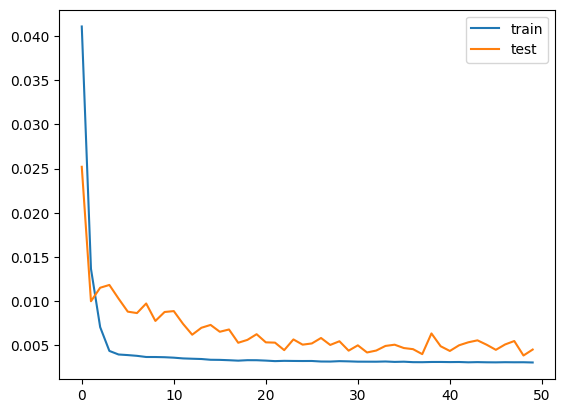

1716/1716 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
(54907,)
(54907,)
Precision 8 , geospatial_sampling results = R2: 0.9761473311682644, mae: 0.003868089895843166, mse: 0.00017867989134210912, rmse: 0.01336711978483432


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
7484/7484 - 142s - 19ms/step - loss: 0.1196 - val_loss: 0.0606
Epoch 2/50
7484/7484 - 139s - 19ms/step - loss: 0.1113 - val_loss: 0.0594
Epoch 3/50
7484/7484 - 142s - 19ms/step - loss: 0.1105 - val_loss: 0.0592
Epoch 4/50
7484/7484 - 143s - 19ms/step - loss: 0.1101 - val_loss: 0.0590
Epoch 5/50
7484/7484 - 141s - 19ms/step - loss: 0.1098 - val_loss: 0.0590
Epoch 6/50
7484/7484 - 146s - 20ms/step - loss: 0.1094 - val_loss: 0.0589
Epoch 7/50
7484/7484 - 198s - 26ms/step - loss: 0.1092 - val_loss: 0.0588
Epoch 8/50
7484/7484 - 141s - 19ms/step - loss: 0.1091 - val_loss: 0.0586
Epoch 9/50
7484/7484 - 145s - 19ms/step - loss: 0.1089 - val_loss: 0.0585
Epoch 10/50
7484/7484 - 141s - 19ms/step - loss: 0.1088 - val_loss: 0.0584
Epoch 11/50
7484/7484 - 142s - 19ms/step - loss: 0.1087 - val_loss: 0.0583
Epoch 12/50
7484/7484 - 202s - 27ms/step - loss: 0.1086 - val_loss: 0.0582
Epoch 13/50
7484/7484 - 200s - 27ms/step - loss: 0.1085 - val_loss: 0.0579
Epoch 14/50
7484/7484 - 142s - 19m

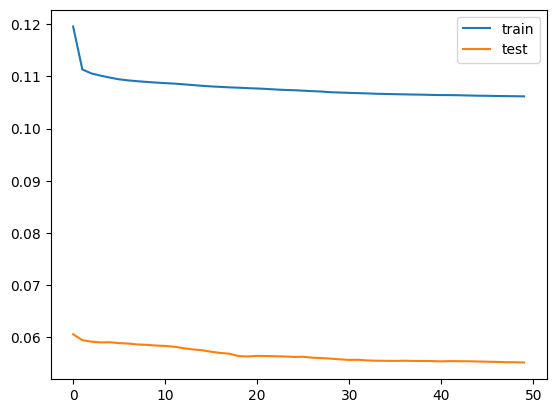

1871/1871 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step
Precision 8 , stratified_sampling results = R2: 0.21652350189251368, mae: 0.05517215675203667, mse: 0.006675650495140387, rmse: 0.08170465406046577


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.11/dist-packages/scipy/int

896100
896071


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
22402/22402 - 448s - 20ms/step - loss: 0.0135 - val_loss: 0.0129
Epoch 2/50
22402/22402 - 491s - 22ms/step - loss: 0.0039 - val_loss: 0.0055
Epoch 3/50
22402/22402 - 422s - 19ms/step - loss: 0.0035 - val_loss: 0.0043
Epoch 4/50
22402/22402 - 454s - 20ms/step - loss: 0.0033 - val_loss: 0.0051
Epoch 5/50
22402/22402 - 420s - 19ms/step - loss: 0.0032 - val_loss: 0.0045
Epoch 6/50
22402/22402 - 455s - 20ms/step - loss: 0.0029 - val_loss: 0.0041
Epoch 7/50


In [ ]:
dataset_length = []
geohash = []
maes = []
mses = []
rmses = []
accuracys = []
r2_scores = []
model_type = []
dataset_type = []
sampling_algorithm = []

precision = 12
num_features = 7
time_steps = 29
window_size = 3

columns = ['time', 'latitude','longitude','temperature','humidity','geohash','pm25']

for x in range(6, precision+1, 1):
  temp_data = PM_data.copy()
  data_size_before_aggregation = len(temp_data)

  temp_data['latitude'] = temp_data['latitude'].astype(float)
  temp_data['longitude'] = temp_data['longitude'].astype(float)

  temp_data['geohash'] = temp_data.apply(calculate_geohash, axis=1 , args=['geohash',x,])
  aggregated_data = temp_data

  aggregated_data = aggregated_data.groupby('geohash', group_keys=False).apply(select_samples, aggregated_data.select_dtypes(include=['number']).mean(), aggregated_data.select_dtypes(include=['number']).std()).reset_index(drop=True)
  aggregated_data['geohash'] = aggregated_data.apply(calculate_geohash, axis=1 , args=['geohash',x,])
  aggregated_data = aggregated_data.groupby('geohash', group_keys=False).apply(interpolate_group).reset_index(drop=True)
  aggregated_data.dropna(inplace=True)

  aggregated_data['latitude'] = aggregated_data['latitude'].astype(float)
  aggregated_data['longitude'] = aggregated_data['longitude'].astype(float)

  data_size_after_aggregation = len(aggregated_data)
  aggregated_data = aggregated_data[columns]

  numeric_cols = aggregated_data.select_dtypes(include=['number']).columns
  aggregated_data[numeric_cols] = aggregated_data[numeric_cols].rolling(window=window_size).mean()
  aggregated_data.fillna(method='bfill', inplace=True)

  stratified_sampled_data = stratified_sampling(temp_data)
  stratified_sampled_data = stratified_sampled_data.groupby('geohash', group_keys=False).apply(interpolate_group).reset_index(drop=True)
  stratified_sampled_data.dropna(inplace=True)

  stratified_sampled_data = stratified_sampled_data[columns]

  stratified_sampled_data[numeric_cols] = stratified_sampled_data[numeric_cols].rolling(window=window_size).mean()
  stratified_sampled_data.fillna(method='bfill', inplace=True)
  data_size_after_stratified_sampling = len(stratified_sampled_data)

  stratified_sampled_data['time'] = pd.to_datetime(stratified_sampled_data['time'])
  stratified_sampled_data = stratified_sampled_data.sort_values('time')

  stratified_sampled_data['time'] = stratified_sampled_data['time'].apply(lambda x: x.timestamp())

  encoder = LabelEncoder()
  aggregated_data['geohash'] = encoder.fit_transform(aggregated_data['geohash'])
  stratified_sampled_data['geohash'] = encoder.fit_transform(stratified_sampled_data['geohash'])

  dataset_length.append(len(aggregated_data))
  dataset_length.append(len(stratified_sampled_data))

  scaler = MinMaxScaler(feature_range=(0, 1))

  aggregated_data = scaler.fit_transform(aggregated_data)
  print(len(aggregated_data))
  aggregated_data = series_to_supervised(aggregated_data, n_in=time_steps, n_out=1)
  print(len(aggregated_data))

  stratified_sampled_data = scaler.fit_transform(stratified_sampled_data)
  stratified_sampled_data = series_to_supervised(stratified_sampled_data, n_in=time_steps, n_out=1)

  X = aggregated_data.drop(columns=['var1(t)', 'var2(t)', 'var3(t)', 'var4(t)',
       'var5(t)', 'var6(t)', 'var7(t)'])
  y = aggregated_data['var7(t)']

  split_index = int(len(aggregated_data) * (0.8))  # 80% split

  train_X, test_X = X.iloc[:split_index], X.iloc[split_index:]
  train_y, test_y = y.iloc[:split_index], y.iloc[split_index:]

  train_X_values = train_X.values
  test_X_values = test_X.values
  train_y_values = train_y.values
  test_y_values = test_y.values

  # model=Sequential()
  # model.add(Dense(32, input_dim=train_X_values.shape[1], activation='relu'))
  # model.add(Dense(16, activation='relu'))
  # model.add(Dense(8, activation='relu'))
  # model.add(Dense(4, activation='relu'))
  # model.add(Dense(1, activation='linear'))
  # model.compile(optimizer='adam',loss='mse', run_eagerly=True)
  # history = model.fit(train_X_values, train_y_values, epochs=50, validation_data=(test_X_values, test_y_values), batch_size=72, shuffle=False, callbacks=[early_stopping])
  # pyplot.plot(history.history['loss'], label='train')
  # pyplot.plot(history.history['val_loss'], label='test')
  # pyplot.legend()
  # pyplot.show()

  # model = LinearRegression()
  # model.fit(train_X, train_y)

  # model = SVR(kernel='rbf', C=1, gamma='auto')
  # model.fit(train_X, train_y)

  train_X_values = train_X_values.reshape((train_X.shape[0], time_steps, num_features))
  test_X_values = test_X_values.reshape((test_X.shape[0], time_steps, num_features))

  # print(train_X_values.shape)
  # print(test_X_values.shape)

  # design network
  model = Sequential()
  model.add(LSTM(3, return_sequences=True, input_shape=(train_X_values.shape[0], train_X_values.shape[2])))
  model.add(LSTM(1, return_sequences=False))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mae', optimizer='adam')
  # fit network
  history = model.fit(train_X_values , train_y_values, epochs=50, validation_data=(test_X_values, test_y_values), batch_size=32, verbose=2, shuffle=False, callbacks=[early_stopping])
  # plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.show()

  # Make predictions
  predicted_y = model.predict(test_X_values)

  # Flatten predictions and ground truth to 1D arrays
  predicted_y = predicted_y.flatten()
  test_y_values = test_y_values.flatten()

  print(predicted_y.shape)
  print(test_y_values.shape)

  # Calculate metrics
  mae = mean_absolute_error(test_y_values, predicted_y)
  mse = mean_squared_error(test_y_values, predicted_y)
  rmse = np.sqrt(mse)
  r2 = r2_score(test_y_values, predicted_y)


  # Store metrics in arrays
  model_type.append('LSTM')
  dataset_type.append('NYC')
  sampling_algorithm.append('geospatial_sampling')
  geohash.append(x)
  maes.append(mae)
  mses.append(mse)
  rmses.append(rmse)
  r2_scores.append(r2)

  print(f'Precision {x} , geospatial_sampling results = R2: {r2}, mae: {mae}, mse: {mse}, rmse: {rmse}')

  X = stratified_sampled_data.drop(columns=['var1(t)', 'var2(t)', 'var3(t)', 'var4(t)',
       'var5(t)', 'var6(t)', 'var7(t)'])
  y = stratified_sampled_data['var7(t)']

  split_index = int(len(stratified_sampled_data) * (0.8))  # 80% split

  train_X, test_X = X.iloc[:split_index], X.iloc[split_index:]
  train_y, test_y = y.iloc[:split_index], y.iloc[split_index:]

  train_X_values = train_X.values
  test_X_values = test_X.values
  train_y_values = train_y.values
  test_y_values = test_y.values

  train_X_values = train_X_values.reshape((train_X.shape[0], time_steps, num_features))
  test_X_values = test_X_values.reshape((test_X.shape[0], time_steps, num_features))

  # design network
  model = Sequential()
  model.add(LSTM(3, return_sequences=True, input_shape=(train_X_values.shape[0], train_X_values.shape[2])))
  model.add(LSTM(1, return_sequences=False))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mae', optimizer='adam')
  # fit network
  history = model.fit(train_X_values , train_y_values, epochs=50, validation_data=(test_X_values, test_y_values), batch_size=32, verbose=2, shuffle=False, callbacks=[early_stopping])
  # plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.show()

  # model = SVR(kernel='rbf', C=1, gamma='auto')
  # model.fit(train_X, train_y)

  # model = LinearRegression()
  # model.fit(train_X, train_y)

  # model=Sequential()
  # model.add(Dense(32, input_dim=train_X_values.shape[1], activation='relu'))
  # model.add(Dense(16, activation='relu'))
  # model.add(Dense(8, activation='relu'))
  # model.add(Dense(4, activation='relu'))
  # model.add(Dense(1, activation='linear'))
  # model.compile(optimizer='adam',loss='mse', run_eagerly=True)
  # history = model.fit(train_X_values, train_y_values, epochs=50, validation_data=(test_X_values, test_y_values), batch_size=72, shuffle=False, callbacks=[early_stopping])
  # pyplot.plot(history.history['loss'], label='train')
  # pyplot.plot(history.history['val_loss'], label='test')
  # pyplot.legend()
  # pyplot.show()

  # Make predictions
  predicted_y = model.predict(test_X_values)

  # Flatten predictions and ground truth to 1D arrays
  predicted_y = predicted_y.flatten()
  test_y_values = test_y_values.flatten()


  # Calculate metrics
  mae = mean_absolute_error(test_y_values, predicted_y)
  mse = mean_squared_error(test_y_values, predicted_y)
  rmse = np.sqrt(mse)
  r2 = r2_score(test_y_values, predicted_y)

  # Store metrics in arrays
  model_type.append('LSTM')
  dataset_type.append('NYC')
  sampling_algorithm.append('stratified_sampling')
  geohash.append(x)
  maes.append(mae)
  mses.append(mse)
  rmses.append(rmse)
  r2_scores.append(r2)

  print(f'Precision {x} , stratified_sampling results = R2: {r2}, mae: {mae}, mse: {mse}, rmse: {rmse}')


  # yhat_svr = svr_model.predict(svr_test_X.reshape((svr_test_X.shape[0], svr_test_X.shape[2])))

  # lr = LinearRegression().fit(train_X, train_y)



In [ ]:
results = DataFrame({'model': model_type , 'precision' : geohash, 'dataset_type': dataset_type, 'sampling_algorithm': sampling_algorithm, 'dataset_length': dataset_length, 'r2_score': r2_scores, 'mae': maes, 'mse':mses, 'rmse':rmses})
results.to_csv('results.csv')

<ipython-input-11-009fe8ac358b>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return dataset.groupby('geohash', group_keys=False).apply(lambda x: x.sample(n=1, random_state=42))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


212
211
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step - loss: 0.3677 - val_loss: 0.2830
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - loss: 0.3386 - val_loss: 0.2640
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.3258 - val_loss: 0.2540
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - loss: 0.3175 - val_loss: 0.2493
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - loss: 0.3129 - val_loss: 0.2469
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - loss: 0.3097 - val_loss: 0.2445
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - loss: 0.3066 - val_loss: 0.2421
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step - loss: 0.3035 - val_loss: 0.2398
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - loss: 0.3004 - val_loss: 0.2375
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - loss: 0.2973 - val_loss: 0.2352
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.2943 - val_loss: 0.2330
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.2913 

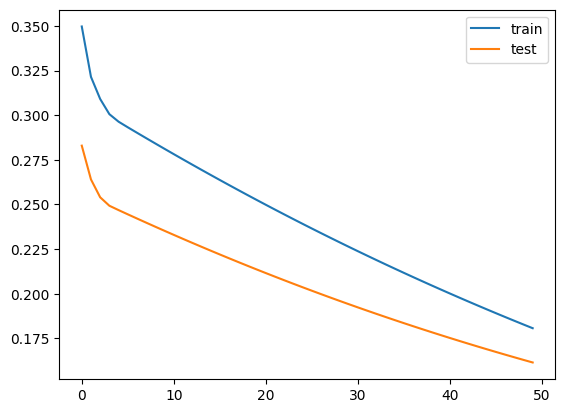

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
(43,)
(43,)
Precision 6 , geospatial_aggregation results = R2: -0.9223221837680871, mae: 0.3365996935656823, mse: 0.16147611095372857, rmse: 0.401840902539461
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.0554 - val_loss: 0.1252
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0447 - val_loss: 0.1101
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0360 - val_loss: 0.0996
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0299 - val_loss: 0.0937
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.0263 - val_loss: 0.0910
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.0244 - val_loss: 0.0900
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0233 - val_loss: 0.0896
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0227 - val_loss: 0.0896
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.0224 - val_loss: 0.0901
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0222 - val_loss: 0.0909
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0221 - val_loss: 0.0919
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.0219 - val_loss: 0.0930


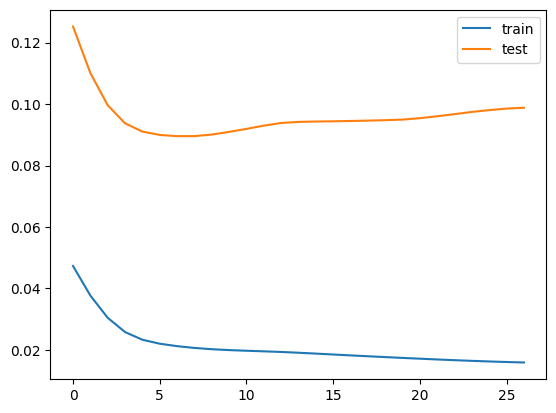

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Precision 6 , stratified_sampling results = R2: 0.1332619969200598, mae: 0.2295564577450085, mse: 0.08956122922844156, rmse: 0.29926782190613405
1643
1642
Epoch 1/50


<ipython-input-11-009fe8ac358b>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return dataset.groupby('geohash', group_keys=False).apply(lambda x: x.sample(n=1, random_state=42))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0820 - val_loss: 0.0554
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.0509 - val_loss: 0.0309
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0254 - val_loss: 0.0209
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0149 - val_loss: 0.0215
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0134 - val_loss: 0.0211
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0129 - val_loss: 0.0211
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0127 - val_loss: 0.0210
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0123 - val_loss: 0.0210
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0119 - val_loss: 0.0209
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0116 - val_loss: 0.0208
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0114 - val_loss: 0.0207
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0111 - val_

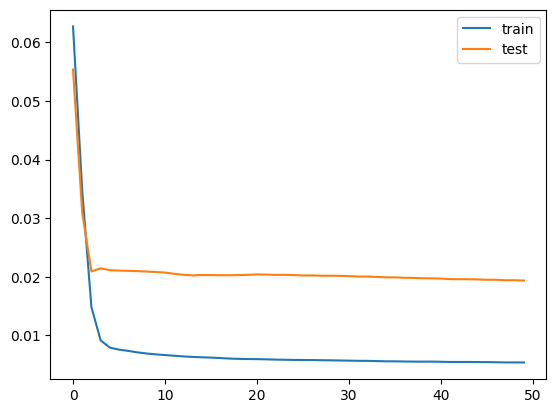

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
(329,)
(329,)
Precision 7 , geospatial_aggregation results = R2: 0.14493231546473262, mae: 0.09505826383576527, mse: 0.019360835060194145, rmse: 0.13914321780163827
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0587 - val_loss: 0.0578
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0400 - val_loss: 0.0432
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0254 - val_loss: 0.0312
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0179 - val_loss: 0.0286
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0175 - val_loss: 0.0289
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.0167 - val_loss: 0.0294
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0162 - val_loss: 0.0291
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0157 - val_loss: 0.0292
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0151 - val_loss: 0.0293
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0142 - val_loss: 0.0291
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0135 - val_loss: 0.0289
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0131 - val_

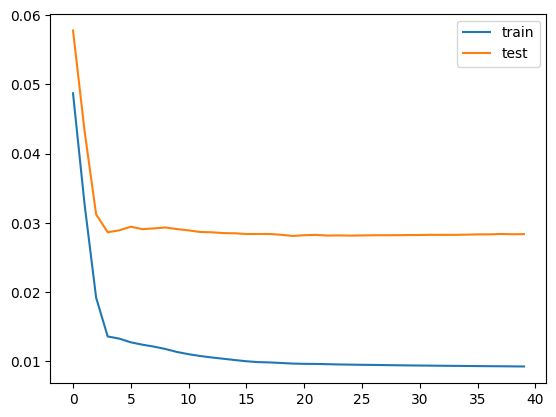

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Precision 7 , stratified_sampling results = R2: 0.06995745106381213, mae: 0.09502739710330563, mse: 0.02809418868140637, rmse: 0.16761321153598355


<ipython-input-11-009fe8ac358b>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return dataset.groupby('geohash', group_keys=False).apply(lambda x: x.sample(n=1, random_state=42))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9703
9702
Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0440 - val_loss: 0.0173
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.0125 - val_loss: 0.0174
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - loss: 0.0119 - val_loss: 0.0173
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.0111 - val_loss: 0.0171
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 0.0104 - val_loss: 0.0172
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0098 - val_loss: 0.0172
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0093 - val_loss: 0.0171
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 0.0086 - val_loss: 0.0172
Epoch 9/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.0085 - val_loss: 0.0171
Epoch 10/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 0.0080 - val_loss: 0.0171
Epoch 11/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0078 - val_loss: 0.0171
Epoch 12/50
108/108 ━━━━━━━━━

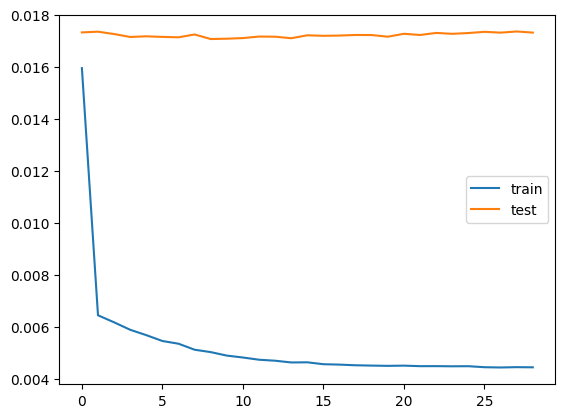

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
(1941,)
(1941,)
Precision 8 , geospatial_aggregation results = R2: 0.06087466994575097, mae: 0.09000336607153078, mse: 0.01706893999787941, rmse: 0.13064815344228717
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 0.0177 - val_loss: 0.0274
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 0.0145 - val_loss: 0.0287
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0125 - val_loss: 0.0277
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - loss: 0.0109 - val_loss: 0.0278
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.0103 - val_loss: 0.0281
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.0101 - val_loss: 0.0283
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0101 - val_loss: 0.0286
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - loss: 0.0100 - val_loss: 0.0282
Epoch 9/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - loss: 0.0101 - val_loss: 0.0282
Epoch 10/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 0.0100 - val_loss: 0.0286
Epoch 11/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 0.0100 - val_loss: 0.0283
Epoch 12/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 81m

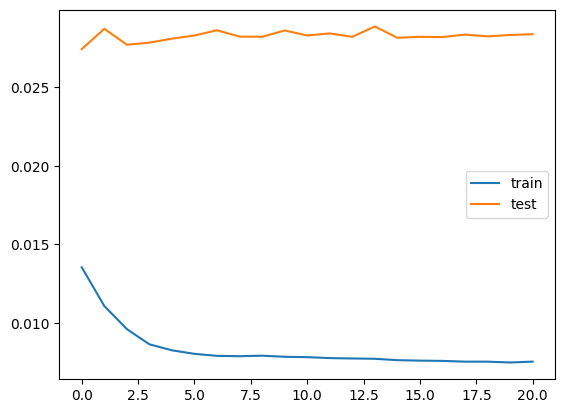

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Precision 8 , stratified_sampling results = R2: 0.0235963784690727, mae: 0.11027260538603643, mse: 0.02742018888777523, rmse: 0.1655904251089876


<ipython-input-11-009fe8ac358b>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return dataset.groupby('geohash', group_keys=False).apply(lambda x: x.sample(n=1, random_state=42))


34790
34789
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - loss: 0.0253 - val_loss: 0.0310
Epoch 2/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 0.0133 - val_loss: 0.0315
Epoch 3/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - loss: 0.0125 - val_loss: 0.0330
Epoch 4/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - loss: 0.0121 - val_loss: 0.0309
Epoch 5/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 0.0115 - val_loss: 0.0315
Epoch 6/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 0.0112 - val_loss: 0.0309
Epoch 7/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - loss: 0.0110 - val_loss: 0.0313
Epoch 8/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 0.0109 - val_loss: 0.0310
Epoch 9/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 0.0110 - val_loss: 0.0305
Epoch 10/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - loss: 0.0107 - val_loss: 0.0305
Epoch 11/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - loss: 0.0106 - val_loss: 0.0312
Epoch 12/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 

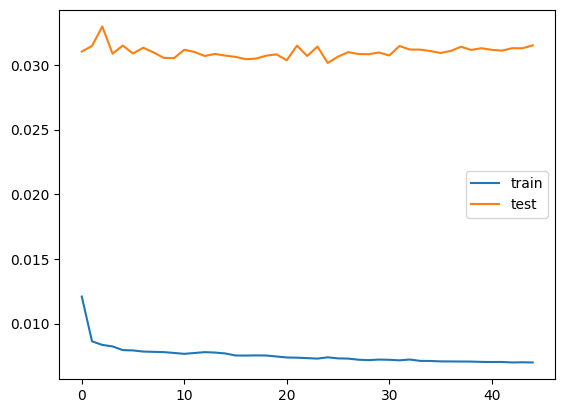

218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
(6958,)
(6958,)
Precision 9 , geospatial_aggregation results = R2: -0.08957041652264897, mae: 0.10688976544869047, mse: 0.030144282116526908, rmse: 0.17362108776449625
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - loss: 0.0308 - val_loss: 0.0359
Epoch 2/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - loss: 0.0134 - val_loss: 0.0363
Epoch 3/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 0.0130 - val_loss: 0.0361
Epoch 4/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - loss: 0.0128 - val_loss: 0.0357
Epoch 5/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - loss: 0.0125 - val_loss: 0.0358
Epoch 6/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - loss: 0.0125 - val_loss: 0.0358
Epoch 7/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - loss: 0.0125 - val_loss: 0.0361
Epoch 8/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 0.0122 - val_loss: 0.0358
Epoch 9/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - loss: 0.0122 - val_loss: 0.0356
Epoch 10/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - loss: 0.0121 - val_loss: 0.0358
Epoch 11/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - loss: 0.0119 - val_loss: 0.0358
Epoch 12/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 

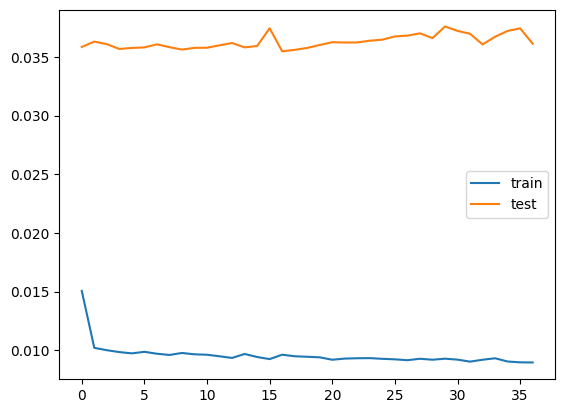

218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Precision 9 , stratified_sampling results = R2: -0.02915985171212432, mae: 0.13521191120538387, mse: 0.03548699762605388, rmse: 0.1883799289363224


<ipython-input-11-009fe8ac358b>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return dataset.groupby('geohash', group_keys=False).apply(lambda x: x.sample(n=1, random_state=42))


55720
55719
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


620/620 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - loss: 0.0235 - val_loss: 0.0357
Epoch 2/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - loss: 0.0157 - val_loss: 0.0359
Epoch 3/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 85s 78ms/step - loss: 0.0165 - val_loss: 0.0365
Epoch 4/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - loss: 0.0148 - val_loss: 0.0360
Epoch 5/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - loss: 0.0140 - val_loss: 0.0364
Epoch 6/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - loss: 0.0153 - val_loss: 0.0357
Epoch 7/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 46s 75ms/step - loss: 0.0148 - val_loss: 0.0363
Epoch 8/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - loss: 0.0149 - val_loss: 0.0363
Epoch 9/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 81s 73ms/step - loss: 0.0148 - val_loss: 0.0365
Epoch 10/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - loss: 0.0142 - val_loss: 0.0365
Epoch 11/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - loss: 0.0141 - val_loss: 0.0367
Epoch 12/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 

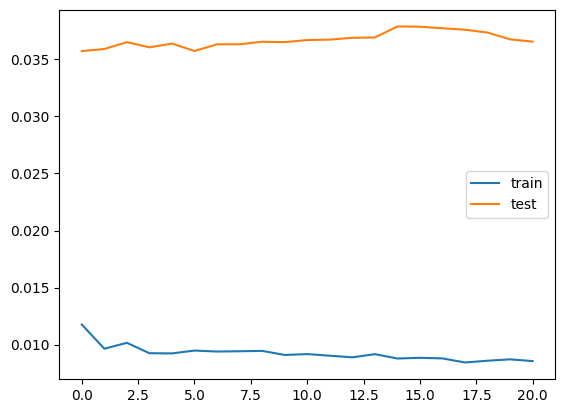

349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
(11144,)
(11144,)
Precision 10 , geospatial_aggregation results = R2: -0.10385561757849082, mae: 0.1121268509858909, mse: 0.03571604456494886, rmse: 0.18898688992876955
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


620/620 ━━━━━━━━━━━━━━━━━━━━ 46s 75ms/step - loss: 0.0453 - val_loss: 0.0354
Epoch 2/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - loss: 0.0173 - val_loss: 0.0358
Epoch 3/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - loss: 0.0157 - val_loss: 0.0356
Epoch 4/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - loss: 0.0146 - val_loss: 0.0354
Epoch 5/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - loss: 0.0154 - val_loss: 0.0350
Epoch 6/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - loss: 0.0141 - val_loss: 0.0365
Epoch 7/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - loss: 0.0147 - val_loss: 0.0362
Epoch 8/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - loss: 0.0142 - val_loss: 0.0360
Epoch 9/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 81s 73ms/step - loss: 0.0138 - val_loss: 0.0354
Epoch 10/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 83s 74ms/step - loss: 0.0132 - val_loss: 0.0354
Epoch 11/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - loss: 0.0132 - val_loss: 0.0353
Epoch 12/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 

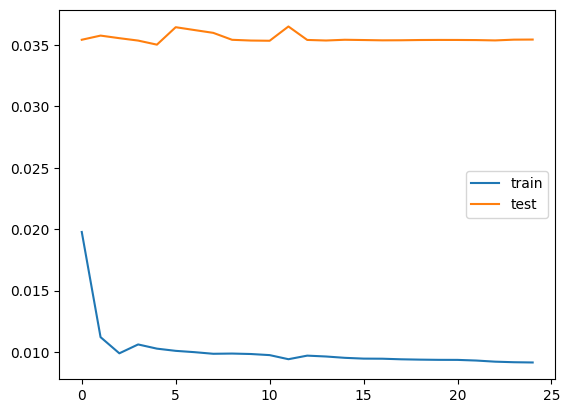

349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Precision 10 , stratified_sampling results = R2: -0.07316002240135244, mae: 0.13296981899781007, mse: 0.03503058556763882, rmse: 0.18716459485607534


<ipython-input-11-009fe8ac358b>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return dataset.groupby('geohash', group_keys=False).apply(lambda x: x.sample(n=1, random_state=42))


60479
60478
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


672/672 ━━━━━━━━━━━━━━━━━━━━ 52s 78ms/step - loss: 0.0234 - val_loss: 0.0340
Epoch 2/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 49s 73ms/step - loss: 0.0131 - val_loss: 0.0336
Epoch 3/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 51s 75ms/step - loss: 0.0135 - val_loss: 0.0346
Epoch 4/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - loss: 0.0133 - val_loss: 0.0353
Epoch 5/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 81s 73ms/step - loss: 0.0140 - val_loss: 0.0355
Epoch 6/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 50s 75ms/step - loss: 0.0141 - val_loss: 0.0358
Epoch 7/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 49s 73ms/step - loss: 0.0139 - val_loss: 0.0364
Epoch 8/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - loss: 0.0144 - val_loss: 0.0366
Epoch 9/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - loss: 0.0144 - val_loss: 0.0365
Epoch 10/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - loss: 0.0134 - val_loss: 0.0367
Epoch 11/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - loss: 0.0132 - val_loss: 0.0365
Epoch 12/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 

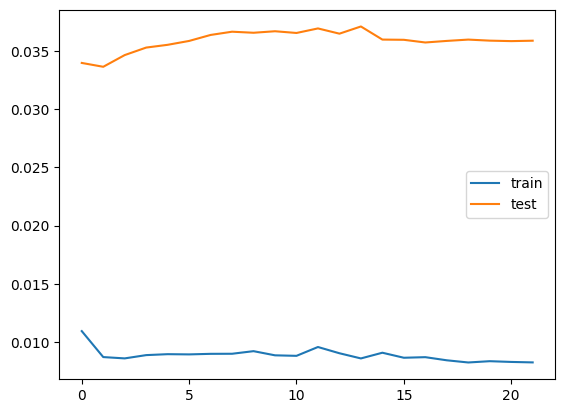

378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
(12096,)
(12096,)
Precision 11 , geospatial_aggregation results = R2: -0.04634465900993345, mae: 0.11566273359951211, mse: 0.03362360270284541, rmse: 0.18336739814603198
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


672/672 ━━━━━━━━━━━━━━━━━━━━ 49s 73ms/step - loss: 0.0370 - val_loss: 0.0335
Epoch 2/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - loss: 0.0162 - val_loss: 0.0354
Epoch 3/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 85s 78ms/step - loss: 0.0170 - val_loss: 0.0356
Epoch 4/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 49s 73ms/step - loss: 0.0170 - val_loss: 0.0357
Epoch 5/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - loss: 0.0170 - val_loss: 0.0357
Epoch 6/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - loss: 0.0171 - val_loss: 0.0357
Epoch 7/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 50s 74ms/step - loss: 0.0171 - val_loss: 0.0358
Epoch 8/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 50s 75ms/step - loss: 0.0171 - val_loss: 0.0358
Epoch 9/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 53s 79ms/step - loss: 0.0171 - val_loss: 0.0358
Epoch 10/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 80s 75ms/step - loss: 0.0171 - val_loss: 0.0358
Epoch 11/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 50s 74ms/step - loss: 0.0171 - val_loss: 0.0358
Epoch 12/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 

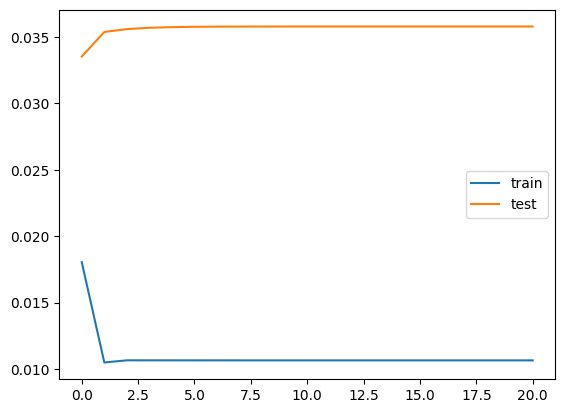

378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Precision 11 , stratified_sampling results = R2: -0.025431717418968436, mae: 0.12305236034458522, mse: 0.03351310443261811, rmse: 0.18306584725889782


<ipython-input-11-009fe8ac358b>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return dataset.groupby('geohash', group_keys=False).apply(lambda x: x.sample(n=1, random_state=42))


60479
60478
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


672/672 ━━━━━━━━━━━━━━━━━━━━ 50s 75ms/step - loss: 0.0217 - val_loss: 0.0349
Epoch 2/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - loss: 0.0169 - val_loss: 0.0364
Epoch 3/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 49s 74ms/step - loss: 0.0151 - val_loss: 0.0366
Epoch 4/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - loss: 0.0151 - val_loss: 0.0375
Epoch 5/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - loss: 0.0157 - val_loss: 0.0374
Epoch 6/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 49s 73ms/step - loss: 0.0152 - val_loss: 0.0364
Epoch 7/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 86s 78ms/step - loss: 0.0137 - val_loss: 0.0366
Epoch 8/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 80s 75ms/step - loss: 0.0143 - val_loss: 0.0367
Epoch 9/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 49s 73ms/step - loss: 0.0138 - val_loss: 0.0365
Epoch 10/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 50s 75ms/step - loss: 0.0133 - val_loss: 0.0361
Epoch 11/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - loss: 0.0127 - val_loss: 0.0366
Epoch 12/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 

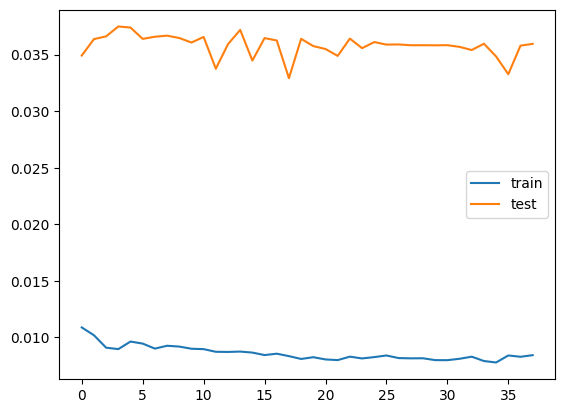

378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
(12096,)
(12096,)
Precision 12 , geospatial_aggregation results = R2: -0.024314535038108653, mae: 0.1296660492987915, mse: 0.032915679047341724, rmse: 0.18142678701708226
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


672/672 ━━━━━━━━━━━━━━━━━━━━ 50s 74ms/step - loss: 0.0373 - val_loss: 0.0349
Epoch 2/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - loss: 0.0169 - val_loss: 0.0353
Epoch 3/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 84s 79ms/step - loss: 0.0170 - val_loss: 0.0356
Epoch 4/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - loss: 0.0170 - val_loss: 0.0357
Epoch 5/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - loss: 0.0170 - val_loss: 0.0357
Epoch 6/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - loss: 0.0171 - val_loss: 0.0357
Epoch 7/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 50s 74ms/step - loss: 0.0171 - val_loss: 0.0358
Epoch 8/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - loss: 0.0171 - val_loss: 0.0358
Epoch 9/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - loss: 0.0171 - val_loss: 0.0358
Epoch 10/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 53s 78ms/step - loss: 0.0171 - val_loss: 0.0358
Epoch 11/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - loss: 0.0171 - val_loss: 0.0358
Epoch 12/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 

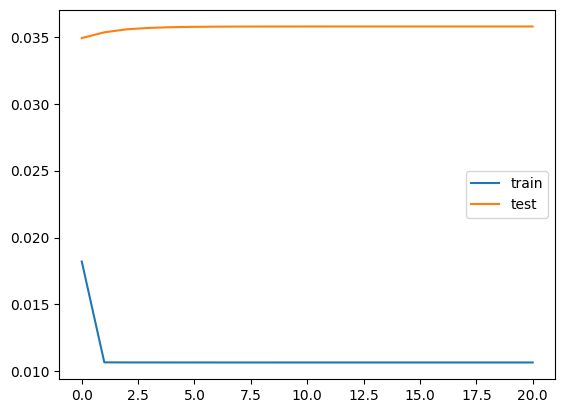

378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Precision 12 , stratified_sampling results = R2: -0.06806935163487737, mae: 0.1170336913556141, mse: 0.034906585308979284, rmse: 0.18683304126673977


In [ ]:
dataset_length = []
geohash = []
maes = []
mses = []
rmses = []
accuracys = []
r2_scores = []
time_intervals = []
model_type = []
dataset_type = []
sampling_algorithm = []

precision = 12

for x in range(6, precision+1, 1):
  temp_data = PM_data.copy()
  data_size_before_aggregation = len(temp_data)

  temp_data['latitude'] = temp_data['latitude'].astype(float)
  temp_data['longitude'] = temp_data['longitude'].astype(float)

  temp_data['geohash'] = temp_data.apply(calculate_geohash, axis=1 , args=['geohash',x,])
  aggregated_data = temp_data

  aggregated_data = spatial_aggregation(temp_data, 'geohash')
  aggregated_data['geohash'] = aggregated_data.index
  aggregated_data.reset_index(drop=True, inplace=True)
  aggregated_data['latitude'], aggregated_data['longitude'] = setCenterGeohash(aggregated_data, 'geohash')

  aggregated_data['latitude'] = aggregated_data['latitude'].astype(float)
  aggregated_data['longitude'] = aggregated_data['longitude'].astype(float)

  data_size_after_aggregation = len(aggregated_data)

  stratified_sampled_data = stratified_sampling(temp_data)
  data_size_after_stratified_sampling = len(stratified_sampled_data)

  aggregated_data['time'] = pd.to_datetime(aggregated_data['time'])
  aggregated_data = aggregated_data.sort_values('time')

  stratified_sampled_data['time'] = pd.to_datetime(stratified_sampled_data['time'])
  stratified_sampled_data = stratified_sampled_data.sort_values('time')

  aggregated_intervals = get_average_time_intervals(aggregated_data)
  stratified_intervals = get_average_time_intervals(stratified_sampled_data)

  time_intervals.append(aggregated_intervals)
  time_intervals.append(stratified_intervals)

  aggregated_data['time'] = aggregated_data['time'].apply(lambda x: x.timestamp())
  stratified_sampled_data['time'] = stratified_sampled_data['time'].apply(lambda x: x.timestamp())

  encoder = LabelEncoder()
  aggregated_data['geohash'] = encoder.fit_transform(aggregated_data['geohash'])
  stratified_sampled_data['geohash'] = encoder.fit_transform(stratified_sampled_data['geohash'])

  dataset_length.append(len(aggregated_data))
  dataset_length.append(len(stratified_sampled_data))

  # Ensure pollution is last column in dataframe
  pollution = aggregated_data['pm25']
  aggregated_data = aggregated_data.drop('pm25', axis=1)
  aggregated_data['pm25'] = pollution

  pollution = stratified_sampled_data['pm25']
  stratified_sampled_data = stratified_sampled_data.drop('pm25', axis=1)
  stratified_sampled_data['pm25'] = pollution

  scaler = MinMaxScaler(feature_range=(0, 1))

  aggregated_data = scaler.fit_transform(aggregated_data)
  print(len(aggregated_data))
  aggregated_data = series_to_supervised(aggregated_data)
  print(len(aggregated_data))

  stratified_sampled_data = scaler.fit_transform(stratified_sampled_data)
  stratified_sampled_data = series_to_supervised(stratified_sampled_data)

  X = aggregated_data[['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)']]
  y = aggregated_data[['var7(t)']]

  train_X, test_X, train_y, test_y  = train_test_split(X, y, test_size=0.2, shuffle=False)

  train_X_values = train_X.values
  test_X_values = test_X.values
  train_y_values = train_y.values
  test_y_values = test_y.values

  model=Sequential()
  model.add(Dense(32, input_dim=train_X_values.shape[1], activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(4, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.compile(optimizer='adam',loss='mse', run_eagerly=True)
  history = model.fit(train_X_values, train_y_values, epochs=50, validation_data=(test_X_values, test_y_values), batch_size=72, shuffle=False, callbacks=[early_stopping])
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.show()

  # model = LinearRegression()
  # model.fit(train_X, train_y)

  # model = SVR(kernel='rbf', C=1, gamma='auto')
  # model.fit(train_X, train_y)

  # train_X_values = train_X_values.reshape((train_X_values.shape[0], 1, train_X_values.shape[1]))
  # test_X_values = test_X_values.reshape((test_X_values.shape[0], 1, test_X_values.shape[1]))

  # print(train_X_values.shape)
  # print(test_X_values.shape)

  # design network
  # model = Sequential()
  # model.add(SimpleRNN(3, return_sequences=True, input_shape=(train_X_values.shape[0], train_X_values.shape[2])))
  # model.add(SimpleRNN(1, return_sequences=False))
  # model.add(Dense(1, activation='linear'))
  # model.compile(loss='mae', optimizer='adam')
  # # fit network
  # history = model.fit(train_X_values , train_y_values, epochs=50, validation_data=(test_X_values, test_y_values), batch_size=144, verbose=2, shuffle=False, callbacks=[early_stopping])
  # # plot history
  # pyplot.plot(history.history['loss'], label='train')
  # pyplot.plot(history.history['val_loss'], label='test')
  # pyplot.legend()
  # pyplot.show()

  # Make predictions
  predicted_y = model.predict(test_X_values)

  # Flatten predictions and ground truth to 1D arrays
  predicted_y = predicted_y.flatten()
  test_y_values = test_y_values.flatten()

  print(predicted_y.shape)
  print(test_y_values.shape)

  # Calculate metrics
  mae = mean_absolute_error(test_y_values, predicted_y)
  mse = mean_squared_error(test_y_values, predicted_y)
  rmse = np.sqrt(mse)
  r2 = r2_score(test_y_values, predicted_y)


  # Store metrics in arrays
  model_type.append('mlp')
  dataset_type.append('boston')
  sampling_algorithm.append('geospatial_aggregation')
  geohash.append(x)
  maes.append(mae)
  mses.append(mse)
  rmses.append(rmse)
  r2_scores.append(r2)

  print(f'Precision {x} , geospatial_aggregation results = R2: {r2}, mae: {mae}, mse: {mse}, rmse: {rmse}')

  X = stratified_sampled_data[['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)']]
  y = stratified_sampled_data[['var7(t)']]

  train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)

  train_X_values = train_X.values
  test_X_values = test_X.values
  train_y_values = train_y.values
  test_y_values = test_y.values

  # train_X_values = train_X_values.reshape((train_X_values.shape[0], 1, train_X_values.shape[1]))
  # test_X_values = test_X_values.reshape((test_X_values.shape[0], 1, test_X_values.shape[1]))

  # design network
  # model = Sequential()
  # model.add(SimpleRNN(3, return_sequences=True, input_shape=(train_X_values.shape[0], train_X_values.shape[2])))
  # model.add(SimpleRNN(1, return_sequences=False))
  # model.add(Dense(1, activation='linear'))
  # model.compile(loss='mae', optimizer='adam')
  # # fit network
  # history = model.fit(train_X_values , train_y_values, epochs=50, validation_data=(test_X_values, test_y_values), batch_size=144, verbose=2, shuffle=False, callbacks=[early_stopping])
  # # plot history
  # pyplot.plot(history.history['loss'], label='train')
  # pyplot.plot(history.history['val_loss'], label='test')
  # pyplot.legend()
  # pyplot.show()

  # model = SVR(kernel='rbf', C=1, gamma='auto')
  # model.fit(train_X, train_y)

  # model = LinearRegression()
  # model.fit(train_X, train_y)

  model=Sequential()
  model.add(Dense(32, input_dim=train_X_values.shape[1], activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(4, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.compile(optimizer='adam',loss='mse', run_eagerly=True)
  history = model.fit(train_X_values, train_y_values, epochs=50, validation_data=(test_X_values, test_y_values), batch_size=72, shuffle=False, callbacks=[early_stopping])
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.show()

  # Make predictions
  predicted_y = model.predict(test_X_values)

  # Flatten predictions and ground truth to 1D arrays
  predicted_y = predicted_y.flatten()
  test_y_values = test_y_values.flatten()


  # Calculate metrics
  mae = mean_absolute_error(test_y_values, predicted_y)
  mse = mean_squared_error(test_y_values, predicted_y)
  rmse = np.sqrt(mse)
  r2 = r2_score(test_y_values, predicted_y)

  # Store metrics in arrays
  model_type.append('mlp')
  dataset_type.append('boston')
  sampling_algorithm.append('stratified_sampling')
  geohash.append(x)
  maes.append(mae)
  mses.append(mse)
  rmses.append(rmse)
  r2_scores.append(r2)

  print(f'Precision {x} , stratified_sampling results = R2: {r2}, mae: {mae}, mse: {mse}, rmse: {rmse}')


  # yhat_svr = svr_model.predict(svr_test_X.reshape((svr_test_X.shape[0], svr_test_X.shape[2])))

  # lr = LinearRegression().fit(train_X, train_y)

results = DataFrame({'model': model_type , 'precision' : geohash, 'dataset_type': dataset_type, 'sampling_algorithm': sampling_algorithm, 'dataset_length': dataset_length, 'time_interval': get_average_time_intervals, 'r2_score': r2_scores, 'mae': maes, 'mse':mses, 'rmse':rmses})
results.to_csv('results.csv')